## Final Project Submission

Please fill out:
* Student name: Sam Oliver
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://samoliverds.blogspot.com/2021/12/the-utility-of-using-r-squared-as.html


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find homes that will gross high. They want to be able to obtain a model that predicts housing prices from various parameters and then maximize the gross from houses they either build or buy.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# imports for statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive
* date: non-descriptive because all of the homes were sold from 2014-2015

In [4]:
# drop identified columns
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Columns containing null objects: yr_renovated, waterfront
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.

In [6]:
# set NA values in yr_renovated and waterfront to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [8]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ?

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [9]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

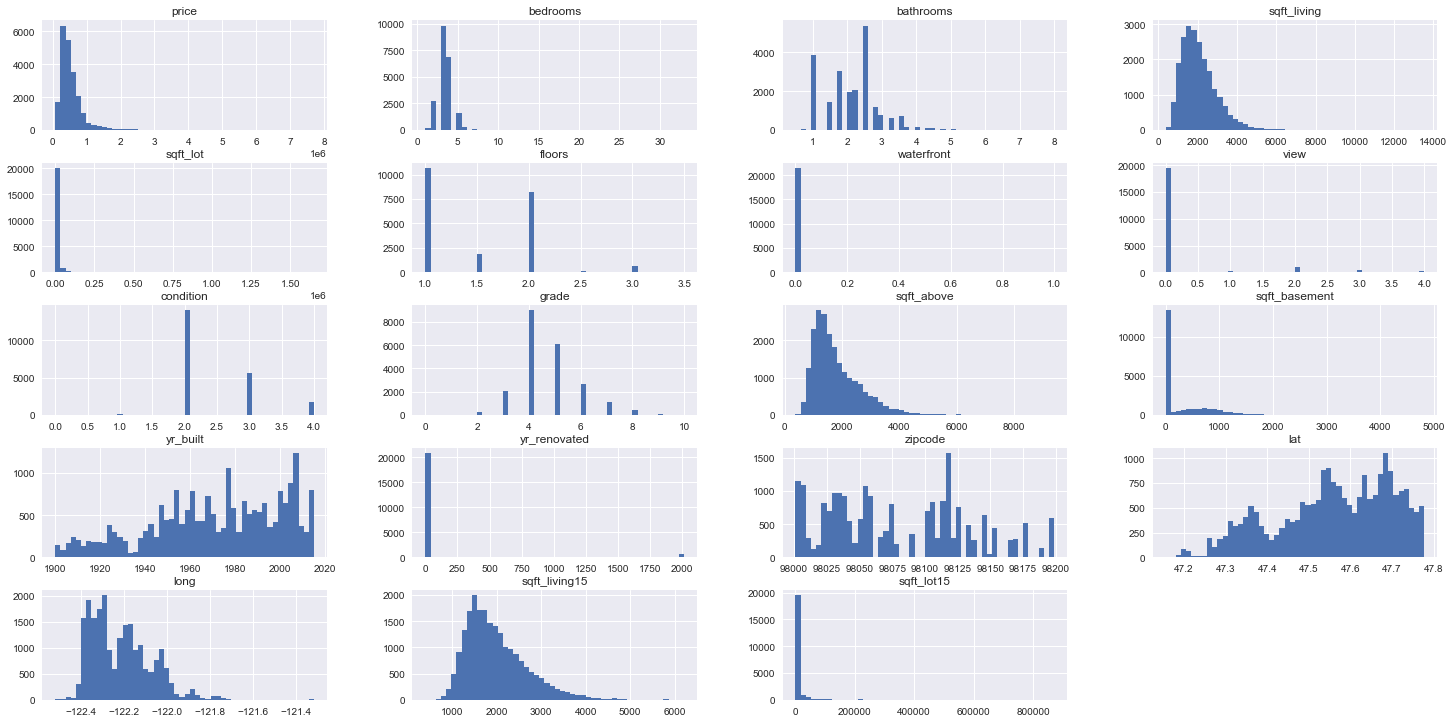

In [10]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

### Scatterplot of each variable and price

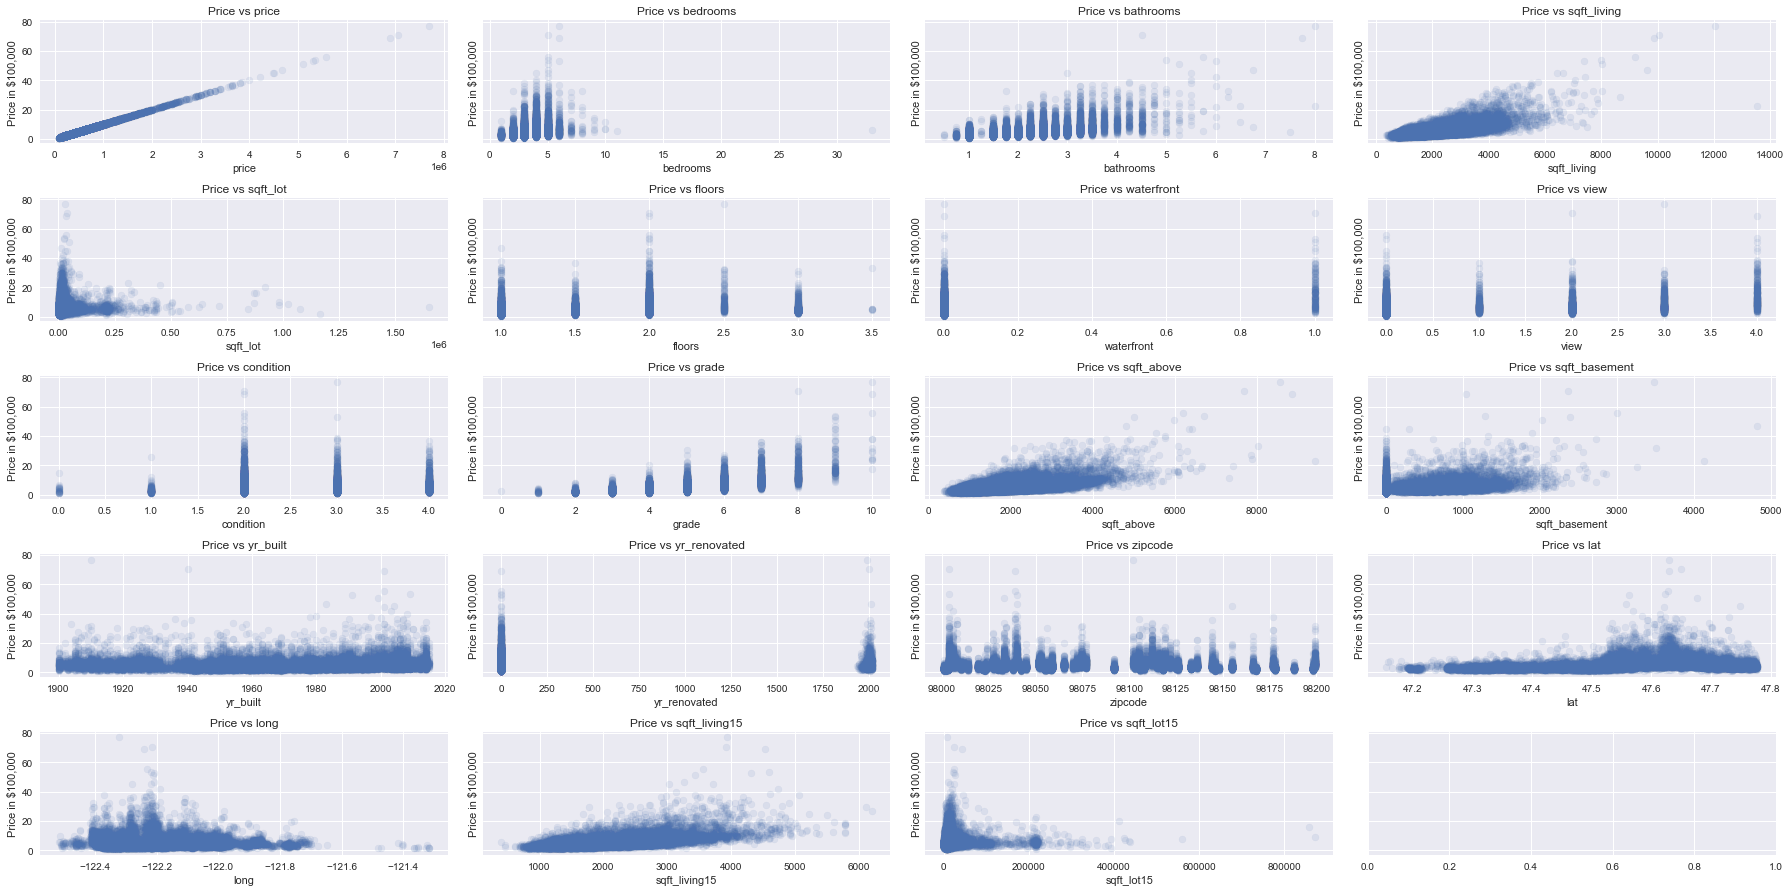

In [11]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

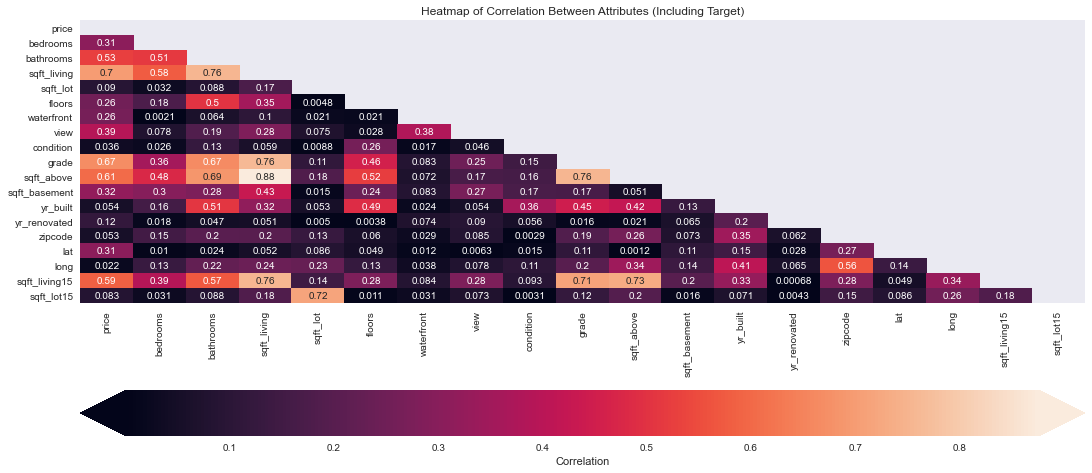

In [12]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6

### Investigate linear regression assumptions for each numerical variable.

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Regression Diagnostics for Price~price


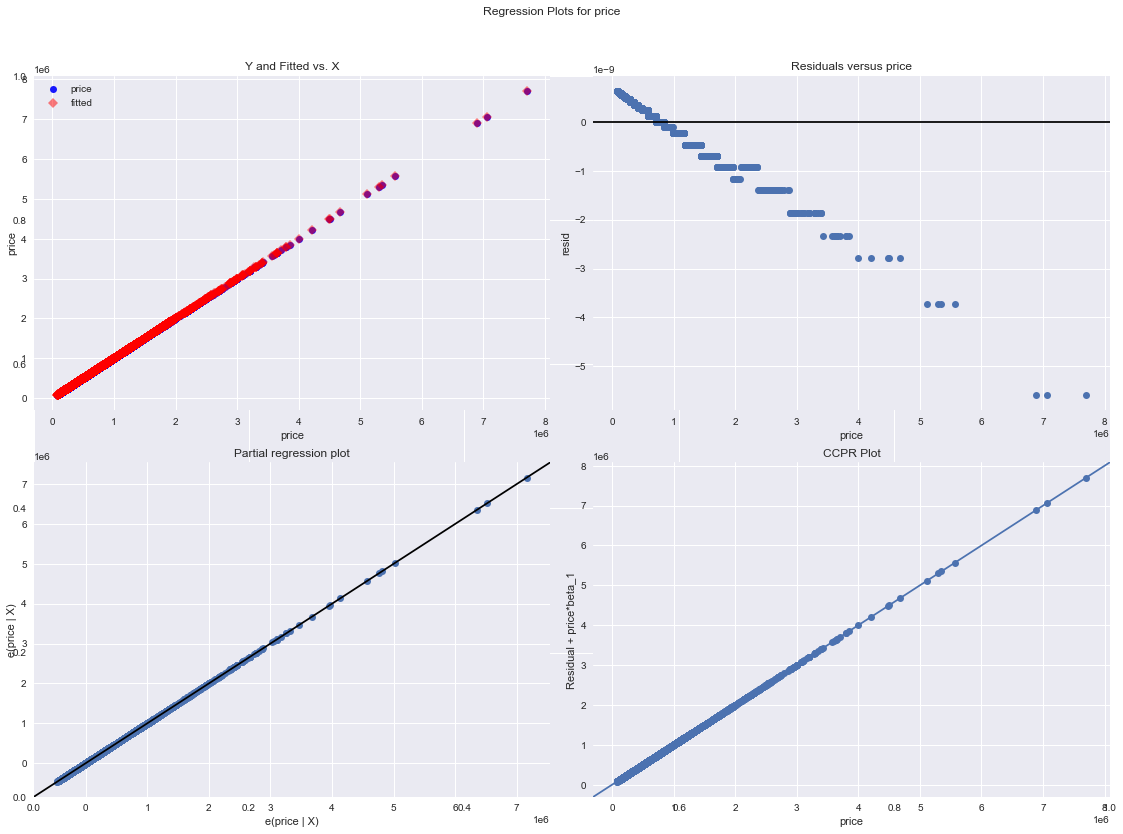

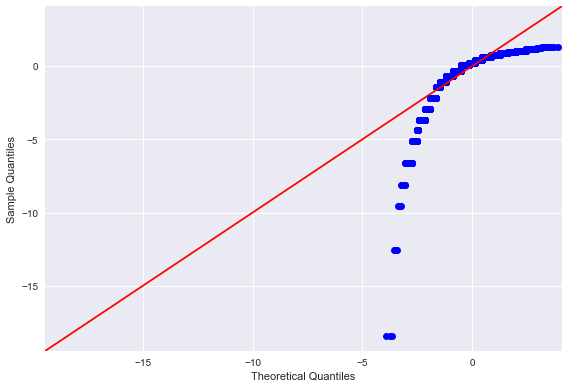

Regression Diagnostics for Price~bedrooms


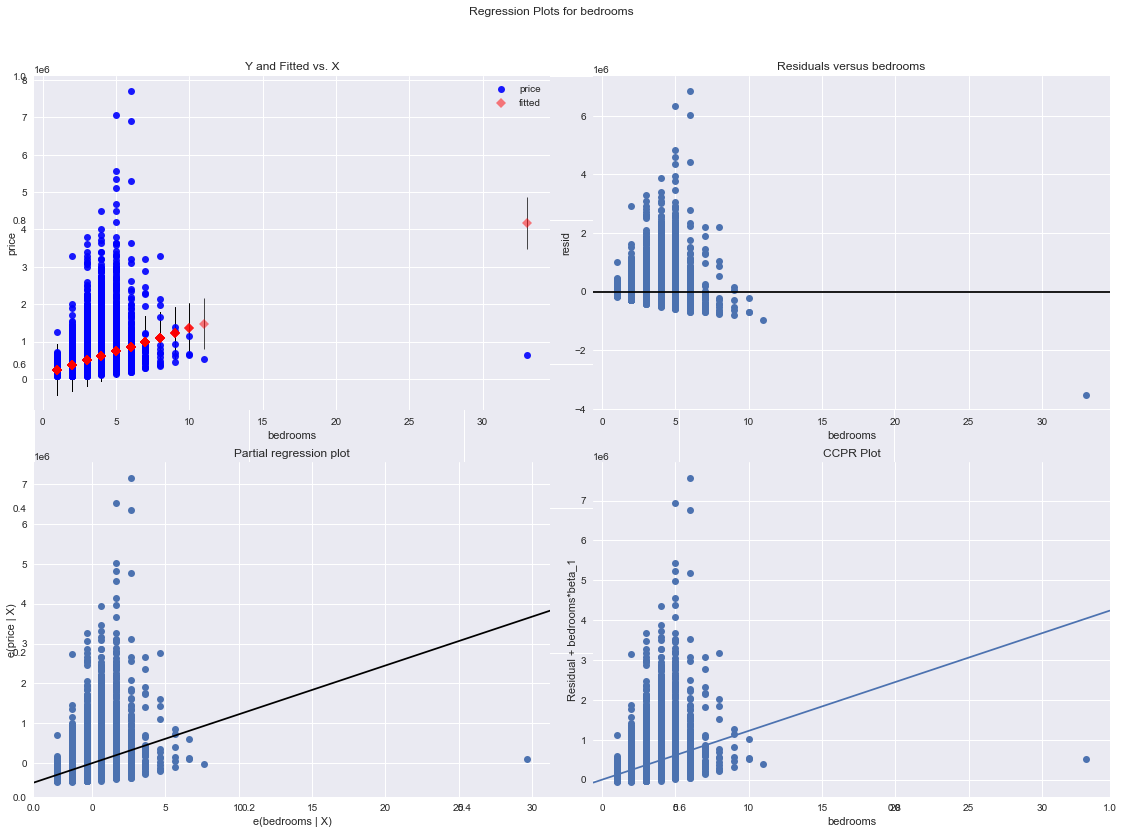

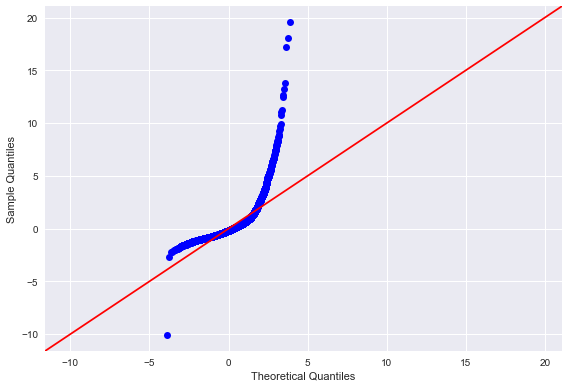

Regression Diagnostics for Price~bathrooms


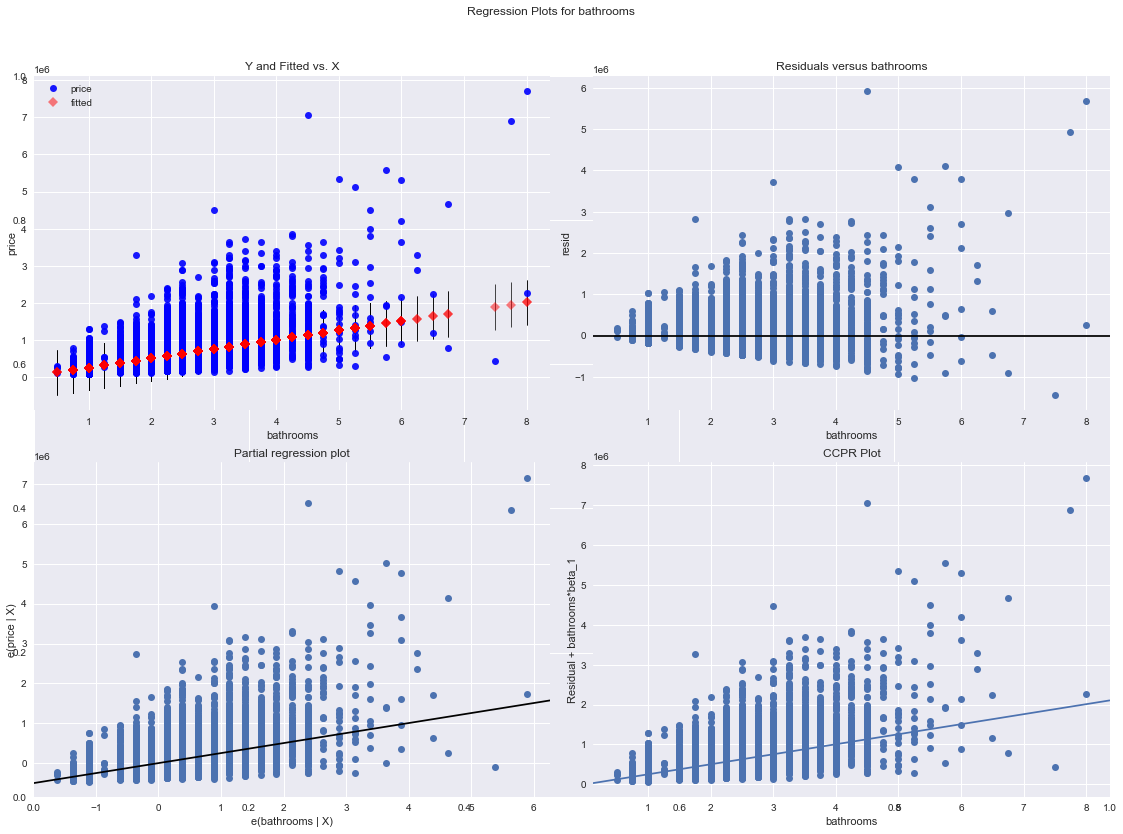

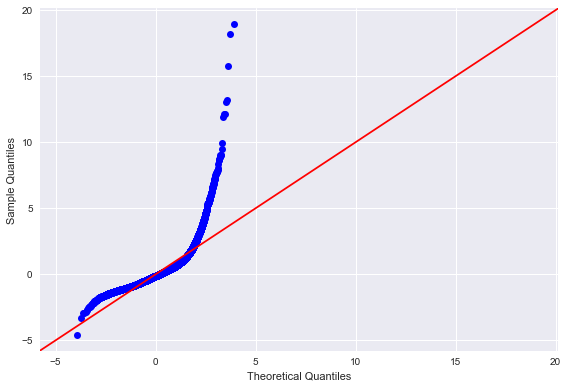

Regression Diagnostics for Price~sqft_living


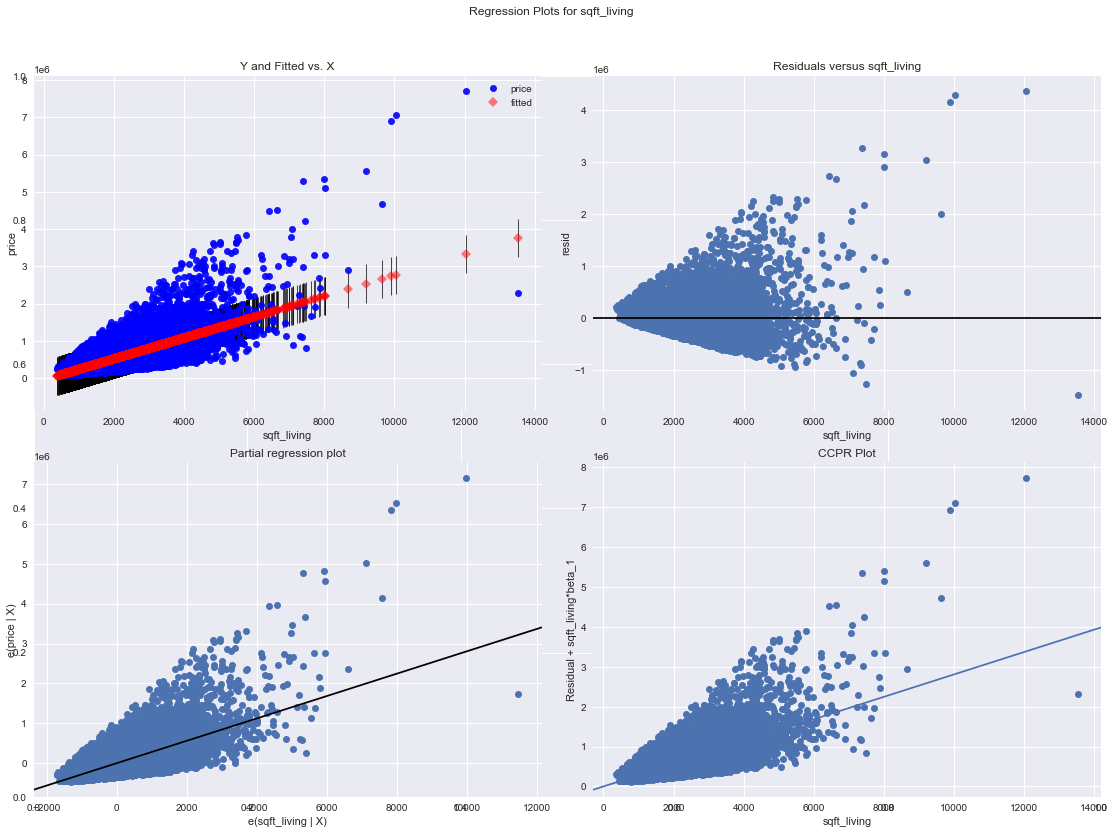

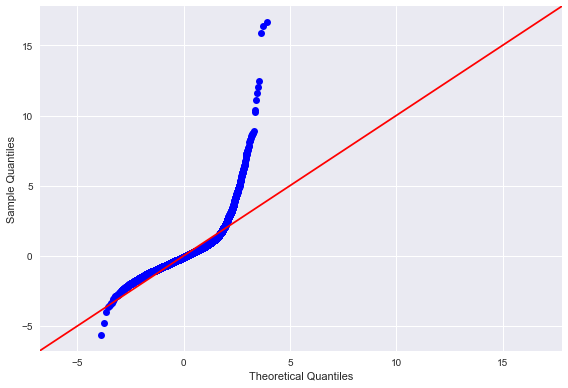

Regression Diagnostics for Price~sqft_lot


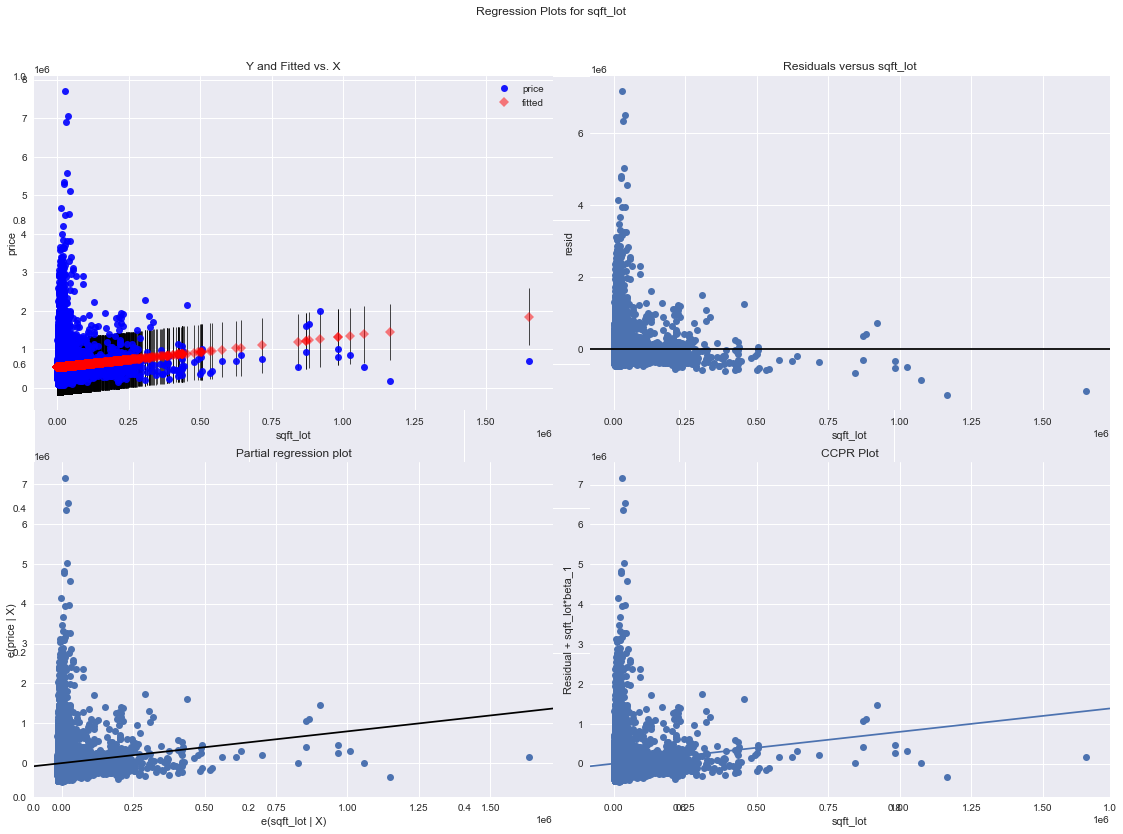

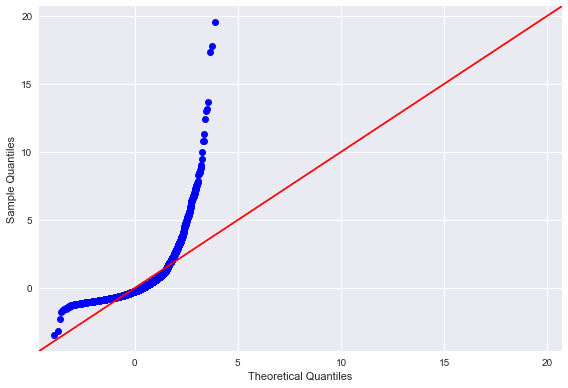

Regression Diagnostics for Price~floors


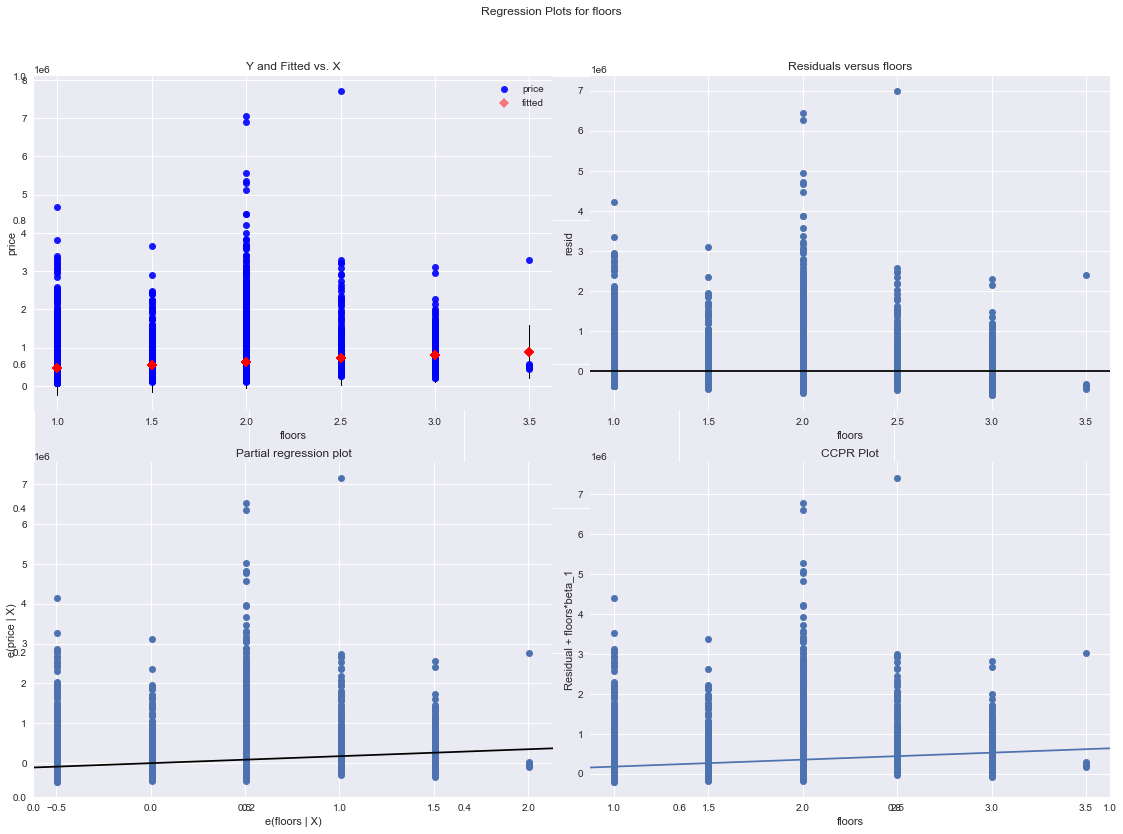

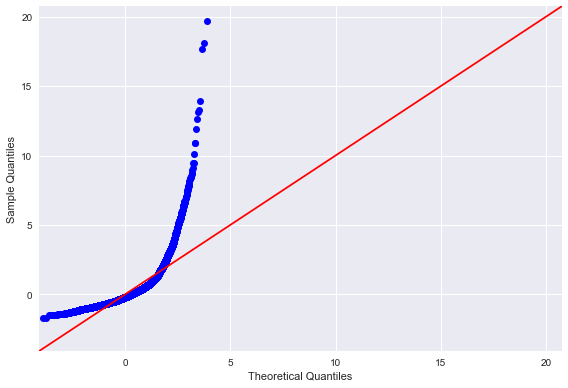

Regression Diagnostics for Price~condition


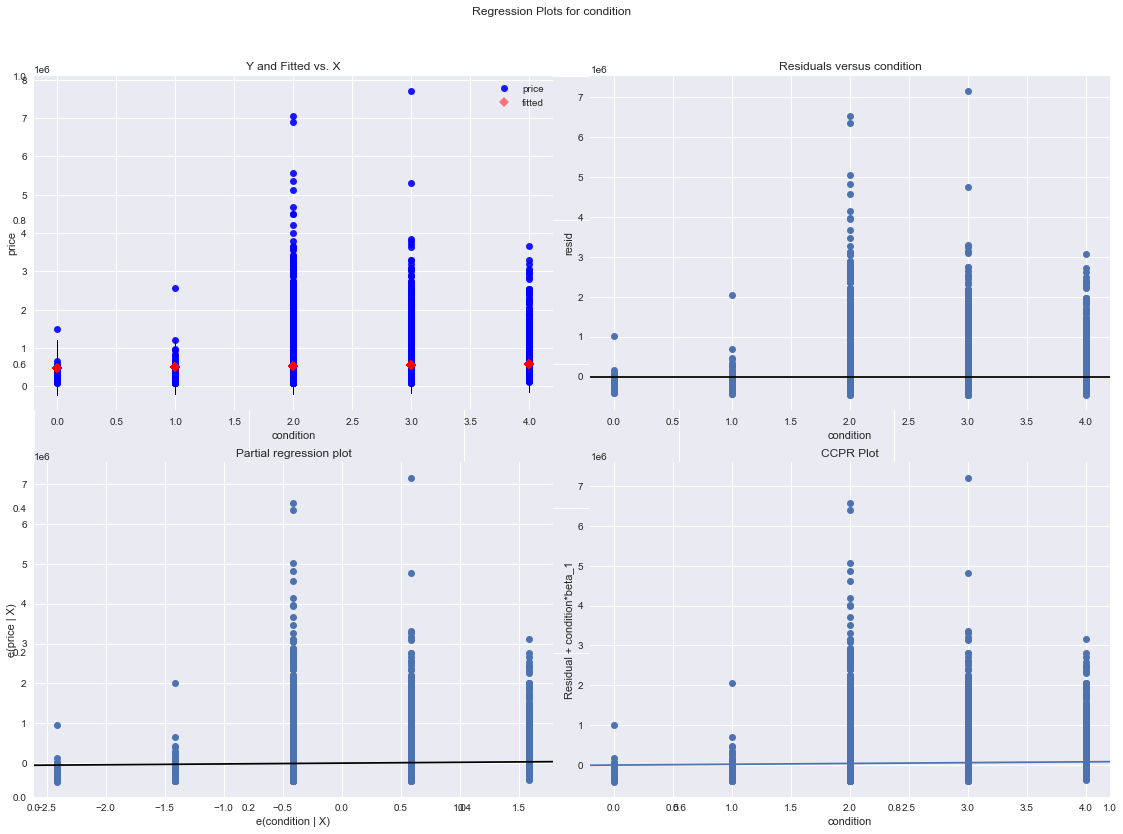

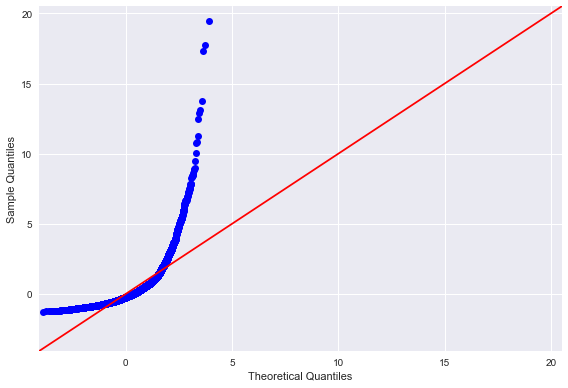

Regression Diagnostics for Price~grade


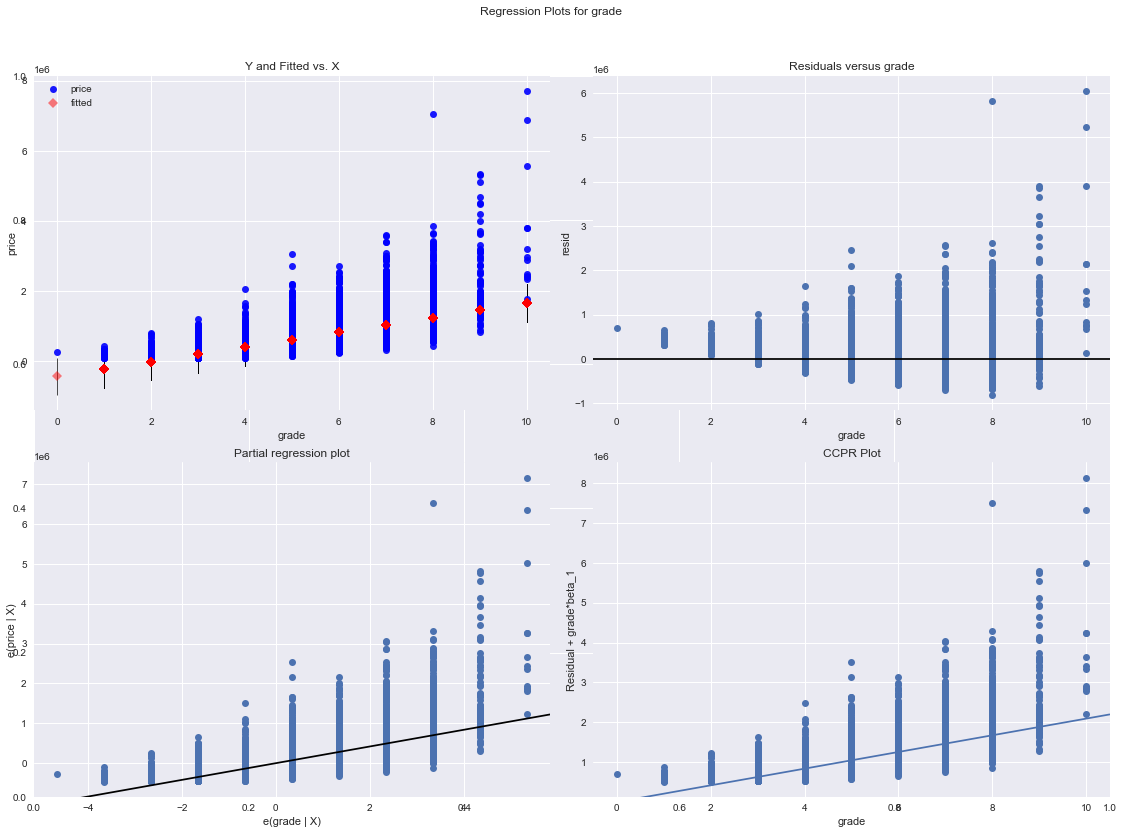

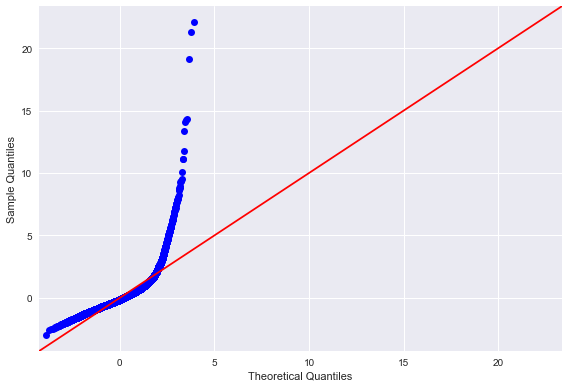

Regression Diagnostics for Price~sqft_above


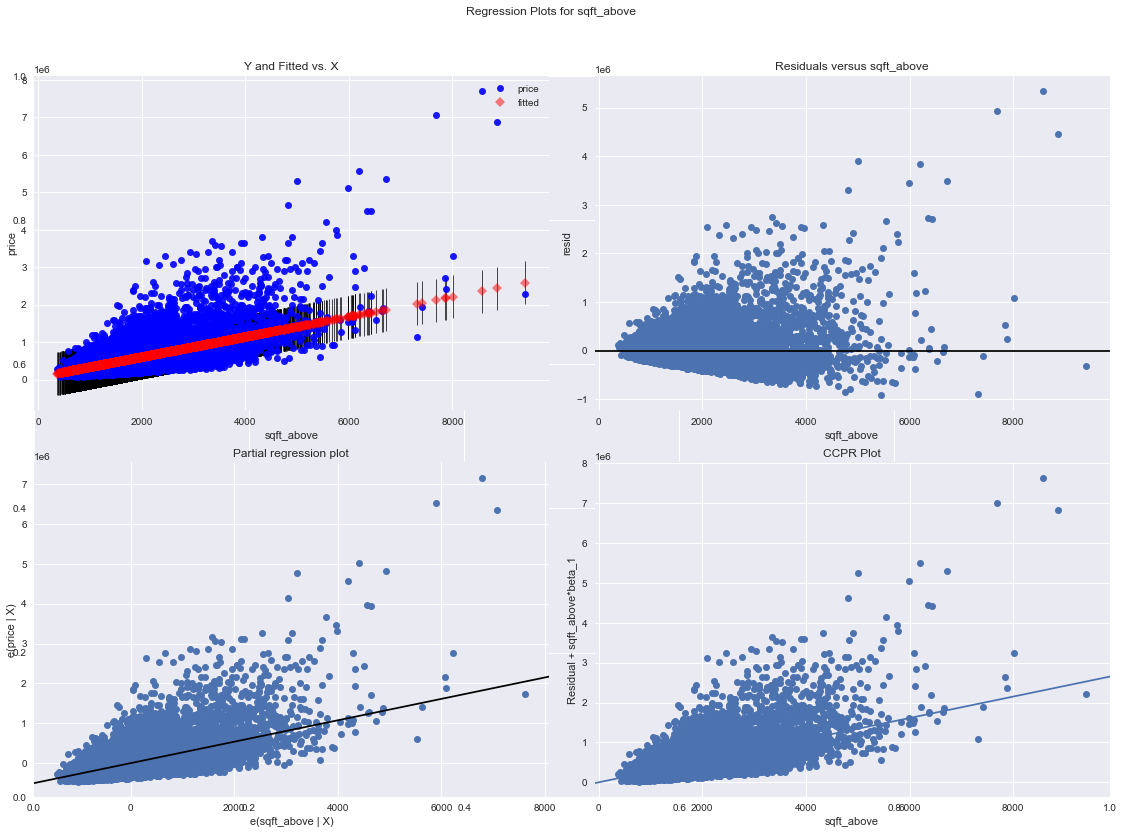

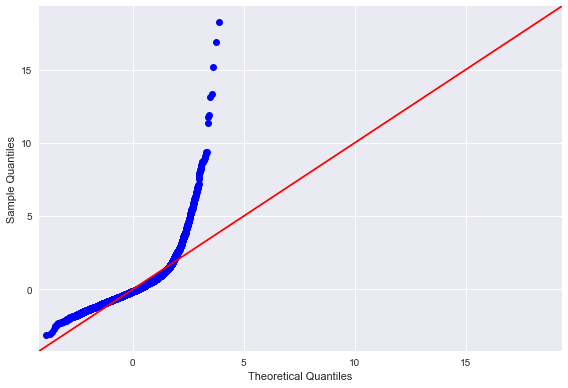

Regression Diagnostics for Price~sqft_basement


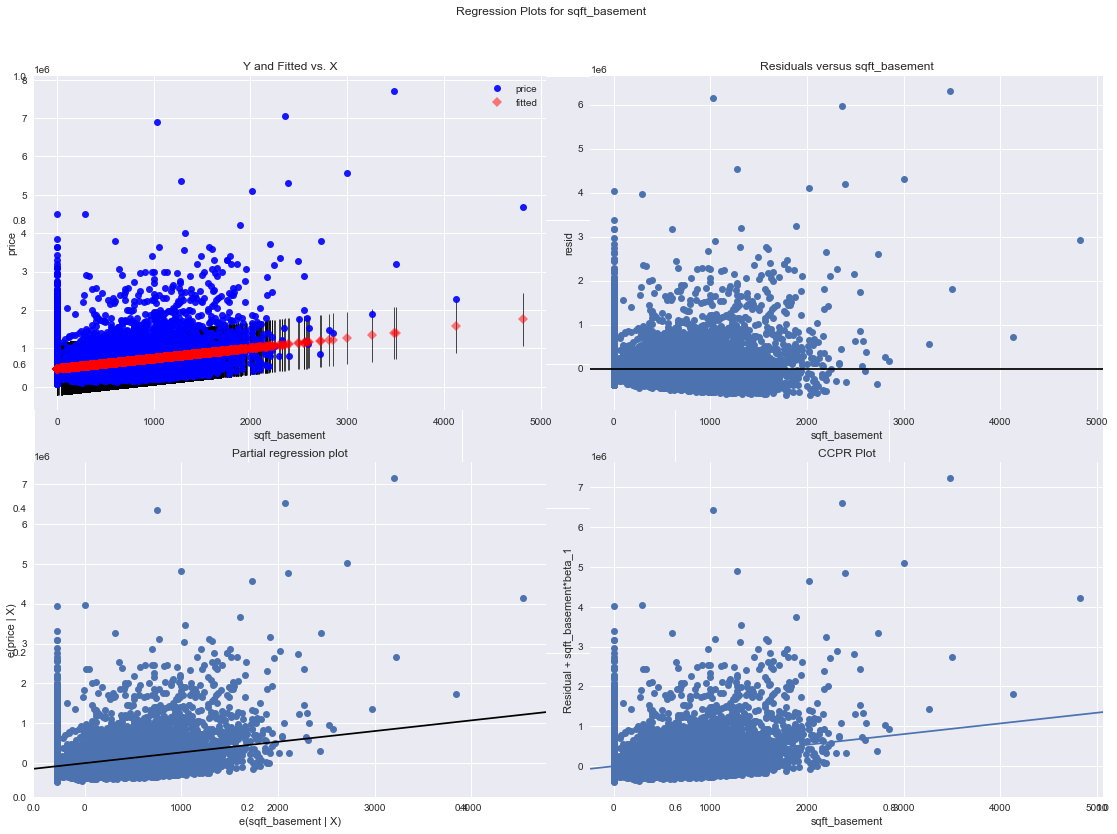

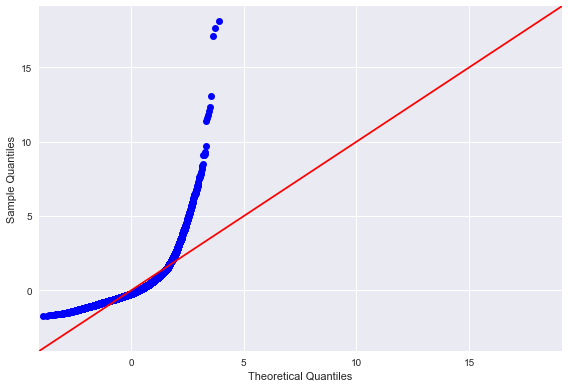

Regression Diagnostics for Price~sqft_living15


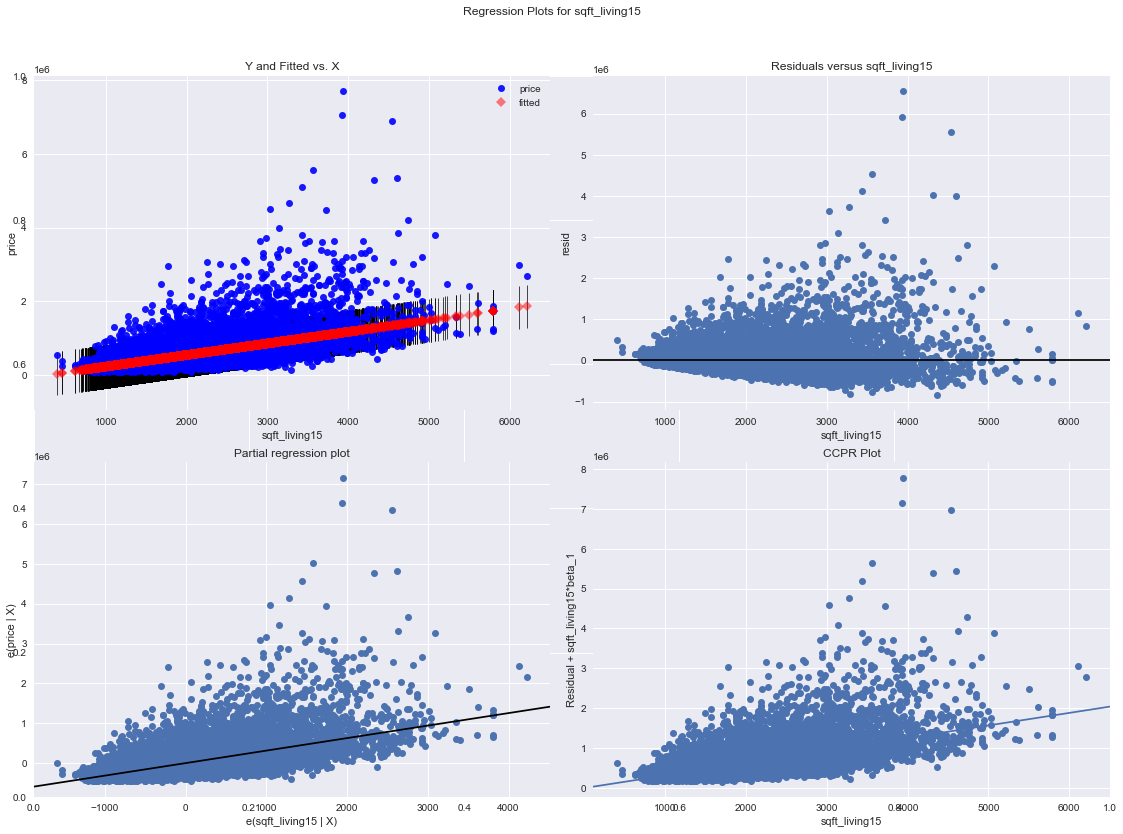

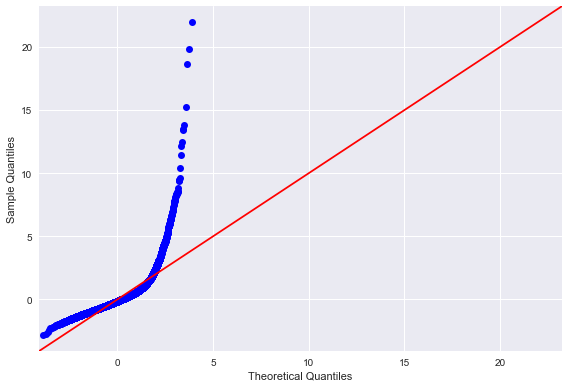

Regression Diagnostics for Price~sqft_lot15


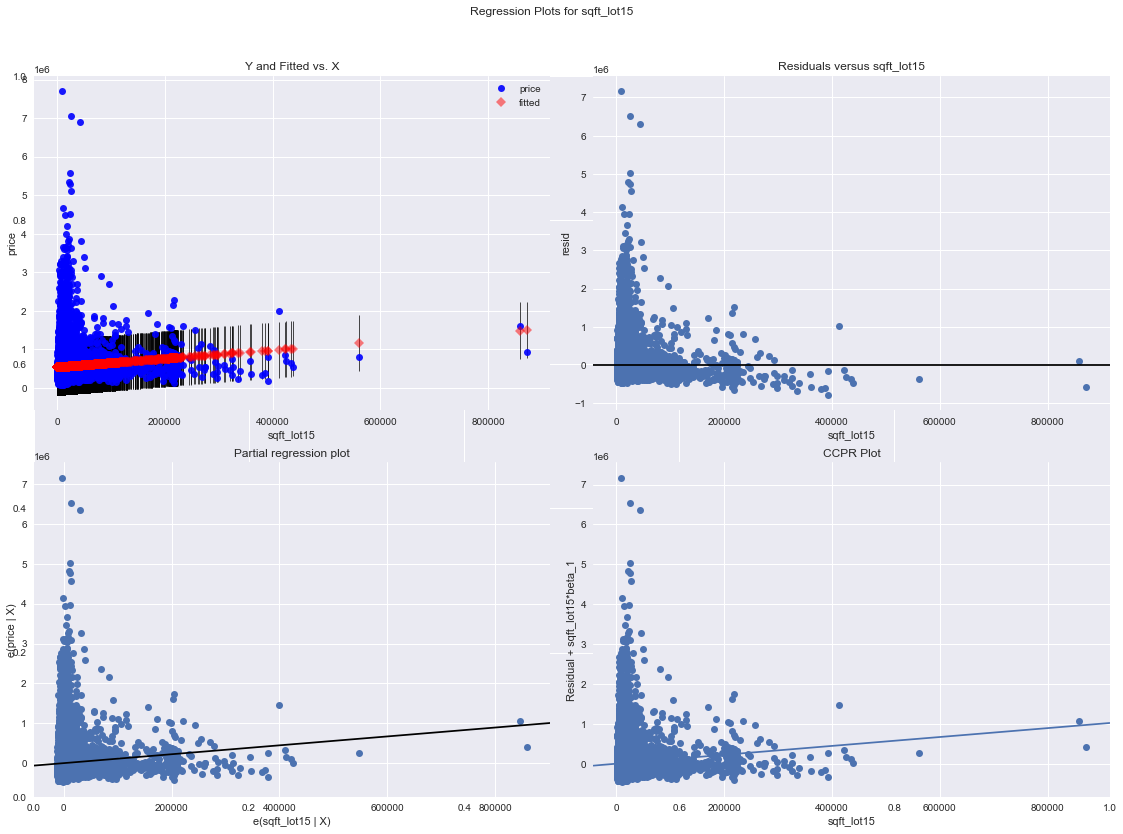

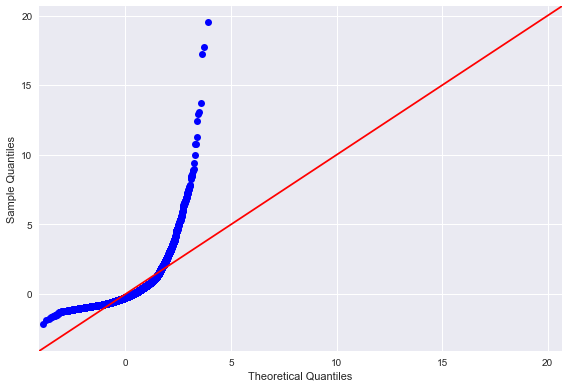

In [14]:
# create df with just price, grade, and sqft_living
df_numerics = df.drop(['waterfront', 'view', 'yr_built', 'yr_renovated', 
                       'zipcode', 'lat', 'long'], axis=1)

# check assumptions
for idx, column in enumerate(df_numerics.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_numerics).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

## Modeling

### Helper functions for modeling

In [15]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [16]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model (X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

I will use statsmodels to create a linear regression model, and I will also use it to check linear regression assumptions (linearity, normality, homoscedasticity, and p-value < 0.05.

In [17]:
from statsmodels.formula.api import ols

# create df with just price, grade, and sqft_living
df_model1 = df[['price', 'sqft_living', 'grade']]

outcome = 'price'
x_cols = ['sqft_living', 'grade']

# preprocessing
for col in x_cols:
    df_model1[col] = (df_model1[col] - df_model1[col].mean())/df_model1[col].std()
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_model1).fit()
model.summary()

# check assumptions
# for idx, column in enumerate(df_model1.columns):
#     print(f"Regression Diagnostics for Price~{column}")
    
#     f = f'price~{column}'
#     model = smf.ols(formula=f, data=df_model1).fit()
    
#     fig, axes = plt.subplots(figsize=(16,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#     fig.tight_layout()
#     plt.show()

<ipython-input-17-a645fbf8377c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model1[col] = (df_model1[col] - df_model1[col].mean())/df_model1[col].std()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:41:03   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1705.265    316.840      0.000    5.37e+05    5.44e+05
sqft_living   1.69e+05   2637.100     64.102      0.000    1.64e+05    1.74e+05
grade        1.164e+05   2637.100     44.155      0.000    1.11e+05    1.22e+05
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

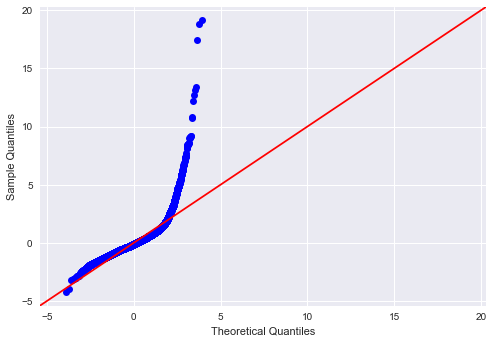

In [18]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

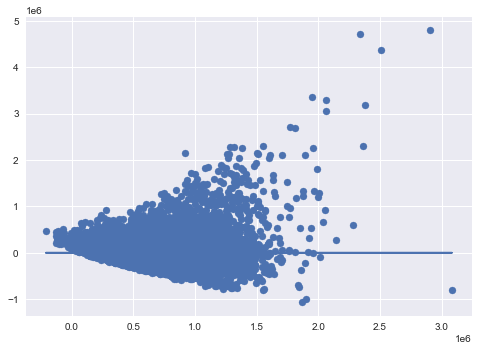

In [19]:
plt.scatter(model.predict(df_model1[x_cols]), model.resid)
plt.plot(model.predict(df_model1[x_cols]), [0 for i in range(len(df))])

In [20]:
# establish X and y, then use lin_model to build the model.
X = df[['grade', 'sqft_living']]
y = df['price']

lin_model(X,y)

0.5382275583146765

R-squared of about .54 is not great, but it is a start.
Visualization of error is below.

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


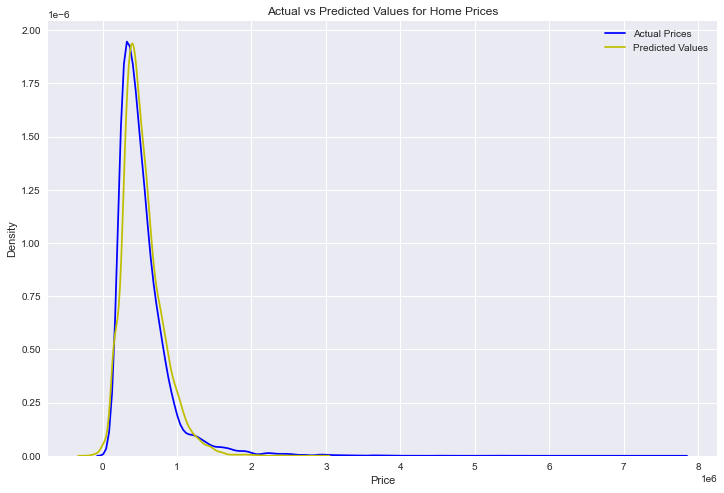

In [21]:
# visualize the error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df['price'], hist=False, color="b", label="Actual Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [22]:
# create copy of df for new model - just keep three needed columns
df1 = df[['grade','price','sqft_living']].copy()

# dummy variables for grade
dummies = pd.get_dummies(df1['grade'], prefix='grade', drop_first=True)

df1 = df1.drop(['grade'], axis=1)
df1 = pd.concat([df1, dummies], axis=1)

df1

price  sqft_living  grade_1  grade_2  grade_3  grade_4  grade_5  \
0      221900.0         1180        0        0        0        1        0   
1      538000.0         2570        0        0        0        1        0   
2      180000.0          770        0        0        1        0        0   
3      604000.0         1960        0        0        0        1        0   
4      510000.0         1680        0        0        0        0        1   
...         ...          ...      ...      ...      ...      ...      ...   
21592  360000.0         1530        0        0        0        0        1   
21593  400000.0         2310        0        0        0        0        1   
21594  402101.0         1020        0        0        0        1        0   
21595  400000.0         1600        0        0        0        0        1   
21596  325000.0         1020        0        0        0        1        0   

       grade_6  grade_7  grade_8  grade_9  grade_10  
0            0        0        0        0         0  
1            0        0        0        0         0  
2            0        0        0        0         0  
3            0        0        0        0         0  
4            0        0        0        0         0  
...        ...      ...      ...      ...       ...  
21592        0        0        0        0         0  
21593        0        0        0        0         0  
21594        0        0        0        0         0  
21595        0        0        0        0         0  
21596        0        0        0        0         0  

[21597 rows x 12 columns]

In [23]:
outcome = 'price'
x_cols = df1.drop(['price'], axis=1)

# preprocessing
for col in x_cols:
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:41:04   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21585   BIC:                         5.961e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.403e+05   1616.948    334.146      0.000    5.37e+05    5.43e+05
sqft_living  1.444e+05   2555.179     56.501      0.000    1.39e+05    1.49e+05
grade_1     -2659.9337   8550.948     -0.311      0.756   -1.94e+04    1.41e+04
grade_2     -9087.6801   2.51e+04     -0.363      0.717   -5.82e+04       4e+04
grade_3      -1.92e+04   6.95e+04     -0.276      0.782   -1.55e+05    1.17e+05
grade_4     -2.134e+04   1.17e+05     -0.182      0.855   -2.51e+05    2.08e+05
grade_5      8628.2497   1.07e+05      0.081      0.936   -2.01e+05    2.18e+05
grade_6      4.649e+04   7.76e+04      0.599      0.549   -1.06e+05    1.99e+05
grade_7      7.552e+04   5.31e+04      1.423      0.155   -2.85e+04     1.8e+05
grade_8      8.435e+04   3.21e+04      2.630      0.009    2.15e+04    1.47e+05
grade_9      7.436e+04   1.53e+04      4.849      0.000    4.43e+04    1.04e+05
grade_10     5.773e+04   6067.033      9.516      0.000    4.58e+04    6.96e+04
==============================================================================
Omnibus:                    13860.549   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473194.517
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.346   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Create and evaluate the model

In [24]:
# establish X and y, then use lin_model to build the model.
X = df1.drop(['price'], axis=1)
y = df1['price']

lin_model(X,y)

0.5872085661041188

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

### Model 3

Plan: Log-normalize relevant variables and incorporate more variables in the linear regression model.

#### Log-normalization

Log-normalize the following variables: price, sqft_living, sqft_above, sqft_living15. All follow a roughly log-normal distribution.

In [25]:
# instantiate new df for this model
df2 = df.copy()

# initialize list of variables to log-normalize
log_norm_cats = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']

for c in log_norm_cats:
    c_log = np.log(df2[c])     # apply normalization
    df2 = df2.drop([c], axis=1)     # drop old column
    df2[c] = c_log     # append normalized column to df

# print head and tail of modified df
df2

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  \
0             3       1.00      5650     1.0           0     0          2   
1             3       2.25      7242     2.0           0     0          2   
2             2       1.00     10000     1.0           0     0          2   
3             4       3.00      5000     1.0           0     0          4   
4             3       2.00      8080     1.0           0     0          2   
...         ...        ...       ...     ...         ...   ...        ...   
21592         3       2.50      1131     3.0           0     0          2   
21593         4       2.50      5813     2.0           0     0          2   
21594         2       0.75      1350     2.0           0     0          2   
21595         3       2.50      2388     2.0           0     0          2   
21596         2       0.75      1076     2.0           0     0          2   

       grade  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          4              0      1955           0.0    98178  47.5112   
1          4            400      1951        1991.0    98125  47.7210   
2          3              0      1933           0.0    98028  47.7379   
3          4            910      1965           0.0    98136  47.5208   
4          5              0      1987           0.0    98074  47.6168   
...      ...            ...       ...           ...      ...      ...   
21592      5              0      2009           0.0    98103  47.6993   
21593      5              0      2014           0.0    98146  47.5107   
21594      4              0      2009           0.0    98144  47.5944   
21595      5              0      2004           0.0    98027  47.5345   
21596      4              0      2008           0.0    98144  47.5941   

          long  sqft_lot15      price  sqft_living  sqft_above  sqft_living15  
0     -122.257        5650  12.309982     7.073270    7.073270       7.200425  
1     -122.319        7639  13.195614     7.851661    7.682482       7.432484  
2     -122.233        8062  12.100712     6.646391    6.646391       7.908387  
3     -122.393        5000  13.311329     7.580700    6.956545       7.215240  
4     -122.045        7503  13.142166     7.426549    7.426549       7.495542  
...        ...         ...        ...          ...         ...            ...  
21592 -122.346        1509  12.793859     7.333023    7.333023       7.333023  
21593 -122.362        7200  12.899220     7.745003    7.745003       7.512071  
21594 -122.299        2007  12.904459     6.927558    6.927558       6.927558  
21595 -122.069        1287  12.899220     7.377759    7.377759       7.251345  
21596 -122.299        1357  12.691580     6.927558    6.927558       6.927558  

[21597 rows x 19 columns]

#### Create and evaluate the model

In [26]:
# establish X and y, then use lin_model to build the model.
X = df2.drop(['price'], axis=1)
y = df2['price']

lin_model(X,y)

0.774549108958348

The r-squared value is about 78%, which seems to represent a pretty good metric for the stakeholder to use as a model for at least a decent starting point for evaluating prospective homes.

### Model 4

I will create another model that treats categorical variables from model 3 as dummy variables. I will then check the r-squared values from model 3 and 4 to explore potential differences.

#### Create dummy variables for categoricals from model 3

In [27]:
# fourth model - treat following variables as categorical: 
# waterfront, view, condition, grade

# create copy of df for new model - just keep three needed columns
df_m4 = df2.copy()

# dummy variables for waterfront, view, condition, grade
to_dum = ['waterfront', 'view', 'condition', 'grade']

for d in to_dum:
    dummy = pd.get_dummies(df_m4[d], prefix=d, drop_first=True)
    df_m4 = df_m4.drop([d], axis=1)
    df_m4 = pd.concat([df_m4, dummy], axis=1)

df_m4

bedrooms  bathrooms  sqft_lot  floors  sqft_basement  yr_built  \
0             3       1.00      5650     1.0              0      1955   
1             3       2.25      7242     2.0            400      1951   
2             2       1.00     10000     1.0              0      1933   
3             4       3.00      5000     1.0            910      1965   
4             3       2.00      8080     1.0              0      1987   
...         ...        ...       ...     ...            ...       ...   
21592         3       2.50      1131     3.0              0      2009   
21593         4       2.50      5813     2.0              0      2014   
21594         2       0.75      1350     2.0              0      2009   
21595         3       2.50      2388     2.0              0      2004   
21596         2       0.75      1076     2.0              0      2008   

       yr_renovated  zipcode      lat     long  ...  grade_1  grade_2  \
0               0.0    98178  47.5112 -122.257  ...        0        0   
1            1991.0    98125  47.7210 -122.319  ...        0        0   
2               0.0    98028  47.7379 -122.233  ...        0        0   
3               0.0    98136  47.5208 -122.393  ...        0        0   
4               0.0    98074  47.6168 -122.045  ...        0        0   
...             ...      ...      ...      ...  ...      ...      ...   
21592           0.0    98103  47.6993 -122.346  ...        0        0   
21593           0.0    98146  47.5107 -122.362  ...        0        0   
21594           0.0    98144  47.5944 -122.299  ...        0        0   
21595           0.0    98027  47.5345 -122.069  ...        0        0   
21596           0.0    98144  47.5941 -122.299  ...        0        0   

       grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  
0            0        1        0        0        0        0        0         0  
1            0        1        0        0        0        0        0         0  
2            1        0        0        0        0        0        0         0  
3            0        1        0        0        0        0        0         0  
4            0        0        1        0        0        0        0         0  
...        ...      ...      ...      ...      ...      ...      ...       ...  
21592        0        0        1        0        0        0        0         0  
21593        0        0        1        0        0        0        0         0  
21594        0        1        0        0        0        0        0         0  
21595        0        0        1        0        0        0        0         0  
21596        0        1        0        0        0        0        0         0  

[21597 rows x 34 columns]

#### Create and evaluate the model

In [28]:
# establish X and y, then use lin_model to build the model.
X = df_m4.drop(['price'], axis=1)
y = df_m4['price']

lin_model(X,y)

0.7760117021233701

Using dummy variables resulted in about the same r-squared value.

### Model 5 (statsmodels)

Focus on preprocessing data...

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

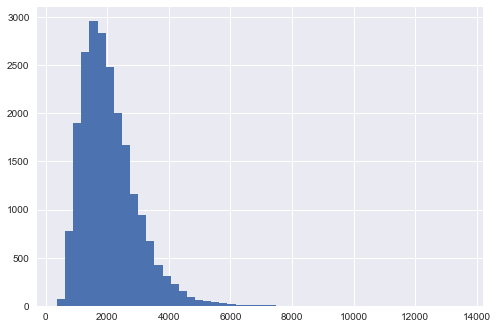

In [30]:
plt.hist(x=df['sqft_living'], bins=50)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21ac81228b0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ac8122f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ac8122550>],
 'medians': [<matplotlib.lines.Line2D at 0x21ac812f670>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ac812f9d0>],
 'means': []}

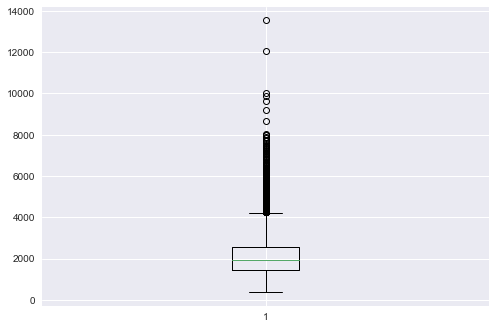

In [31]:
plt.boxplot(df['sqft_living'])

[array([1430.,  370.]), array([2550., 4230.])]

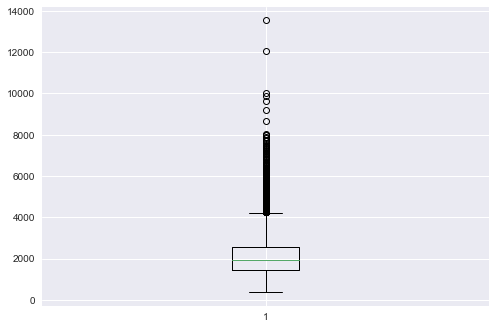

In [32]:
B = plt.boxplot(df['sqft_living'])
[item.get_ydata() for item in B['whiskers']]

In [33]:
# drop outliers
dfm5 = df.copy()

# drop sqft_living outliers - values above 4230
dfm5 = dfm5[dfm5['sqft_living'] >= 4230]
dfm5

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0         4       4.50         5420    101930     1.0   
70     1040000.0         5       3.25         4770     50094     1.0   
115     740500.0         3       3.50         4380      6350     2.0   
153    2250000.0         4       3.25         5180     19850     2.0   
239     472000.0         6       2.50         4410     14034     1.0   
...          ...       ...        ...          ...       ...     ...   
21535  1380000.0         5       4.50         4350     13405     2.0   
21545   750000.0         5       4.00         4500      8130     2.0   
21560  3570000.0         5       4.50         4850     10584     2.0   
21574  1220000.0         4       3.50         4910      9444     1.5   
21584  1540000.0         5       3.75         4470      8088     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
5               0     0          2      8        3890           1530   
70              0     0          3      8        3070           1700   
115             0     0          2      5        2780              0   
153             0     3          2      9        3540           1640   
239             0     2          3      6        2350           2060   
...           ...   ...        ...    ...         ...            ...   
21535           0     0          2      8        4350              0   
21545           0     0          2      7        4500              0   
21560           1     4          2      7        3540           1310   
21574           0     0          2      8        3110           1800   
21584           0     0          2      8        4470              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
5          2001           0.0    98053  47.6561 -122.005           4760   
70         1973           0.0    98005  47.6525 -122.160           3530   
115        1900           0.0    98117  47.6981 -122.368           1830   
153        2006           0.0    98006  47.5620 -122.162           3160   
239        1965           0.0    98003  47.3376 -122.324           2600   
...         ...           ...      ...      ...      ...            ...   
21535      2014           0.0    98074  47.6018 -122.060           3990   
21545      2007           0.0    98059  47.4832 -122.145           2840   
21560      2007           0.0    98008  47.5943 -122.110           3470   
21574      2007           0.0    98074  47.6502 -122.066           4560   
21584      2008           0.0    98004  47.6321 -122.200           2780   

       sqft_lot15  
5          101930  
70          38917  
115          6350  
153          9750  
239         13988  
...           ...  
21535        7208  
21545        8402  
21560       18270  
21574       11063  
21584        8964  

[582 rows x 19 columns]

Left with 582 data points.

Regression Diagnostics for Price~price


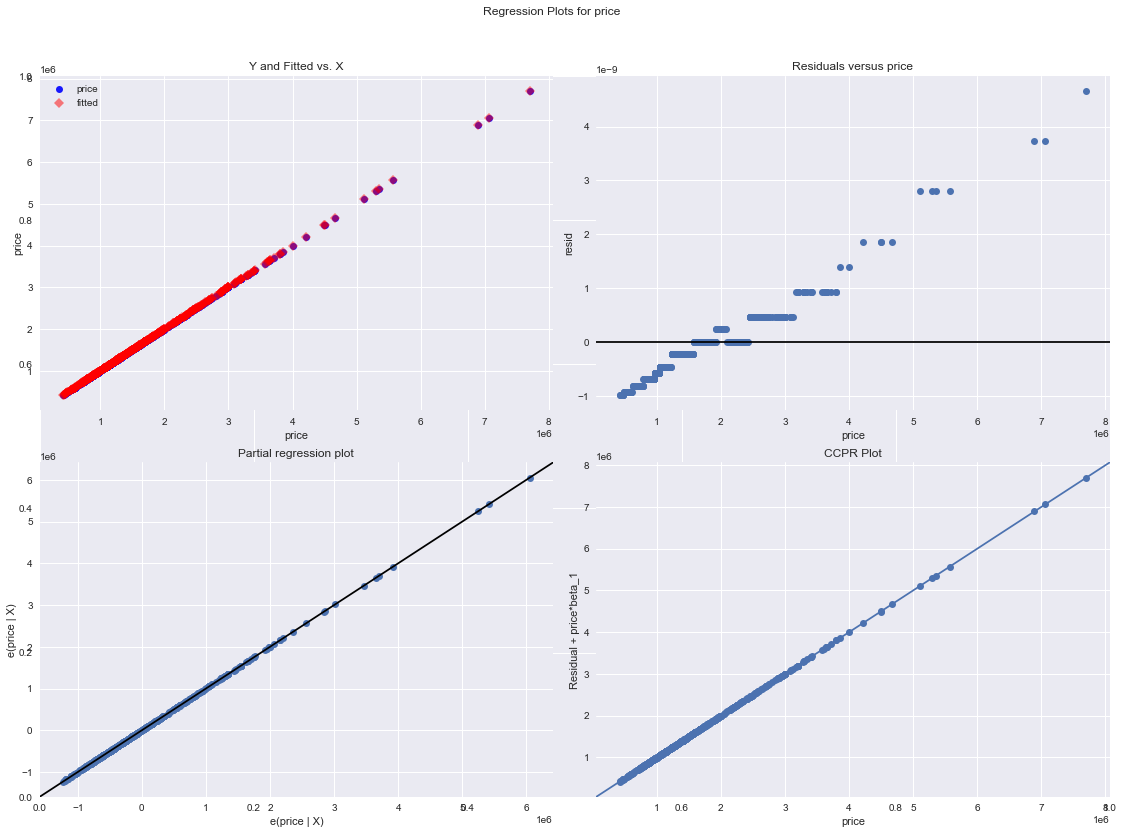

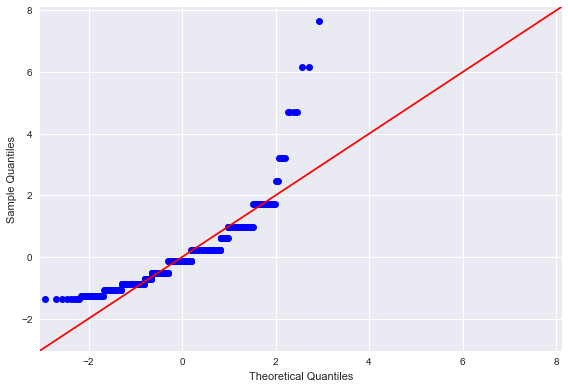

Regression Diagnostics for Price~bedrooms


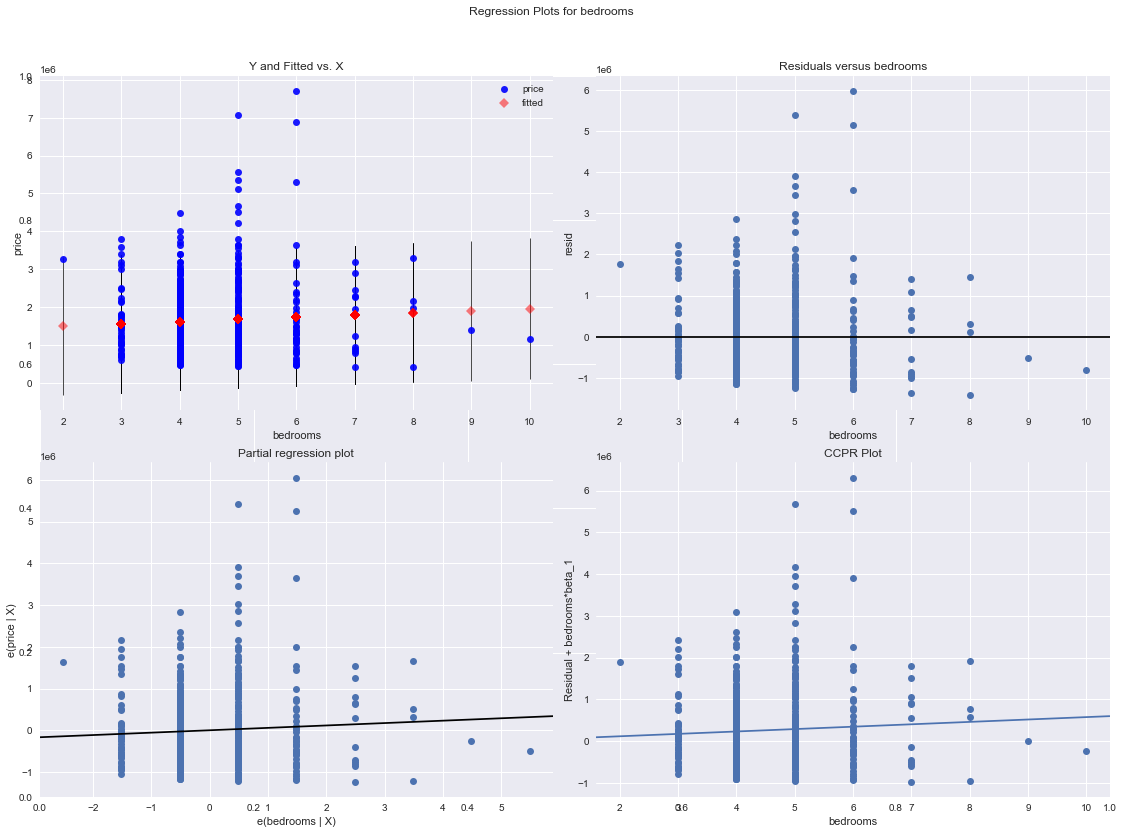

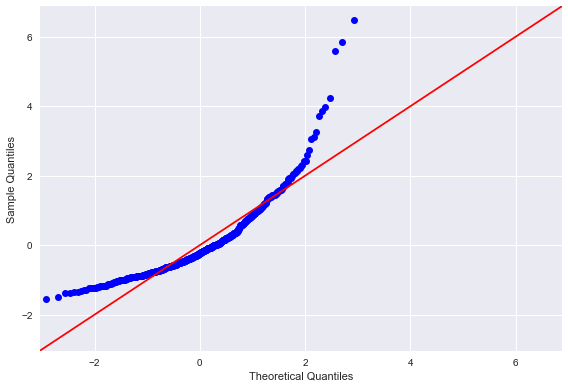

Regression Diagnostics for Price~bathrooms


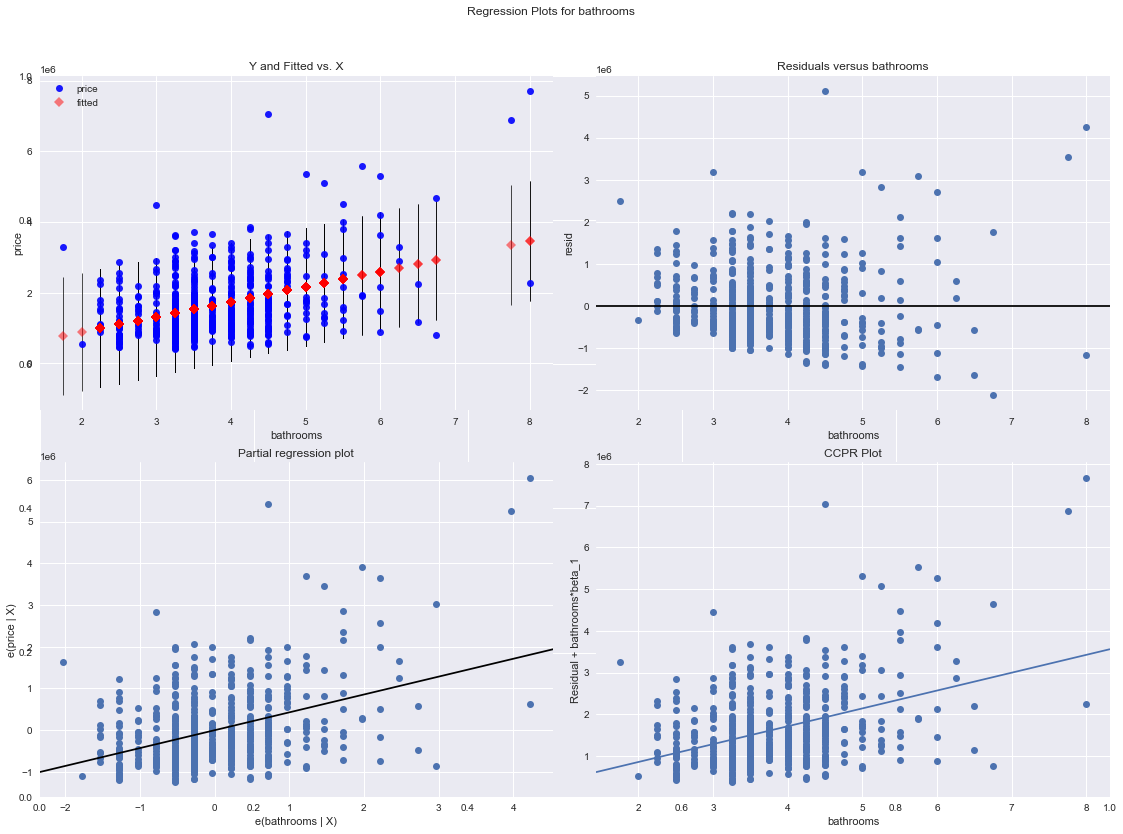

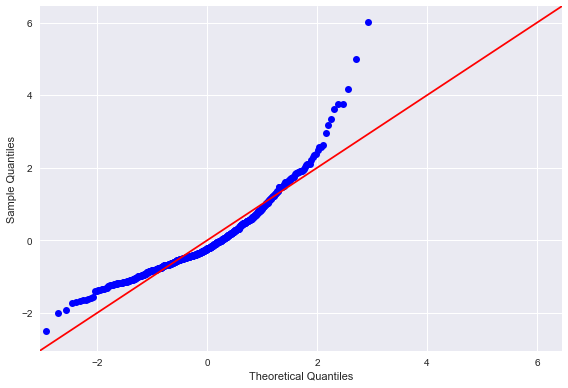

Regression Diagnostics for Price~sqft_living


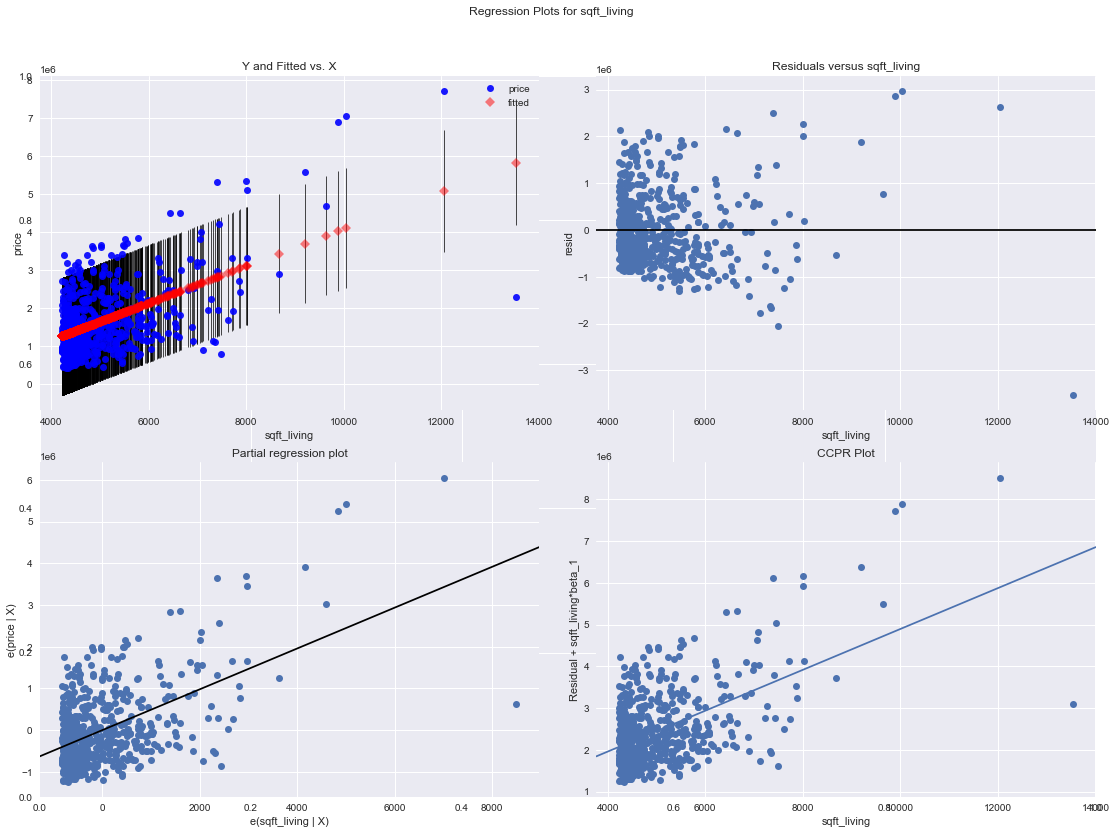

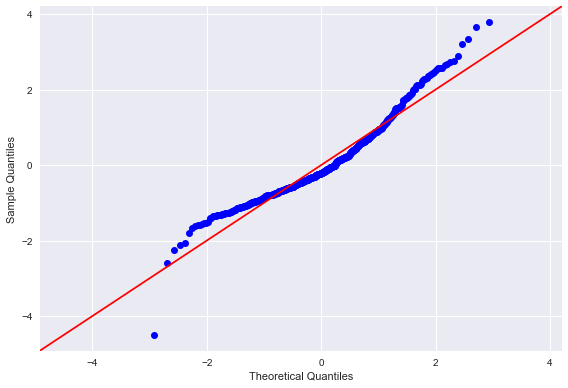

Regression Diagnostics for Price~sqft_lot


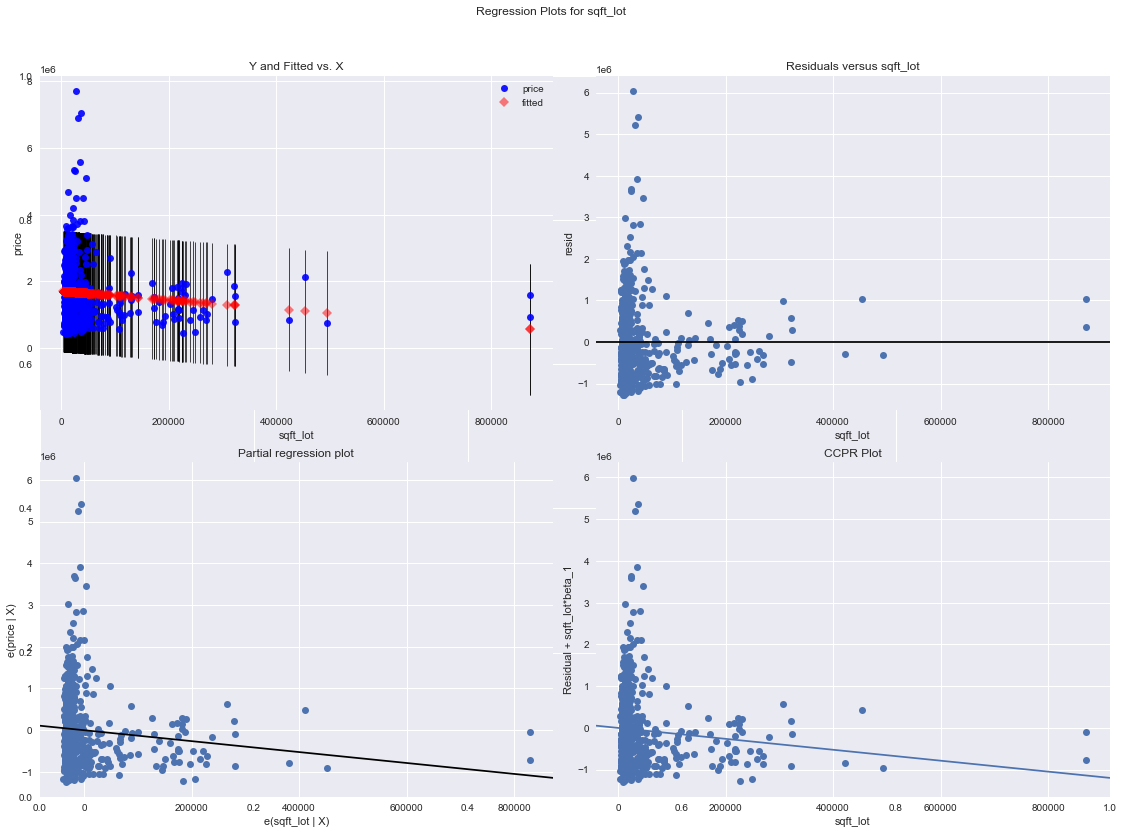

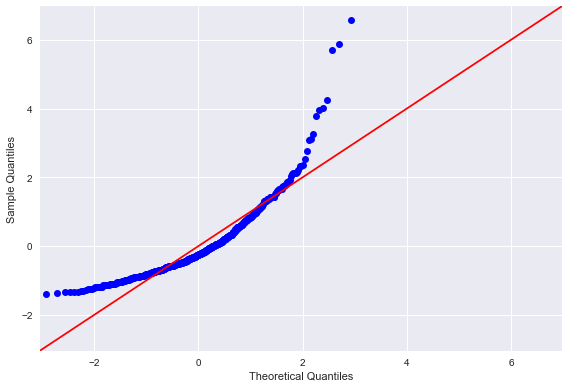

Regression Diagnostics for Price~floors


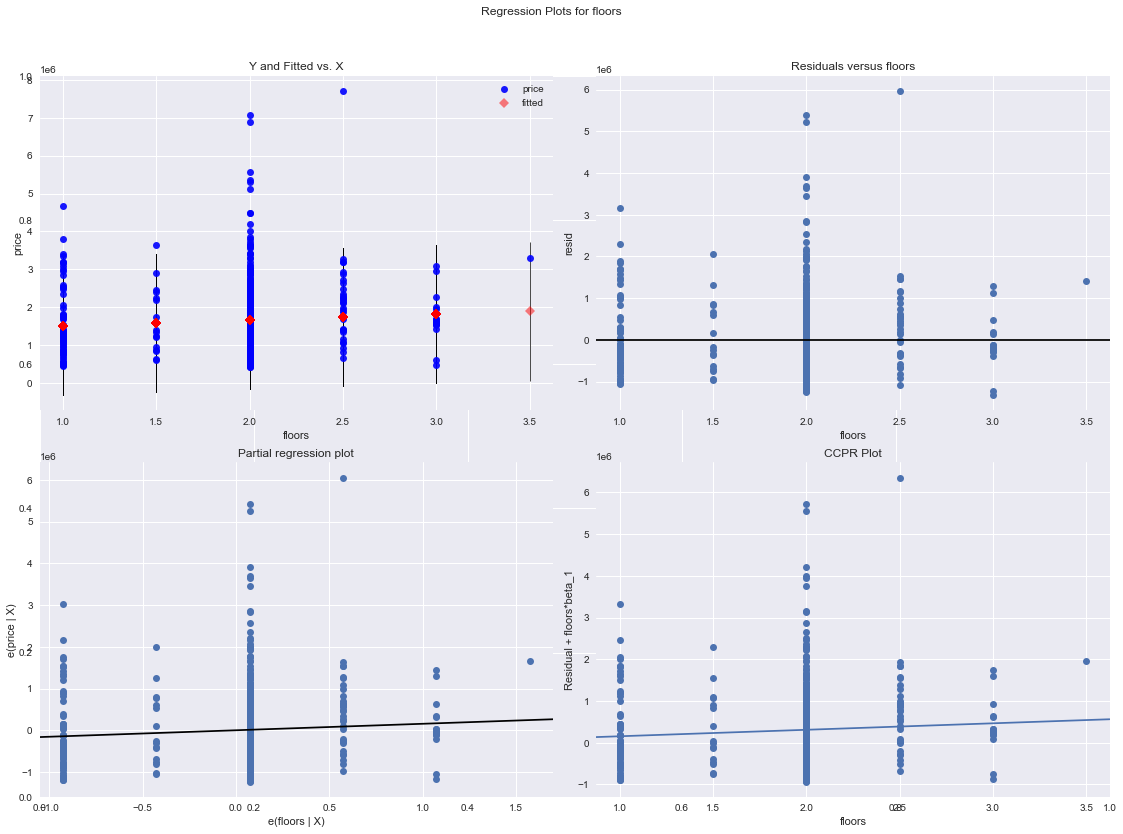

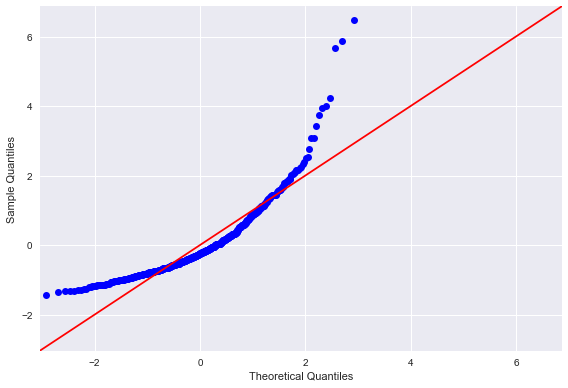

Regression Diagnostics for Price~waterfront


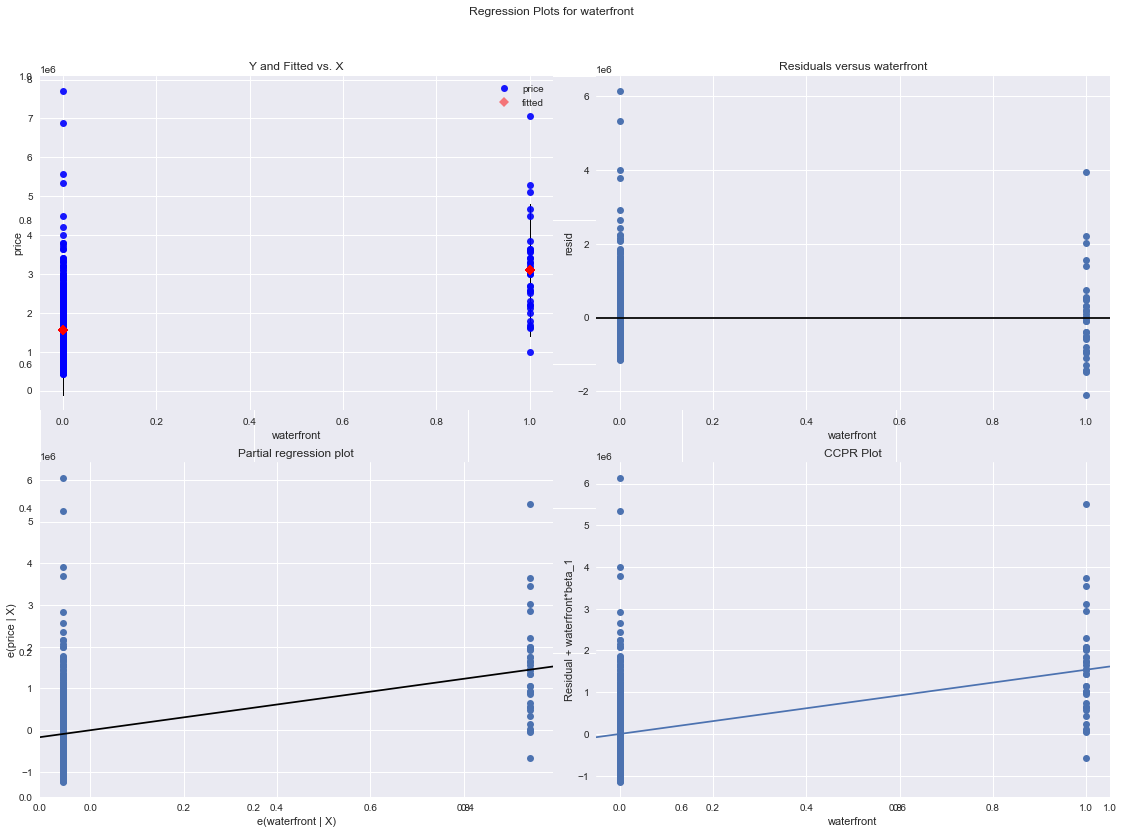

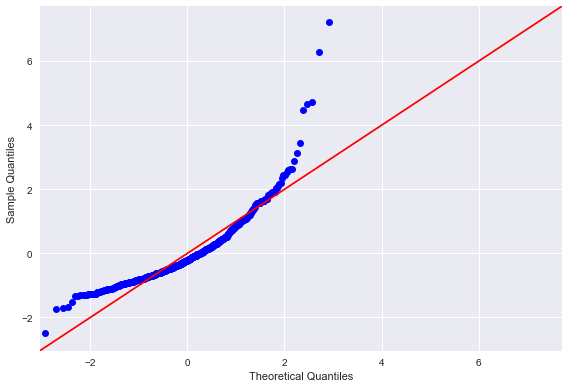

Regression Diagnostics for Price~view


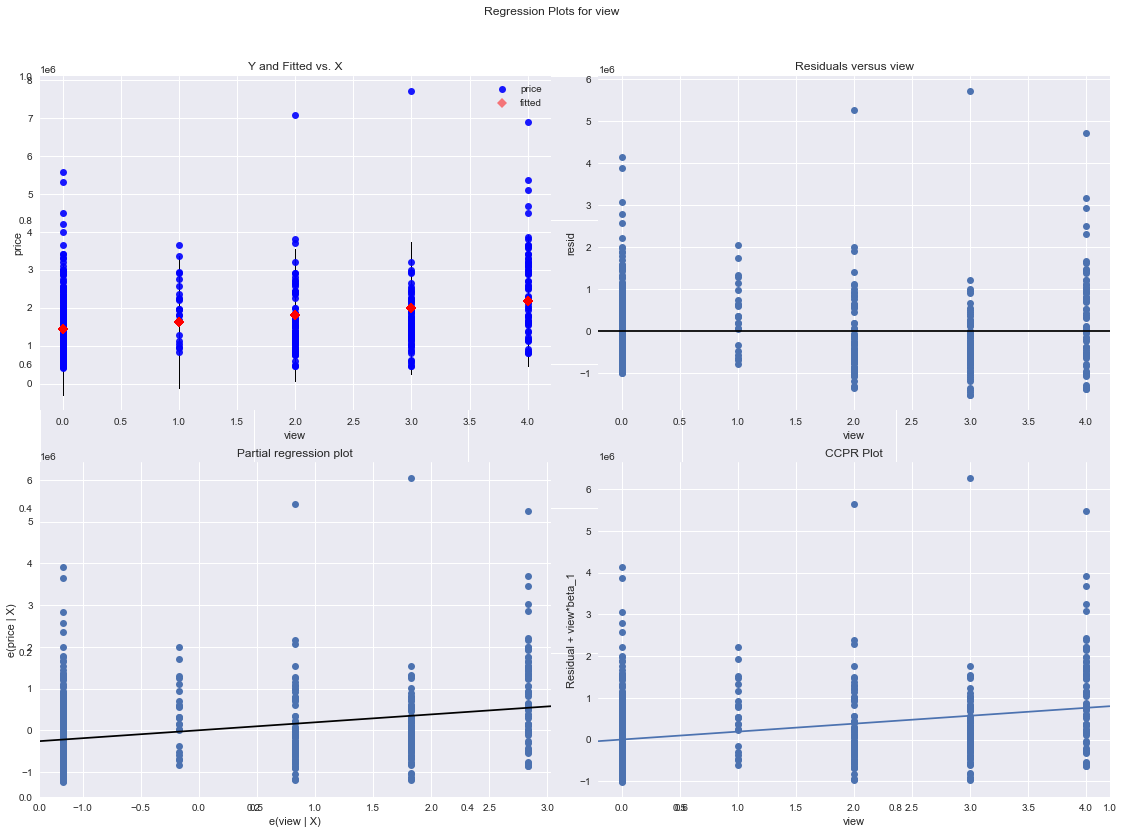

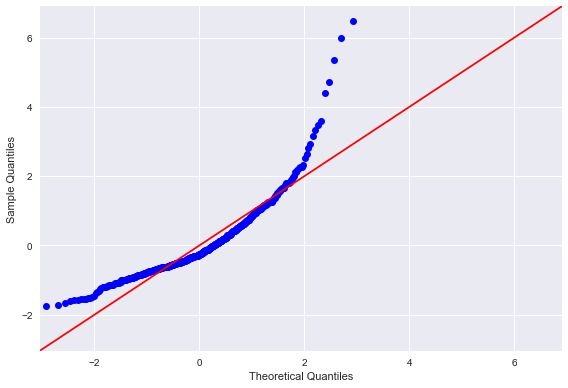

Regression Diagnostics for Price~condition


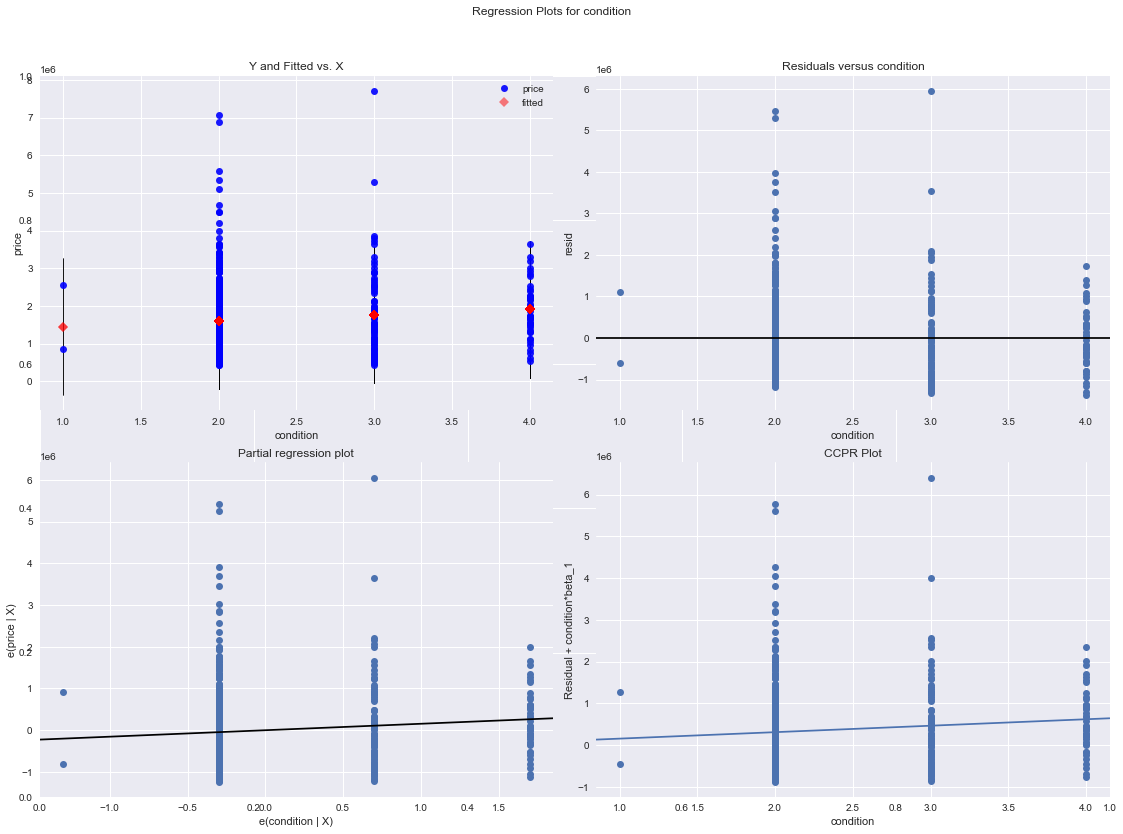

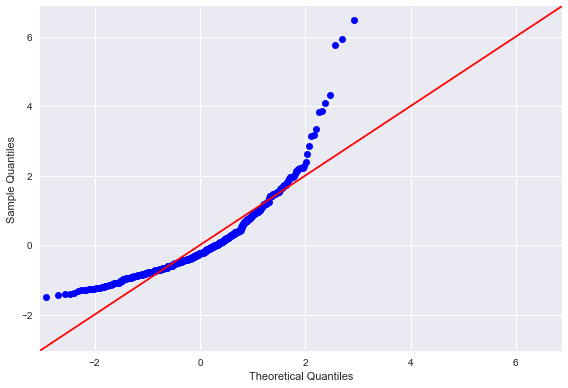

Regression Diagnostics for Price~grade


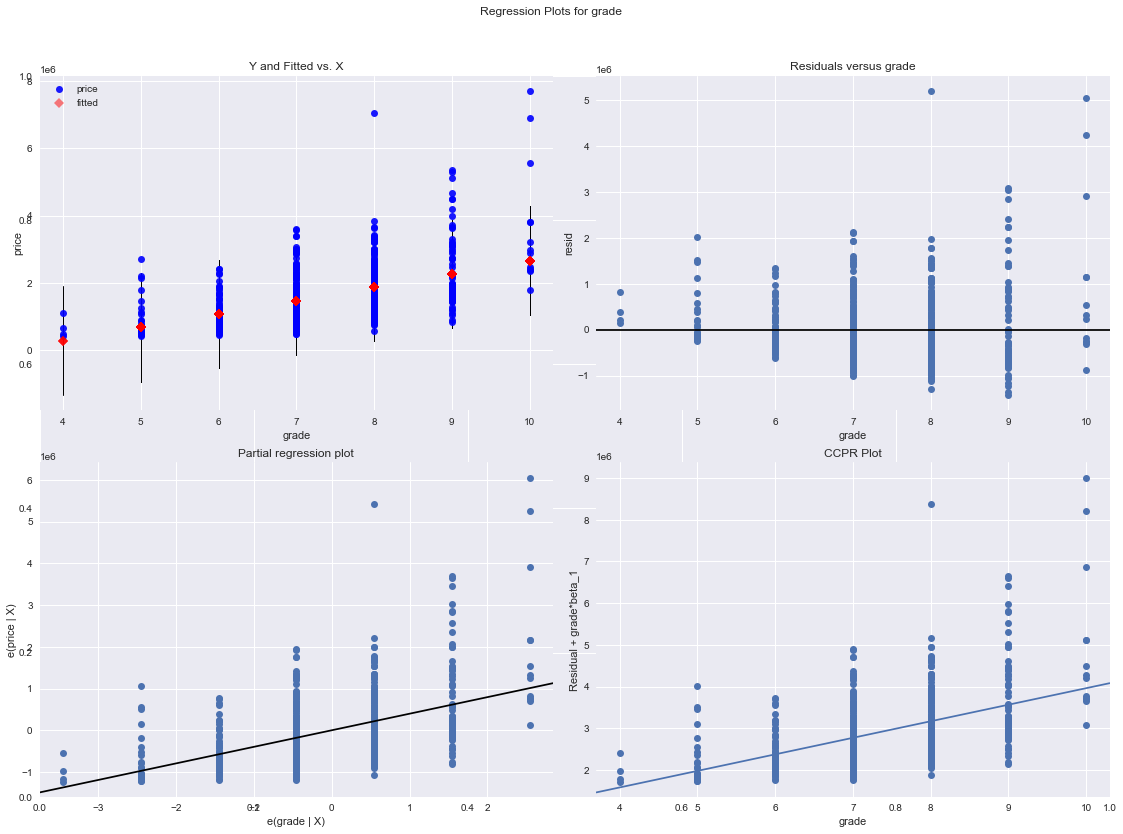

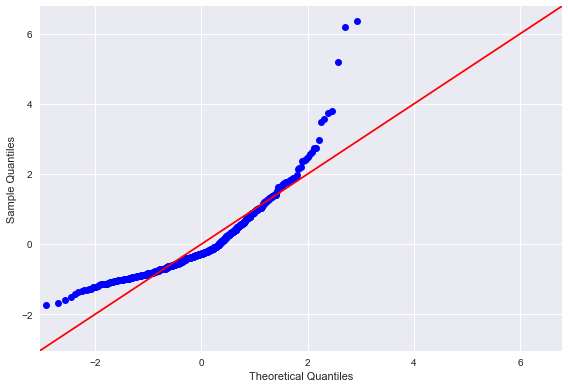

Regression Diagnostics for Price~sqft_above


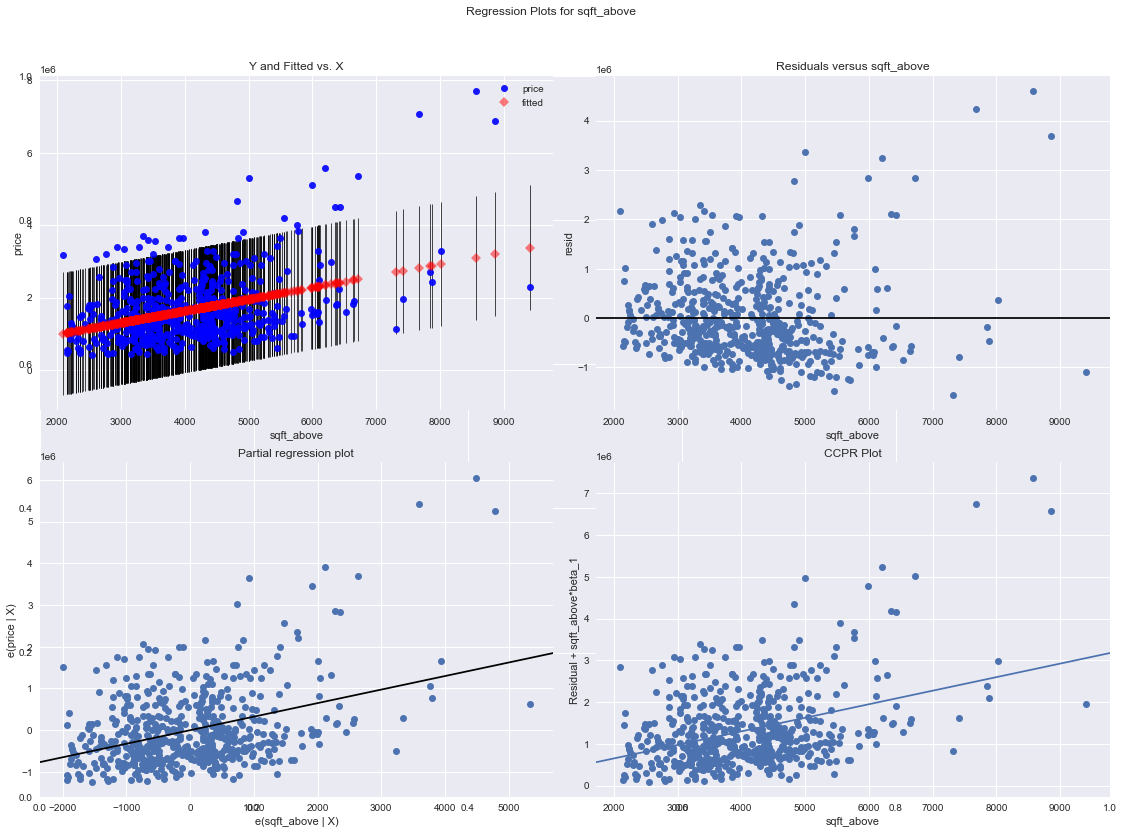

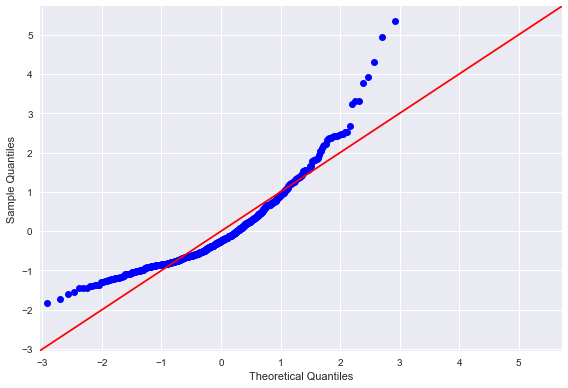

Regression Diagnostics for Price~sqft_basement


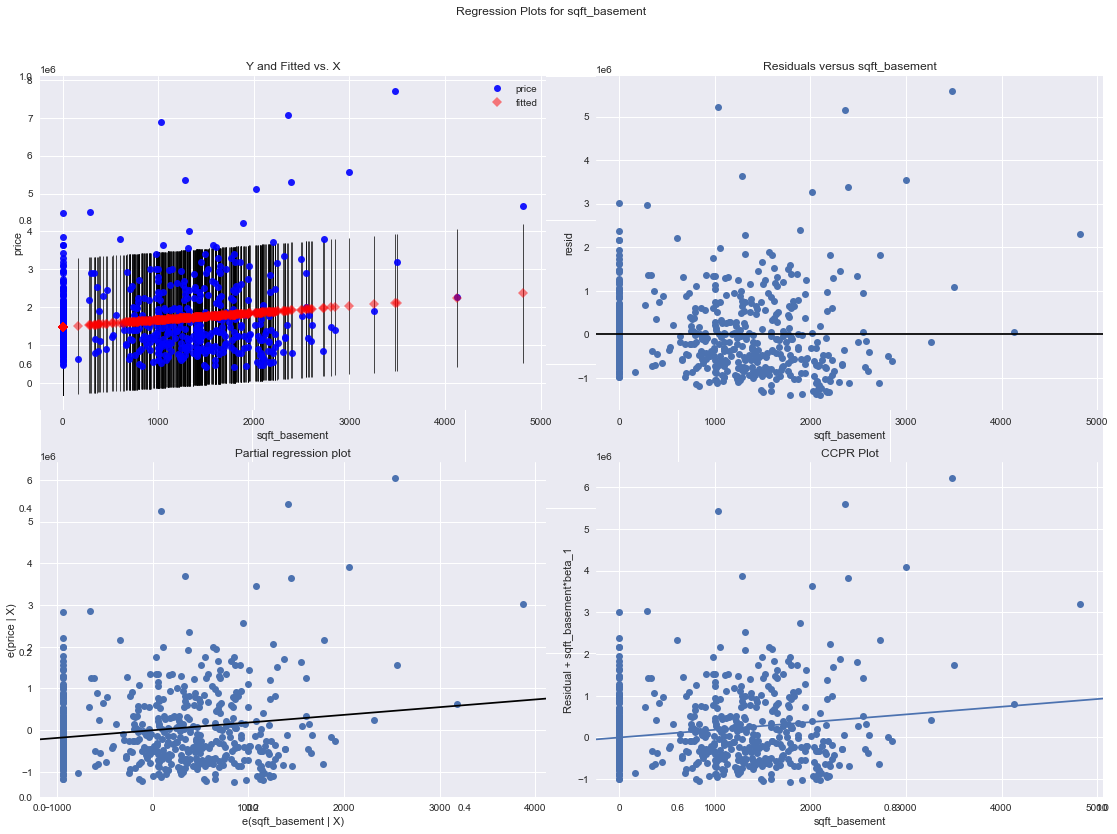

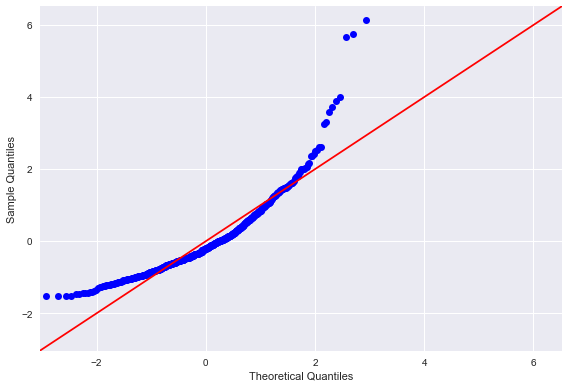

Regression Diagnostics for Price~yr_built


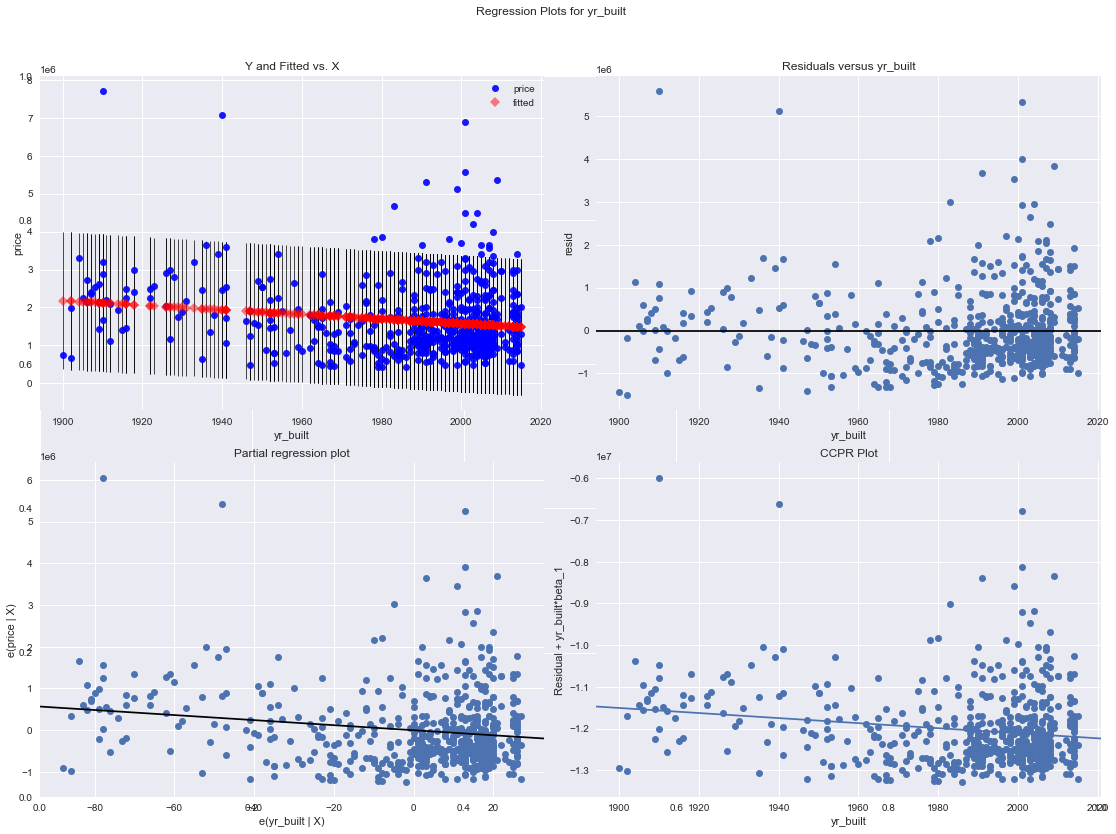

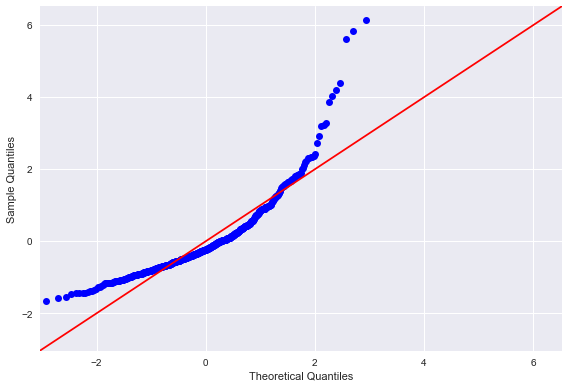

Regression Diagnostics for Price~yr_renovated


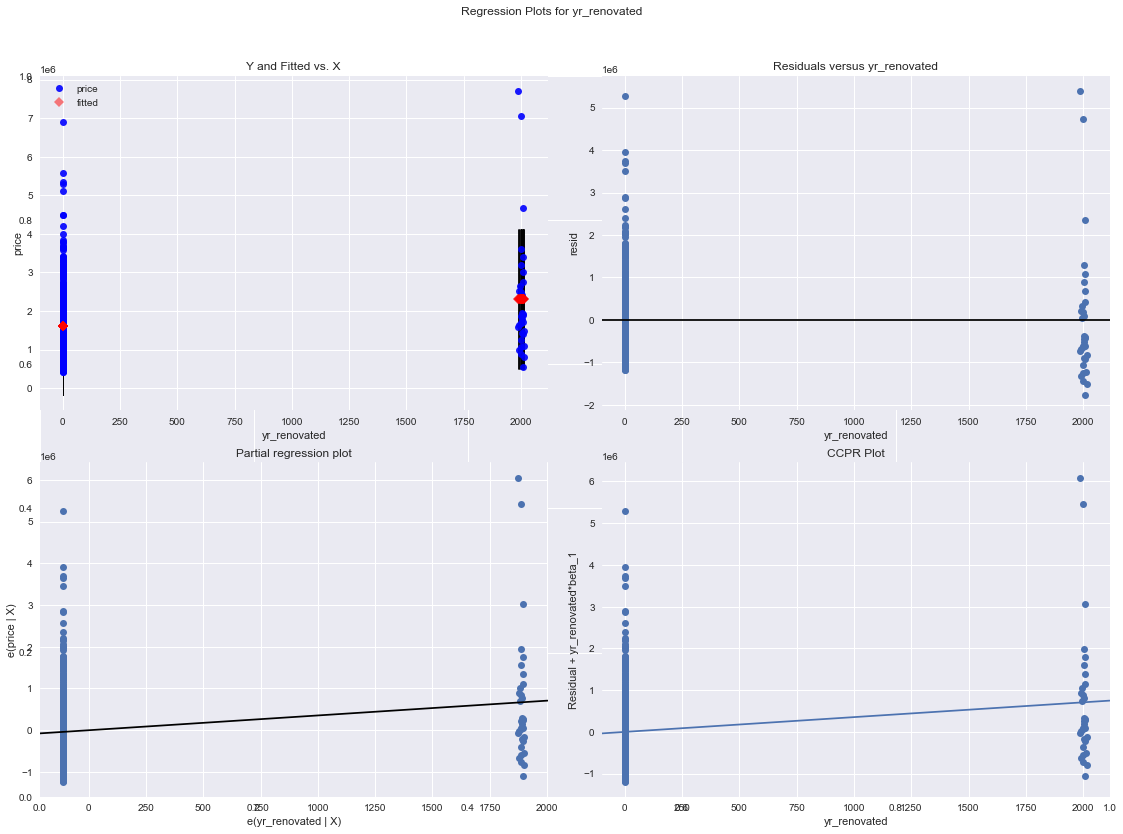

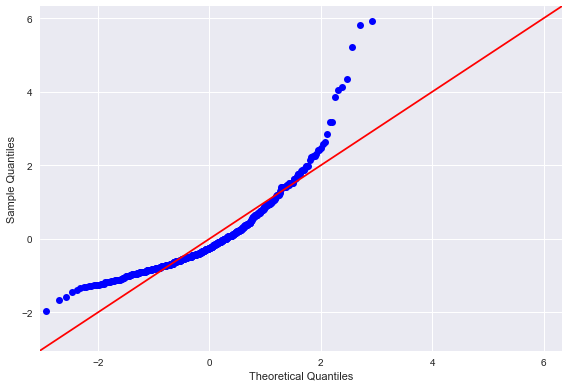

Regression Diagnostics for Price~zipcode


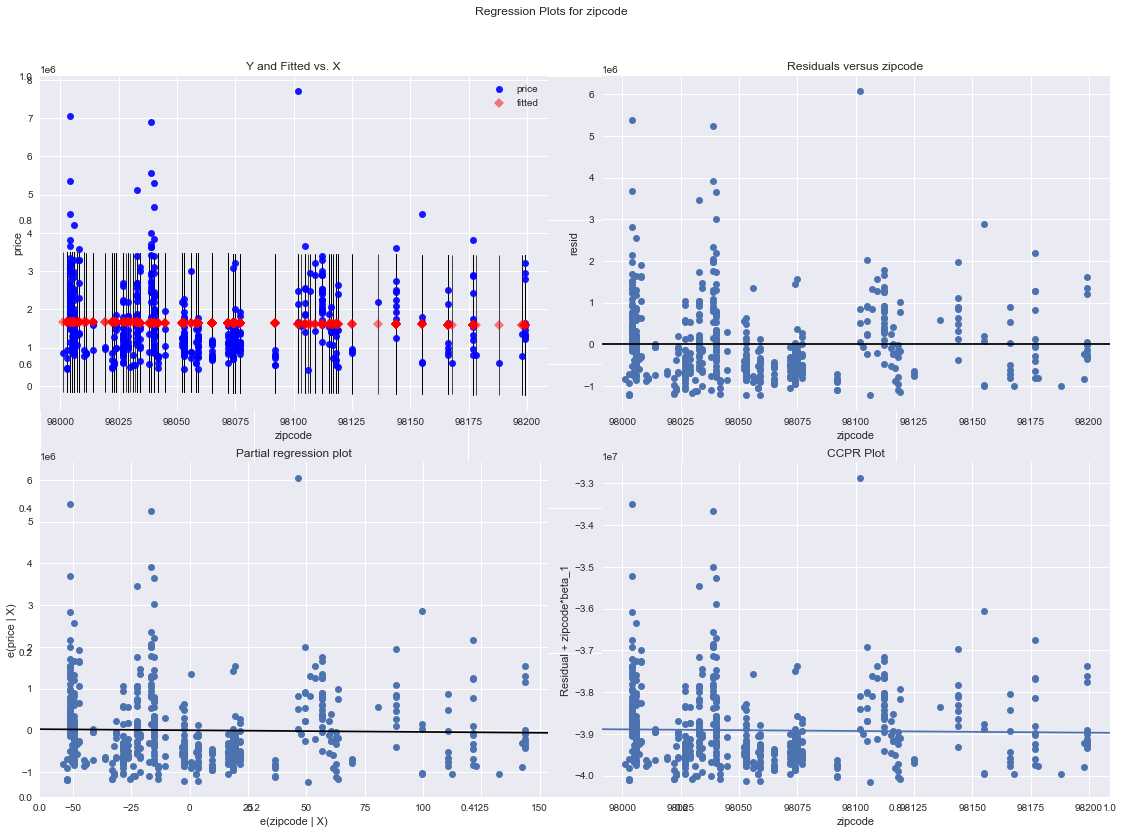

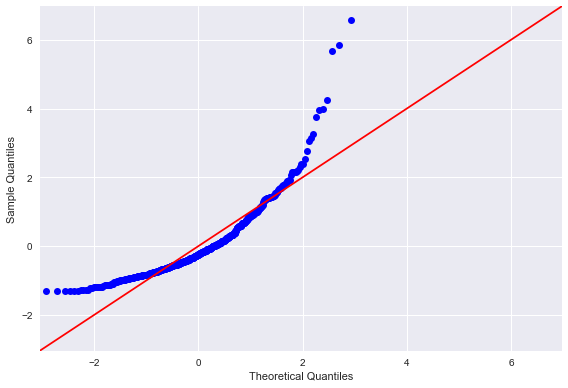

Regression Diagnostics for Price~lat


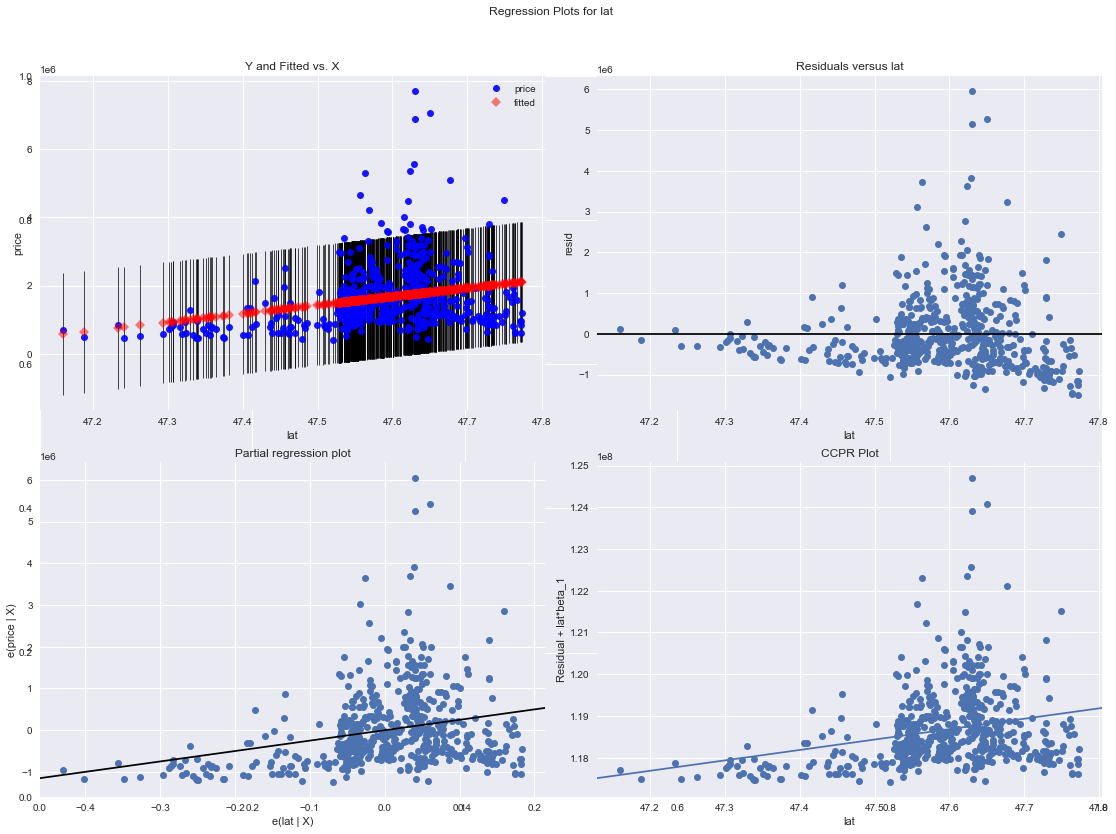

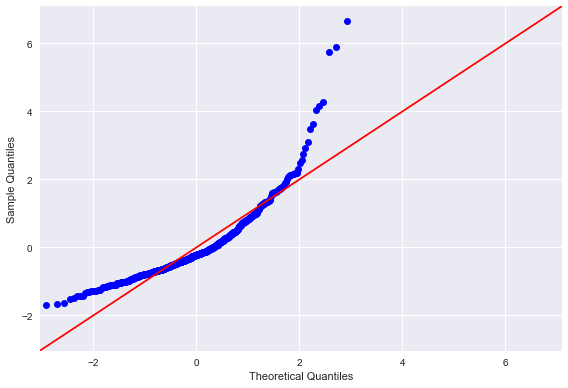

Regression Diagnostics for Price~long


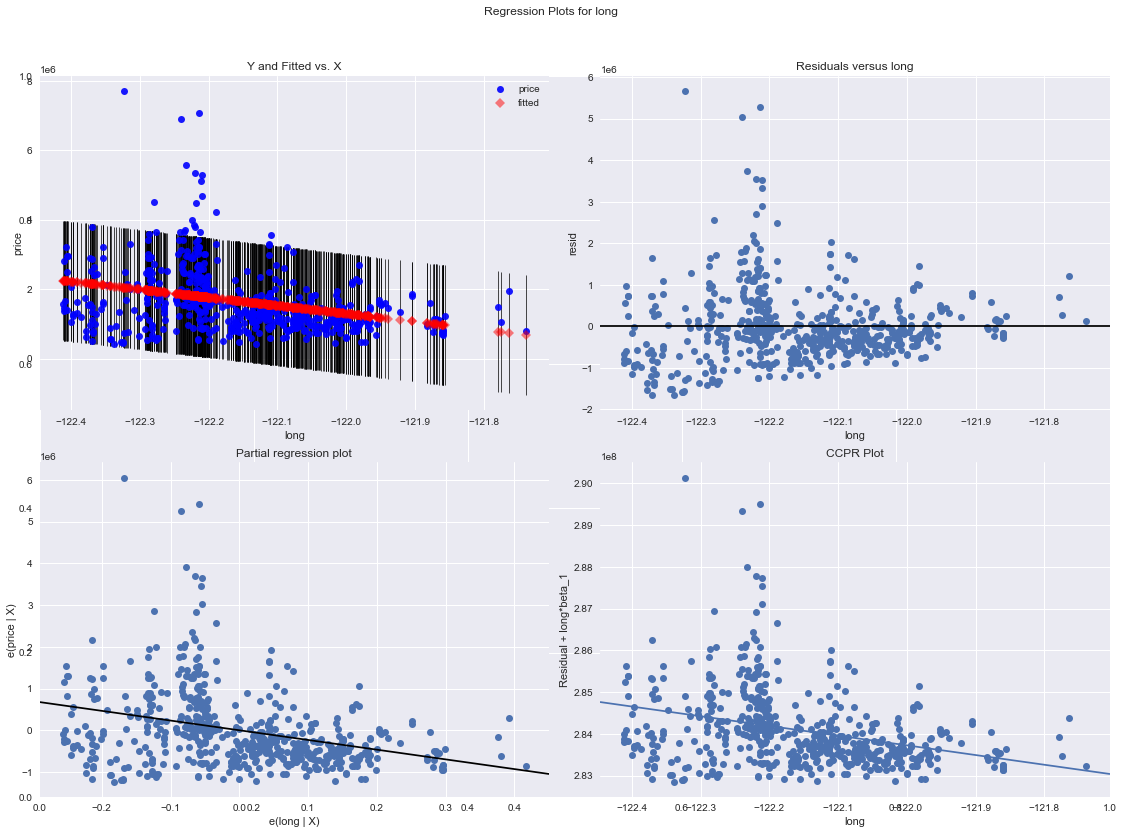

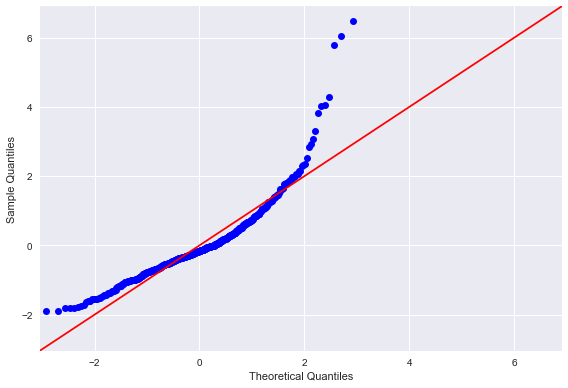

Regression Diagnostics for Price~sqft_living15


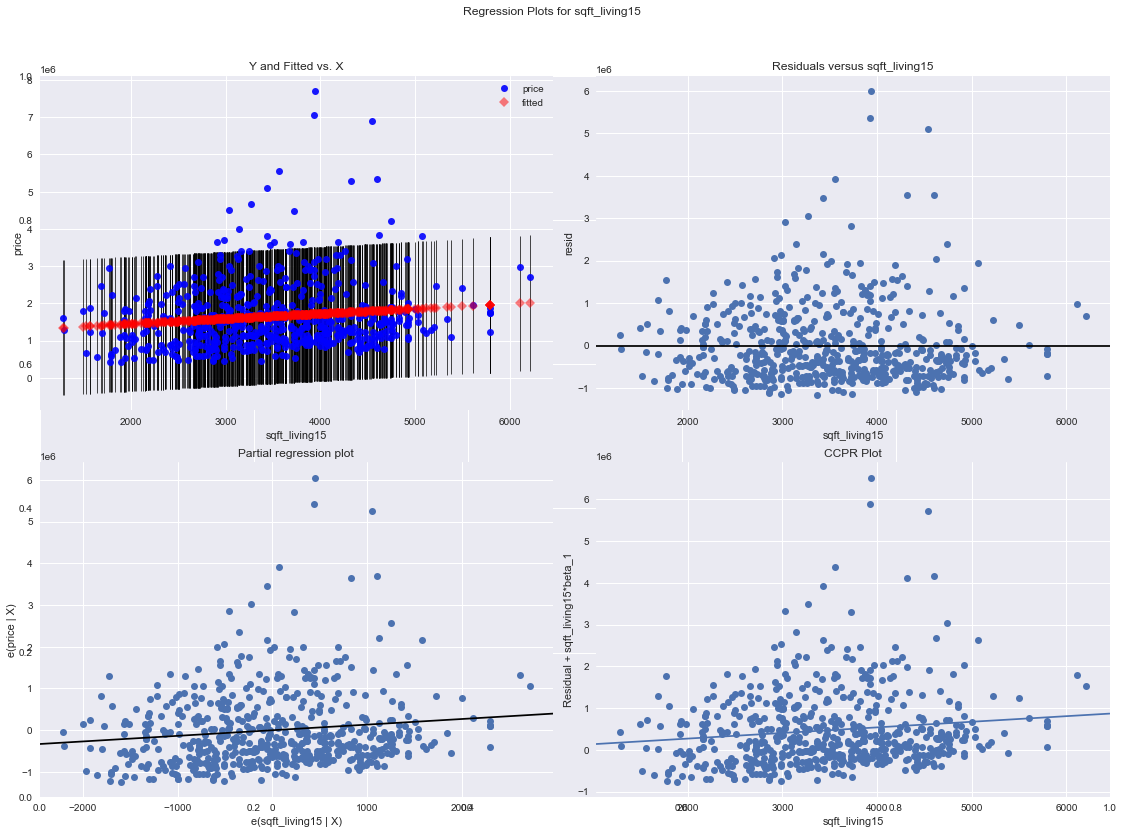

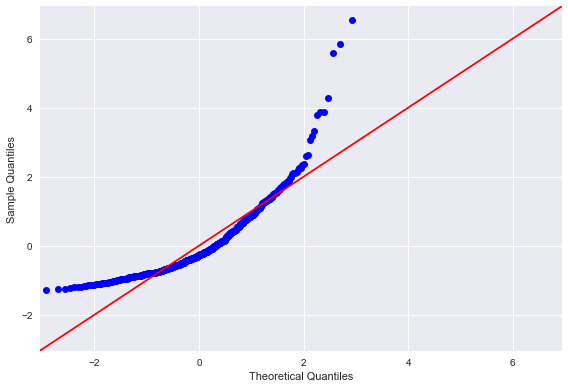

Regression Diagnostics for Price~sqft_lot15


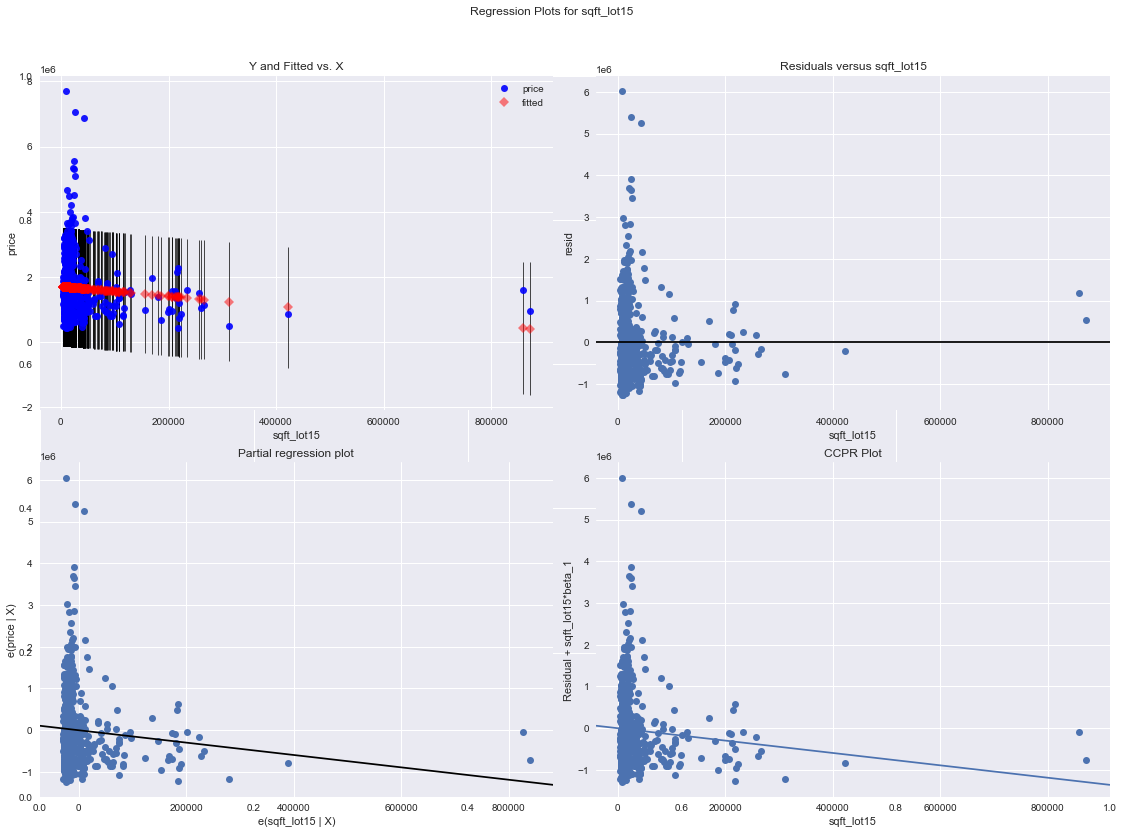

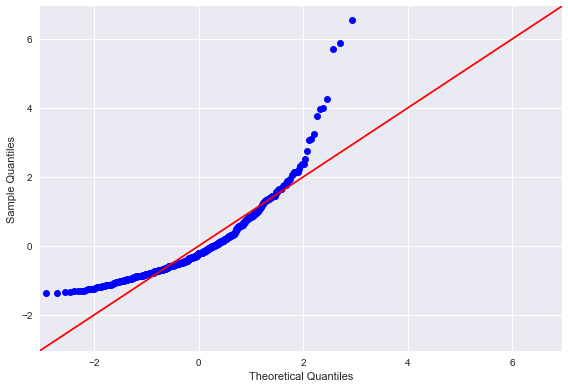

In [34]:
# observe regression diagnostics with filtered dfm5

# check assumptions
for idx, column in enumerate(dfm5.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=dfm5).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

In [35]:
dfm5.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [36]:
outcome = 'price'
x_cols = ['sqft_living', 'grade', 'bathrooms',
          'condition', 'waterfront']
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dfm5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     112.7
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           5.97e-83
Time:                        13:41:26   Log-Likelihood:                -8621.5
No. Observations:                 582   AIC:                         1.726e+04
Df Residuals:                     576   BIC:                         1.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.844e+06   2.43e+05    -11.695      0.000   -3.32e+06   -2.37e+06
sqft_living   259.2030     35.795      7.241      0.000     188.899     329.507
grade        2.683e+05   2.81e+04      9.541      0.000    2.13e+05    3.23e+05
bathrooms     1.37e+05   3.98e+04      3.444      0.001    5.89e+04    2.15e+05
condition    2.572e+05   4.57e+04      5.627      0.000    1.67e+05    3.47e+05
waterfront   1.296e+06   1.18e+05     11.007      0.000    1.06e+06    1.53e+06
==============================================================================
Omnibus:                       95.671   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.170
Skew:                           0.902   Prob(JB):                     4.62e-45
Kurtosis:                       5.273   Cond. No.                     4.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# evaluate MAE

from statsmodels.tools.eval_measures import meanabs
mae = meanabs

X = dfm5[['sqft_living', 'grade', 'bathrooms',
          'condition', 'waterfront']]
# generate predictions
ypred = model.predict(X)

# calc MAE
mae = mae(dfm5['price'], ypred)
mae

487628.9922448157

### Model 5.5: Improve on Model 5

In [38]:
# improve on preprocessing
dfm5_5 = dfm5[['price', 'sqft_living', 'grade', 'bathrooms',
          'condition', 'waterfront']].copy()

# Treat categorical variables with dummy variables
to_dum = ['condition', 'grade', 'bathrooms']

for d in to_dum:
    dummy = pd.get_dummies(dfm5_5[d], prefix=d, drop_first=True)
    dfm5_5 = dfm5_5.drop([d], axis=1)
    dfm5_5 = pd.concat([dfm5_5, dummy], axis=1)

    
# handle bathrooms column for Python OLS handling
dfm5_5 = dfm5_5.rename(columns={"bathrooms_2.0": "br_2_0", "bathrooms_2.25": "br_2_25", 
                   "bathrooms_2.5": "br_2_5", "bathrooms_2.75": "br_2_75",
                  "bathrooms_3.0": "br_3_0", "bathrooms_3.25": "br_3_25",
                  "bathrooms_3.25": "br_3_25", "bathrooms_3.5": "br_3_5",
                  "bathrooms_3.75": "br_3_75", "bathrooms_4.0": "br_4_0",
                  "bathrooms_4.25": "br_4_25", "bathrooms_4.5": "br_4_5",
                  "bathrooms_4.75": "br_4_75", "bathrooms_5.0": "br_5_0",
                  "bathrooms_5.25": "br_5_25", "bathrooms_5.5": "br_5_5",
                  "bathrooms_5.75": "br_5_75", "bathrooms_6.0": "br_6_0",
                  "bathrooms_6.25": "br_6_25", "bathrooms_6.5": "br_6_5",
                  "bathrooms_6.75": "br_6_75", "bathrooms_7.75": "br_7_75",
                  "bathrooms_8.0": "br_8_0"})    

dfm5_5.head()

price  sqft_living  waterfront  condition_2  condition_3  \
5    1230000.0         5420           0            1            0   
70   1040000.0         4770           0            0            1   
115   740500.0         4380           0            1            0   
153  2250000.0         5180           0            1            0   
239   472000.0         4410           0            0            1   

     condition_4  grade_5  grade_6  grade_7  grade_8  ...  br_5_0  br_5_25  \
5              0        0        0        0        1  ...       0        0   
70             0        0        0        0        1  ...       0        0   
115            0        1        0        0        0  ...       0        0   
153            0        0        0        0        0  ...       0        0   
239            0        0        1        0        0  ...       0        0   

     br_5_5  br_5_75  br_6_0  br_6_25  br_6_5  br_6_75  br_7_75  br_8_0  
5         0        0       0        0       0        0        0       0  
70        0        0       0        0       0        0        0       0  
115       0        0       0        0       0        0        0       0  
153       0        0       0        0       0        0        0       0  
239       0        0       0        0       0        0        0       0  

[5 rows x 34 columns]

In [39]:
outcome = 'price'
x_cols = dfm5_5.drop(['price'], axis=1).columns.to_list()

# perform train-test split
y = dfm5_5['price']
X = dfm5_5.drop(['price'], axis=1)

train, test = train_test_split(dfm5_5, random_state=42)

# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     13.13
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.92e-44
Time:                        13:41:26   Log-Likelihood:                -6434.3
No. Observations:                 436   AIC:                         1.293e+04
Df Residuals:                     404   BIC:                         1.306e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -2.5e+05   8.13e+05     -0.308      0.759   -1.85e+06    1.35e+06
sqft_living   144.7936     53.635      2.700      0.007      39.355     250.232
waterfront   1.144e+06   1.32e+05      8.685      0.000    8.85e+05     1.4e+06
condition_2   2.85e+05    6.9e+05      0.413      0.680   -1.07e+06    1.64e+06
condition_3  5.683e+05   6.92e+05      0.822      0.412   -7.91e+05    1.93e+06
condition_4  7.973e+05   6.97e+05      1.144      0.253   -5.72e+05    2.17e+06
grade_5      3.191e+05   4.22e+05      0.755      0.450   -5.11e+05    1.15e+06
grade_6      4.258e+05   3.92e+05      1.086      0.278   -3.45e+05     1.2e+06
grade_7      7.485e+05   3.87e+05      1.933      0.054   -1.26e+04    1.51e+06
grade_8      9.689e+05   3.89e+05      2.493      0.013    2.05e+05    1.73e+06
grade_9      1.219e+06   3.98e+05      3.062      0.002    4.36e+05       2e+06
grade_10     2.239e+06   4.61e+05      4.860      0.000    1.33e+06    3.14e+06
br_2_0      -9.899e+05    6.3e+05     -1.570      0.117   -2.23e+06    2.49e+05
br_2_25      8.926e+04   2.33e+05      0.384      0.701   -3.68e+05    5.46e+05
br_2_5      -5.001e+05   1.52e+05     -3.298      0.001   -7.98e+05   -2.02e+05
br_2_75     -1.135e+05   2.28e+05     -0.497      0.619   -5.62e+05    3.35e+05
br_3_0       -5.24e+04   1.63e+05     -0.321      0.748   -3.73e+05    2.69e+05
br_3_25     -2.106e+05   1.23e+05     -1.707      0.089   -4.53e+05     3.2e+04
br_3_5      -1.966e+05   1.16e+05     -1.697      0.090   -4.24e+05    3.11e+04
br_3_75        1.2e+04   1.48e+05      0.081      0.935   -2.79e+05    3.03e+05
br_4_0      -1.404e+05   1.34e+05     -1.050      0.294   -4.03e+05    1.22e+05
br_4_25     -5.992e+04   1.27e+05     -0.472      0.637   -3.09e+05    1.89e+05
br_4_5      -1.577e+05   1.33e+05     -1.184      0.237    -4.2e+05    1.04e+05
br_4_75      8.055e+04    1.9e+05      0.423      0.672   -2.94e+05    4.55e+05
br_5_0       2.217e+05   2.04e+05      1.088      0.277   -1.79e+05    6.22e+05
br_5_25      1.931e+05    2.9e+05      0.667      0.505   -3.76e+05    7.63e+05
br_5_5       1.682e+05   2.39e+05      0.705      0.481   -3.01e+05    6.37e+05
br_5_75      3.838e+05   3.87e+05      0.991      0.322   -3.77e+05    1.14e+06
br_6_0       6.735e+05   2.74e+05      2.455      0.015    1.34e+05    1.21e+06
br_6_25      1.135e+06   6.35e+05      1.787      0.075   -1.13e+05    2.38e+06
br_6_5      -7.304e+05   6.23e+05     -1.173      0.242   -1.96e+06    4.94e+05
br_6_75     -1.287e+06    6.3e+05     -2.044      0.042   -2.53e+06    -4.9e+04
br_7_75              0          0        nan        nan           0           0
br_8_0       1.232e+06    5.7e+05      2.162      0.031    1.12e+05    2.35e+06
==============================================================================
Omnibus:                       42.439   Durb

In [40]:
# generate predictions
ypred = model.predict(X)

# calc MAE
mae = meanabs
mae = mae(dfm5['price'], ypred)
mae

478146.1415883211

In [41]:
# try with zipcode too
dfm5_5_2 = dfm5_5.copy()
dfm5_5_2 = pd.concat([dfm5_5_2, dfm5['zipcode']], axis=1)
dfm5_5_2 = pd.concat([dfm5_5_2, dfm5['bedrooms']], axis=1)
dfm5_5_2.columns

Index(['price', 'sqft_living', 'waterfront', 'condition_2', 'condition_3',
       'condition_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'br_2_0', 'br_2_25', 'br_2_5', 'br_2_75', 'br_3_0',
       'br_3_25', 'br_3_5', 'br_3_75', 'br_4_0', 'br_4_25', 'br_4_5',
       'br_4_75', 'br_5_0', 'br_5_25', 'br_5_5', 'br_5_75', 'br_6_0',
       'br_6_25', 'br_6_5', 'br_6_75', 'br_7_75', 'br_8_0', 'zipcode',
       'bedrooms'],
      dtype='object')

In [42]:
outcome = 'price'
x_cols = dfm5_5_2.drop(['price'], axis=1).columns.to_list()

# perform train-test split
y = dfm5_5_2['price']
X = dfm5_5_2.drop(['price'], axis=1)

train, test = train_test_split(dfm5_5_2, random_state=42)

# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     12.43
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.03e-43
Time:                        13:41:27   Log-Likelihood:                -6432.9
No. Observations:                 436   AIC:                         1.293e+04
Df Residuals:                     402   BIC:                         1.307e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.906e+07   6.39e+07      1.394      0.164   -3.65e+07    2.15e+08
sqft_living   140.9768     54.335      2.595      0.010      34.160     247.793
waterfront   1.177e+06   1.34e+05      8.802      0.000    9.14e+05    1.44e+06
condition_2  3.086e+05   6.92e+05      0.446      0.656   -1.05e+06    1.67e+06
condition_3   5.93e+05   6.94e+05      0.854      0.394   -7.72e+05    1.96e+06
condition_4  8.659e+05   7.01e+05      1.234      0.218   -5.13e+05    2.24e+06
grade_5      3.199e+05   4.23e+05      0.757      0.449   -5.11e+05    1.15e+06
grade_6      4.168e+05   3.93e+05      1.060      0.290   -3.56e+05    1.19e+06
grade_7        7.4e+05   3.89e+05      1.904      0.058    -2.4e+04     1.5e+06
grade_8      9.604e+05   3.91e+05      2.454      0.015    1.91e+05    1.73e+06
grade_9      1.209e+06   4.02e+05      3.004      0.003    4.18e+05       2e+06
grade_10     2.258e+06   4.62e+05      4.883      0.000    1.35e+06    3.17e+06
br_2_0       3.265e+06   3.08e+06      1.060      0.290   -2.79e+06    9.32e+06
br_2_25      4.354e+06   3.04e+06      1.432      0.153   -1.63e+06    1.03e+07
br_2_5       3.773e+06   3.05e+06      1.238      0.216   -2.22e+06    9.76e+06
br_2_75      4.136e+06   3.05e+06      1.357      0.175   -1.86e+06    1.01e+07
br_3_0       4.237e+06   3.06e+06      1.386      0.167   -1.77e+06    1.02e+07
br_3_25       4.05e+06   3.04e+06      1.333      0.183   -1.92e+06       1e+07
br_3_5       4.061e+06   3.04e+06      1.336      0.182   -1.91e+06       1e+07
br_3_75      4.278e+06   3.05e+06      1.402      0.162   -1.72e+06    1.03e+07
br_4_0       4.101e+06   3.04e+06      1.351      0.177   -1.87e+06    1.01e+07
br_4_25        4.2e+06   3.04e+06      1.380      0.168   -1.78e+06    1.02e+07
br_4_5       4.093e+06   3.04e+06      1.344      0.180   -1.89e+06    1.01e+07
br_4_75      4.327e+06   3.05e+06      1.419      0.157   -1.67e+06    1.03e+07
br_5_0       4.466e+06   3.04e+06      1.468      0.143   -1.51e+06    1.04e+07
br_5_25        4.4e+06   3.05e+06      1.445      0.149   -1.59e+06    1.04e+07
br_5_5       4.405e+06   3.04e+06      1.449      0.148   -1.57e+06    1.04e+07
br_5_75      4.648e+06   3.06e+06      1.517      0.130   -1.38e+06    1.07e+07
br_6_0       4.878e+06   3.04e+06      1.606      0.109   -1.09e+06    1.09e+07
br_6_25      5.351e+06   3.07e+06      1.740      0.083   -6.94e+05    1.14e+07
br_6_5        3.52e+06   3.13e+06      1.126      0.261   -2.62e+06    9.66e+06
br_6_75      3.031e+06   3.19e+06      0.950      0.343   -3.24e+06     9.3e+06
br_7_75      2.475e-11   4.01e-11      0.617      0.538   -5.41e-11    1.04e-10
br_8_0       5.484e+06    3.1e+06      1.770      0.077   -6.06e+05    1.16e+07
zipcode      -955.3363    682.448     -1.400      0.162   -2296.948     386.275
bedrooms     2.423e+04   3.91e+04      0.62

#### exploring relationship between sqft_living, sqft_above, sqft_basement

In [43]:
df_e = df[['sqft_living', 'sqft_above', 'sqft_basement']]
df_e

sqft_living  sqft_above  sqft_basement
0             1180        1180              0
1             2570        2170            400
2              770         770              0
3             1960        1050            910
4             1680        1680              0
...            ...         ...            ...
21592         1530        1530              0
21593         2310        2310              0
21594         1020        1020              0
21595         1600        1600              0
21596         1020        1020              0

[21597 rows x 3 columns]

Looks like sqft_living is the sum of sqft_above and sqft_basement

### Model 6 - exploring zipcode and sqft_living

In [44]:
# I want to see the distribution of price vs. specifc zipcodes
df_zip = df[['price', 'sqft_living', 'zipcode']].copy()
df_zip.head()

price  sqft_living  zipcode
0  221900.0         1180    98178
1  538000.0         2570    98125
2  180000.0          770    98028
3  604000.0         1960    98136
4  510000.0         1680    98074

In [45]:
# how many unique zipcodes are there in the dataset?
n = len(pd.unique(df_zip['zipcode']))

# how many in dfm5?
n1 = len(pd.unique(dfm5['zipcode']))

print(n, n1)

70 61


In [46]:
# I will actually just keep dfm5 and create new df from there because it has
# some preprocessing already
df_zip2 = dfm5[['price', 'zipcode', 'sqft_living']].copy()
print(len(dfm5))
df_zip2.head()

582


price  zipcode  sqft_living
5    1230000.0    98053         5420
70   1040000.0    98005         4770
115   740500.0    98117         4380
153  2250000.0    98006         5180
239   472000.0    98003         4410

In [47]:
# now I want to explore the distribution of price vs. different zipcodes
df_zip3 = df_zip2.groupby(by='zipcode').mean()

# get rid of scientific notation
df_zip3['price'] = df_zip3['price'].round(2)

# sort by descending mean prices
df_zip3 = df_zip3.sort_values(by='price', ascending=False)
df_zip3

price  sqft_living
zipcode                         
98102    3502500.00  7107.500000
98039    3301764.71  5600.588235
98107    2715000.00  4340.000000
98008    2555714.29  5397.142857
98109    2510000.00  5250.000000
...             ...          ...
98168     600000.00  4440.000000
98188     598800.00  4470.000000
98032     545000.00  5461.000000
98030     490000.00  4480.000000
98106     419000.00  4340.000000

[61 rows x 2 columns]

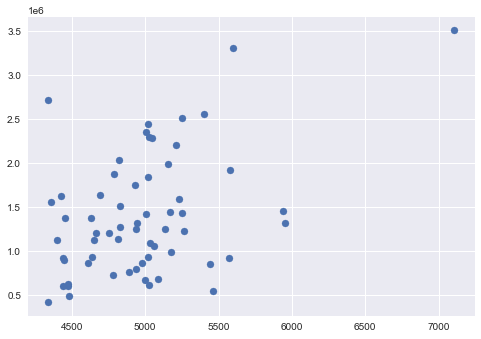

In [48]:
# scatterplot to visualize the data
plt.scatter(x=df_zip3['sqft_living'], y=df_zip3['price'])
plt.show()

### Model 7 (Statsmodels)

In [79]:
# Stressing method for removing outliers in this model
df_7 = df.copy()
df_7.describe()

price      bedrooms     bathrooms   sqft_living  \
count   21597.0000000 21597.0000000 21597.0000000 21597.0000000   
mean   540296.5735056     3.3732000     2.1158263  2080.3218503   
std    367368.1401014     0.9262989     0.7689843   918.1061251   
min     78000.0000000     1.0000000     0.5000000   370.0000000   
25%    322000.0000000     3.0000000     1.7500000  1430.0000000   
50%    450000.0000000     3.0000000     2.2500000  1910.0000000   
75%    645000.0000000     4.0000000     2.5000000  2550.0000000   
max   7700000.0000000    33.0000000     8.0000000 13540.0000000   

             sqft_lot        floors    waterfront          view     condition  \
count   21597.0000000 21597.0000000 21597.0000000 21597.0000000 21597.0000000   
mean    15099.4087605     1.4940964     0.0067602     0.2331805     2.4098254   
std     41412.6368755     0.5396828     0.0819439     0.7646726     0.6505456   
min       520.0000000     1.0000000     0.0000000     0.0000000     0.0000000   
25%      5040.0000000     1.0000000     0.0000000     0.0000000     2.0000000   
50%      7618.0000000     1.5000000     0.0000000     0.0000000     2.0000000   
75%     10685.0000000     2.0000000     0.0000000     0.0000000     3.0000000   
max   1651359.0000000     3.5000000     1.0000000     4.0000000     4.0000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count 21597.0000000 21597.0000000  21597.0000000 21597.0000000 21597.0000000   
mean      4.6579155  1788.5968422    285.7165810  1970.9996759    68.7582072   
std       1.1731997   827.7597612    439.8198296    29.3752341   364.0374991   
min       0.0000000   370.0000000      0.0000000  1900.0000000     0.0000000   
25%       4.0000000  1190.0000000      0.0000000  1951.0000000     0.0000000   
50%       4.0000000  1560.0000000      0.0000000  1975.0000000     0.0000000   
75%       5.0000000  2210.0000000    550.0000000  1997.0000000     0.0000000   
max      10.0000000  9410.0000000   4820.0000000  2015.0000000  2015.0000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count 21597.0000000 21597.0000000 21597.0000000  21597.0000000  21597.0000000  
mean  98077.9518452    47.5600930  -122.2139825   1986.6203176  12758.2835116  
std      53.5130724     0.1385518     0.1407235    685.2304719  27274.4419504  
min   98001.0000000    47.1559000  -122.5190000    399.0000000    651.0000000  
25%   98033.0000000    47.4711000  -122.3280000   1490.0000000   5100.0000000  
50%   98065.0000000    47.5718000  -122.2310000   1840.0000000   7620.0000000  
75%   98118.0000000    47.6780000  -122.1250000   2360.0000000  10083.0000000  
max   98199.0000000    47.7776000  -121.3150000   6210.0000000 871200.0000000

In [80]:
# Remove outliers based on price via IQR
IQR_low = np.quantile(df_7.price, 0.25)
IQR_high = np.quantile(df_7.price, 0.75)
df_7_IQR = df_7.loc[(df_7.price > IQR_low) & (df_7.price < IQR_high)] 

df_7_IQR

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
1     538000.0000000         3  2.2500000         2570      7242 2.0000000   
3     604000.0000000         4  3.0000000         1960      5000 1.0000000   
4     510000.0000000         3  2.0000000         1680      8080 1.0000000   
9     323000.0000000         3  2.5000000         1890      6560 2.0000000   
11    468000.0000000         2  1.0000000         1160      6000 1.0000000   
...              ...       ...        ...          ...       ...       ...   
21592 360000.0000000         3  2.5000000         1530      1131 3.0000000   
21593 400000.0000000         4  2.5000000         2310      5813 2.0000000   
21594 402101.0000000         2  0.7500000         1020      1350 2.0000000   
21595 400000.0000000         3  2.5000000         1600      2388 2.0000000   
21596 325000.0000000         2  0.7500000         1020      1076 2.0000000   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1               0     0          2      4        2170            400   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
9               0     0          2      4        1890              0   
11              0     0          3      4         860            300   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode        lat         long  sqft_living15  \
1          1951  1991.0000000    98125 47.7210000 -122.3190000           1690   
3          1965     0.0000000    98136 47.5208000 -122.3930000           1360   
4          1987     0.0000000    98074 47.6168000 -122.0450000           1800   
9          2003     0.0000000    98038 47.3684000 -122.0310000           2390   
11         1942     0.0000000    98115 47.6900000 -122.2920000           1330   
...         ...           ...      ...        ...          ...            ...   
21592      2009     0.0000000    98103 47.6993000 -122.3460000           1530   
21593      2014     0.0000000    98146 47.5107000 -122.3620000           1830   
21594      2009     0.0000000    98144 47.5944000 -122.2990000           1020   
21595      2004     0.0000000    98027 47.5345000 -122.0690000           1410   
21596      2008     0.0000000    98144 47.5941000 -122.2990000           1020   

       sqft_lot15  
1            7639  
3            5000  
4            7503  
9            7570  
11           6000  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[10780 rows x 19 columns]

In [81]:
# drop other outliers
df_7_IQR = df_7_IQR[df_7_IQR['bedrooms'] < 32]     # drops outlier of 33
df_7_IQR = df_7_IQR[df_7_IQR['bathrooms'] < 7]     # drops homes with over 7 bathrooms
df_7_IQR.describe()

price      bedrooms     bathrooms   sqft_living  \
count  10779.0000000 10779.0000000 10779.0000000 10779.0000000   
mean  461600.4167362     3.3149643     2.0630624  1929.3458577   
std    89616.5098040     0.8693507     0.6499904   646.8764287   
min   322200.0000000     1.0000000     0.7500000   410.0000000   
25%   385000.0000000     3.0000000     1.7500000  1450.0000000   
50%   450000.0000000     3.0000000     2.2500000  1860.0000000   
75%   535000.0000000     4.0000000     2.5000000  2330.0000000   
max   644500.0000000    11.0000000     7.5000000  5461.0000000   

             sqft_lot        floors    waterfront          view     condition  \
count   10779.0000000 10779.0000000 10779.0000000 10779.0000000 10779.0000000   
mean    14302.2714538     1.4946192     0.0018555     0.1363763     2.3828741   
std     36103.9032237     0.5568604     0.0430371     0.5592992     0.6238650   
min       600.0000000     1.0000000     0.0000000     0.0000000     0.0000000   
25%      4652.5000000     1.0000000     0.0000000     0.0000000     2.0000000   
50%      7203.0000000     1.0000000     0.0000000     0.0000000     2.0000000   
75%     10098.0000000     2.0000000     0.0000000     0.0000000     3.0000000   
max   1074218.0000000     3.5000000     1.0000000     4.0000000     4.0000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count 10779.0000000 10779.0000000  10779.0000000 10779.0000000 10779.0000000   
mean      4.4933667  1653.5612766    269.9515725  1971.9672511    52.1580852   
std       0.8059136   628.3833930    397.6332088    29.5947507   318.2487232   
min       1.0000000   410.0000000      0.0000000  1900.0000000     0.0000000   
25%       4.0000000  1180.0000000      0.0000000  1952.0000000     0.0000000   
50%       4.0000000  1500.0000000      0.0000000  1976.0000000     0.0000000   
75%       5.0000000  2050.0000000    520.0000000  1999.0000000     0.0000000   
max       8.0000000  5450.0000000   2196.0000000  2015.0000000  2015.0000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count 10779.0000000 10779.0000000 10779.0000000  10779.0000000  10779.0000000  
mean  98081.4020781    47.5901781  -122.2136829   1886.9447073  12488.6428240  
std      50.3049002     0.1304507     0.1464115    508.6407189  26855.1104317  
min   98001.0000000    47.1559000  -122.5190000    399.0000000    748.0000000  
25%   98034.0000000    47.5116000  -122.3380000   1500.0000000   4800.0000000  
50%   98074.0000000    47.6060000  -122.2370000   1810.0000000   7264.0000000  
75%   98118.0000000    47.6968000  -122.1210000   2230.0000000   9719.0000000  
max   98199.0000000    47.7776000  -121.3210000   4362.0000000 438213.0000000

In [82]:
# create dummy variables for categoricals
categoricals_d7 = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
                  'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
                  'lat', 'long']



<AxesSubplot:xlabel='bedrooms', ylabel='price'>

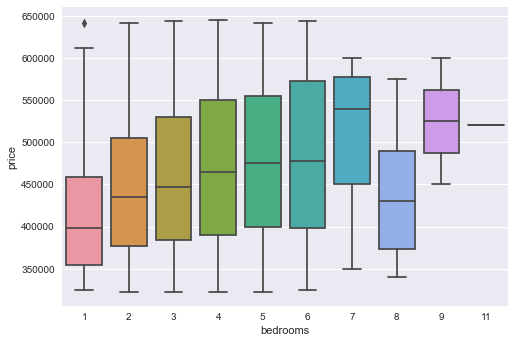

In [85]:
# boxplots for each categorical category
sns.boxplot(x='bedrooms', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

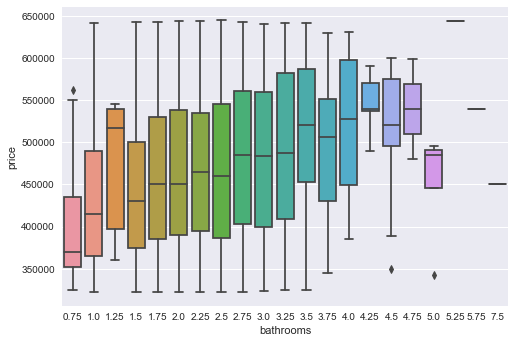

In [86]:
sns.boxplot(x='bathrooms', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='floors', ylabel='price'>

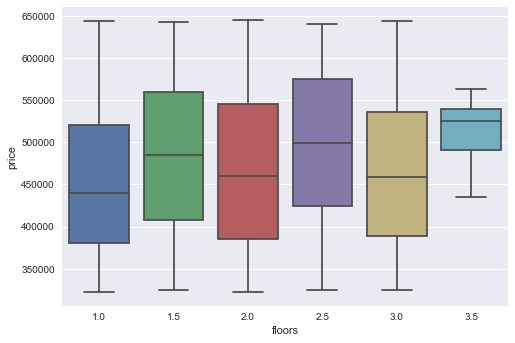

In [87]:
sns.boxplot(x='floors', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

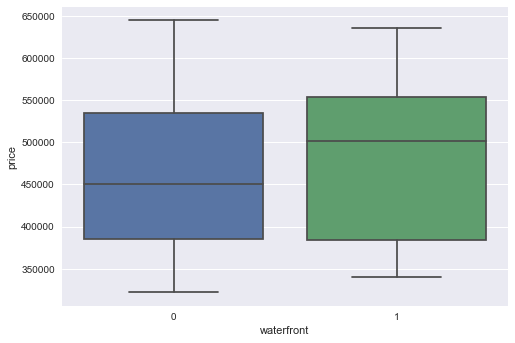

In [88]:
sns.boxplot(x='waterfront', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='view', ylabel='price'>

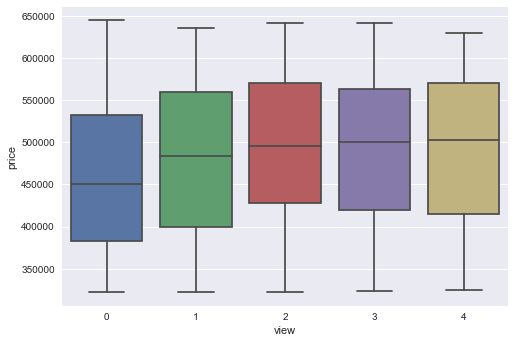

In [89]:
sns.boxplot(x='view', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='condition', ylabel='price'>

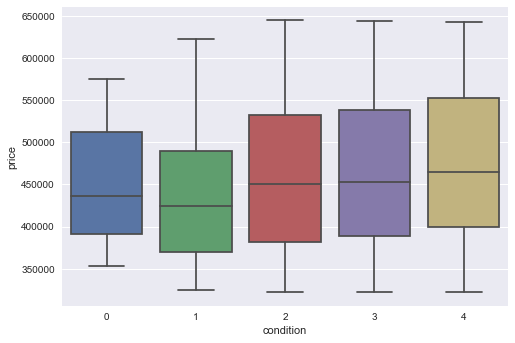

In [90]:
sns.boxplot(x='condition', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='grade', ylabel='price'>

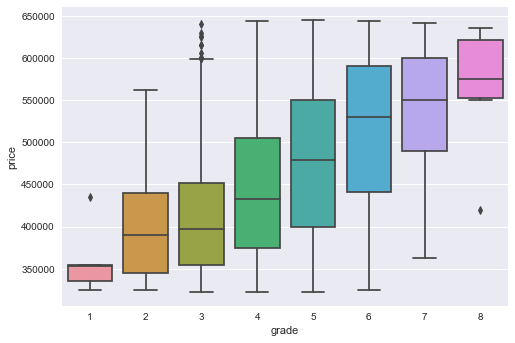

In [91]:
sns.boxplot(x='grade', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

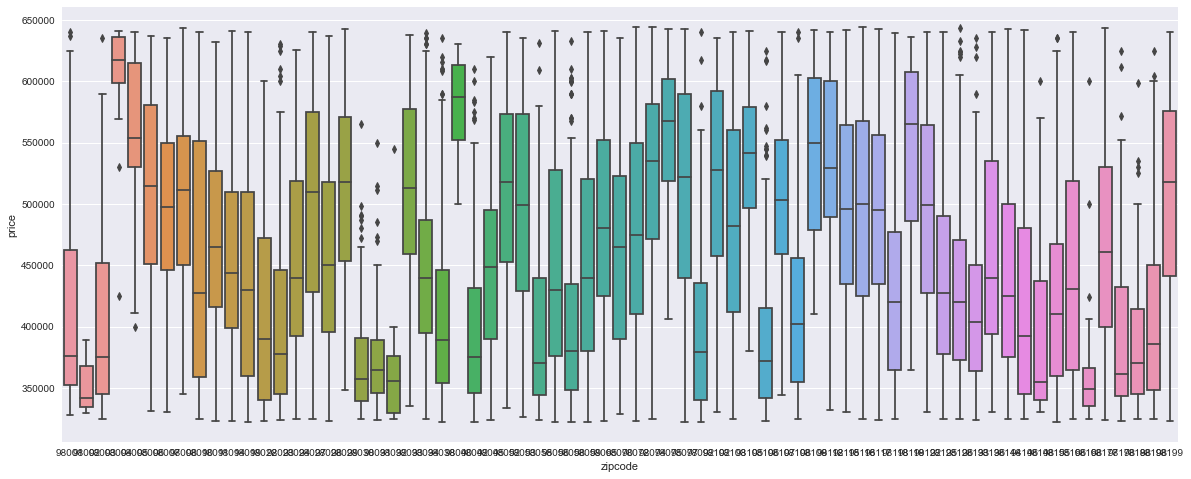

In [95]:
plt.figure(figsize=(20,8))
sns.boxplot(x='zipcode', y='price', data=df_7_IQR)

Regression Diagnostics for Price~price


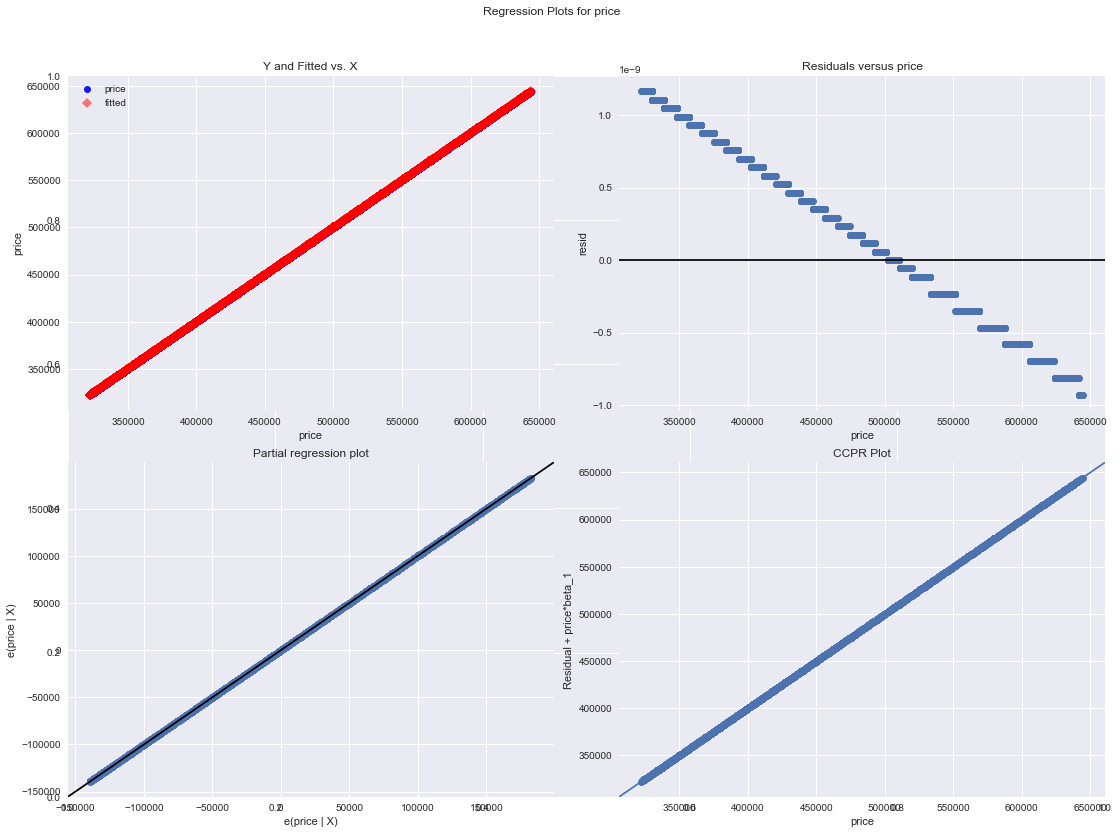

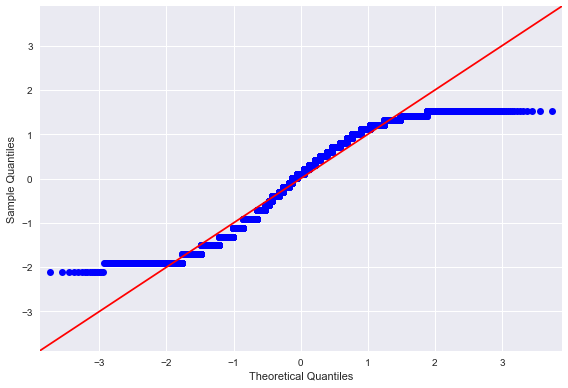

Regression Diagnostics for Price~bedrooms


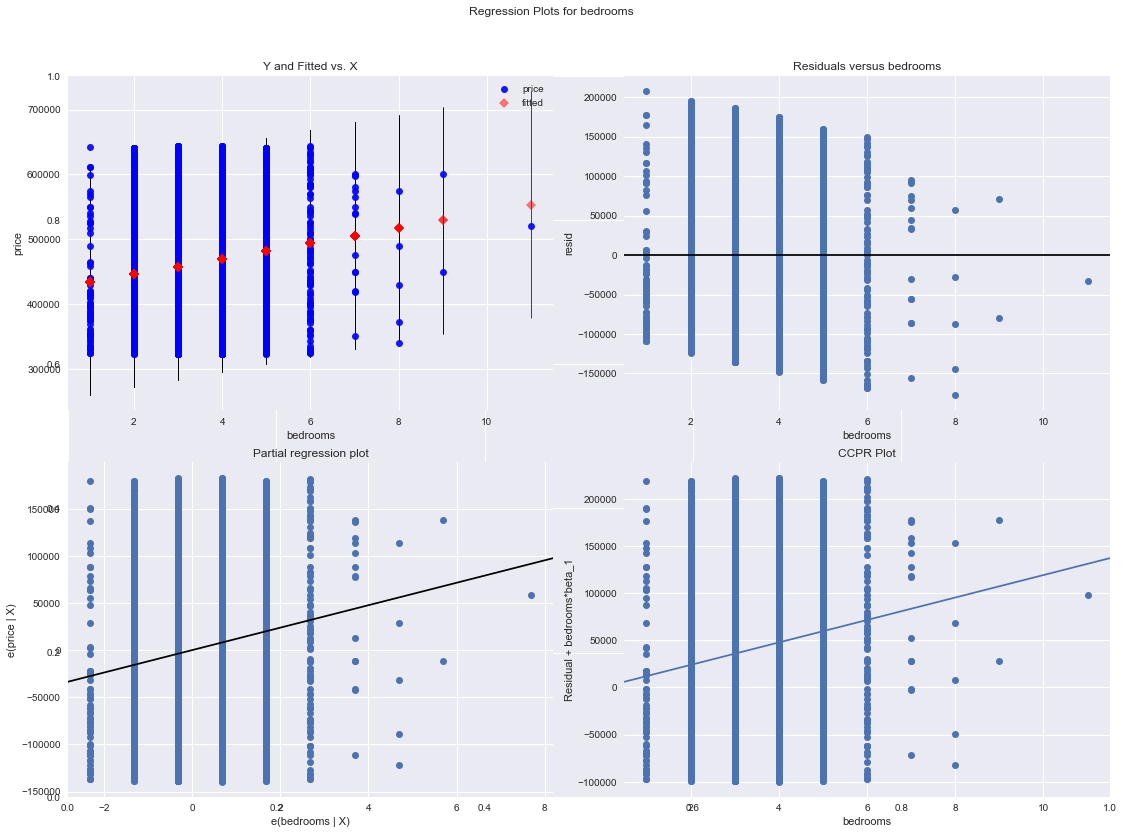

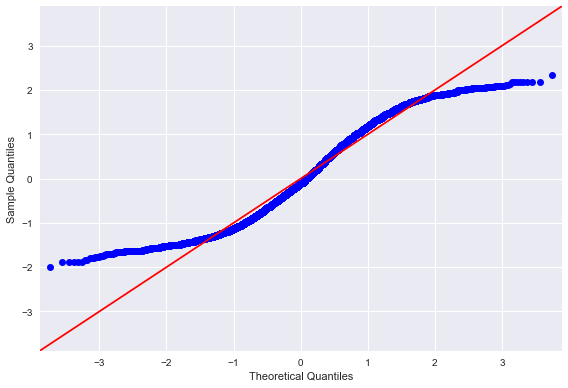

Regression Diagnostics for Price~bathrooms


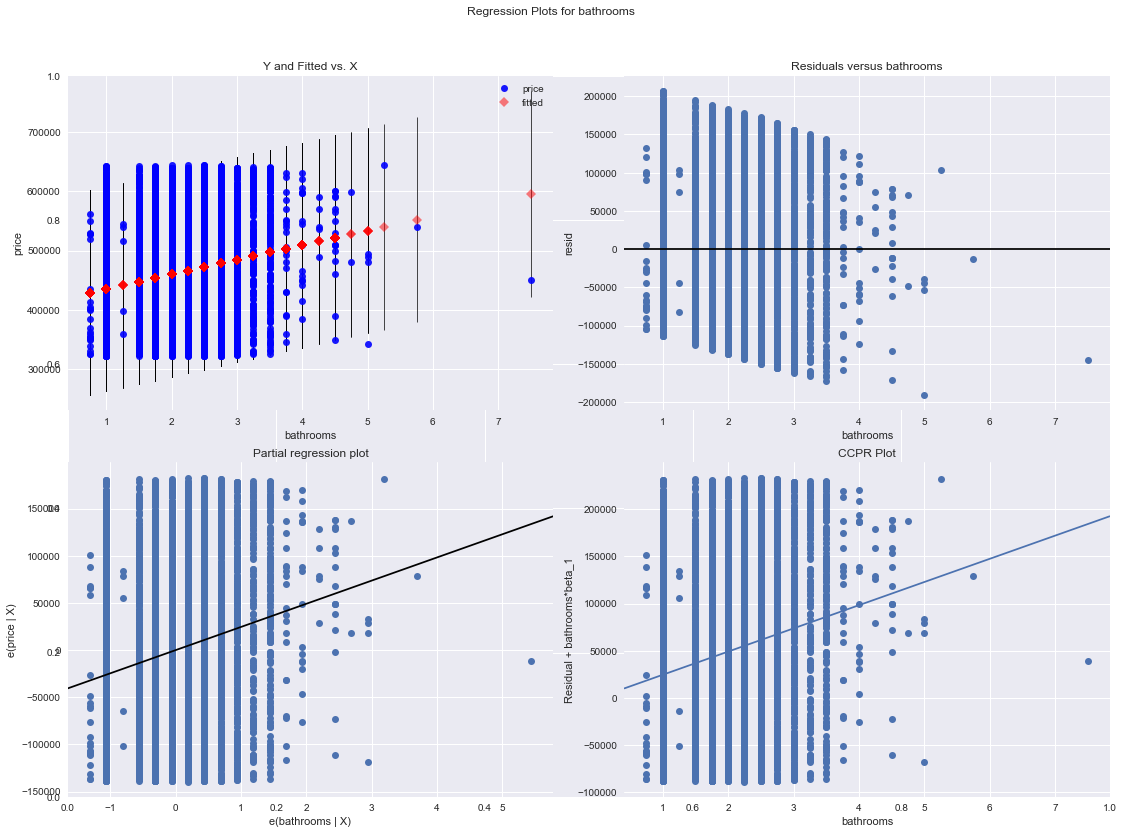

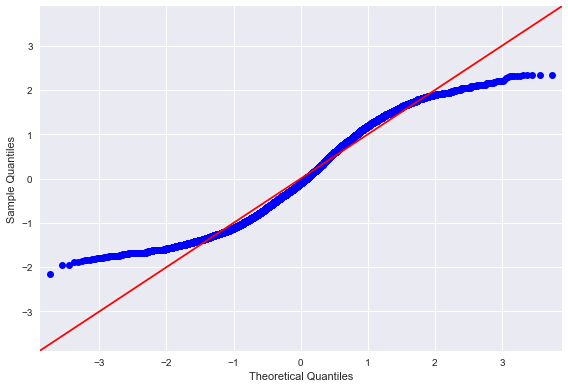

Regression Diagnostics for Price~sqft_living


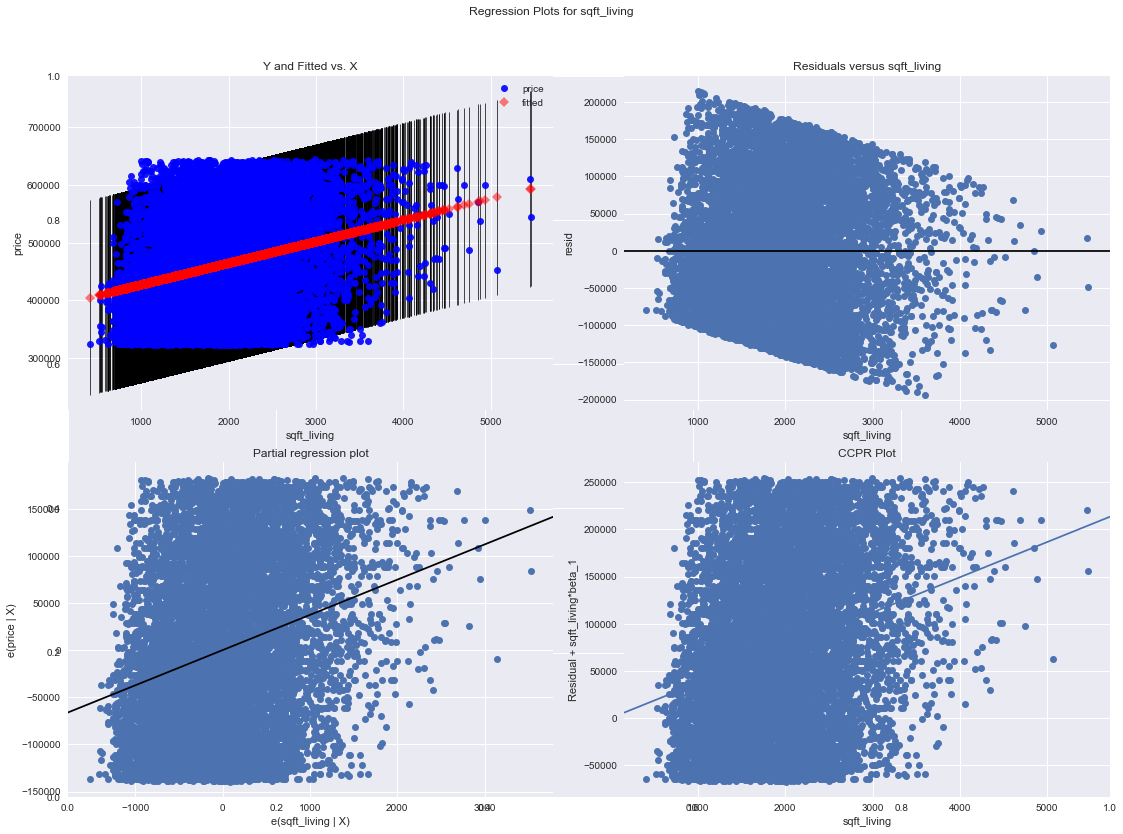

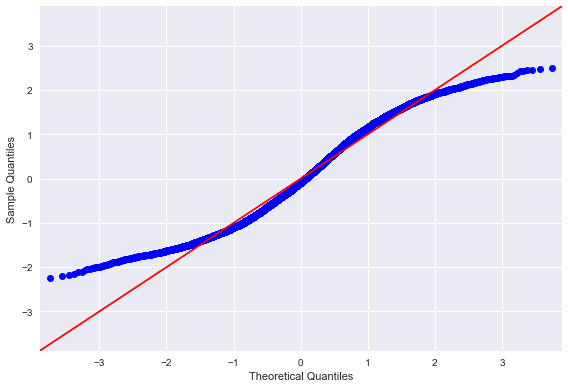

Regression Diagnostics for Price~sqft_lot


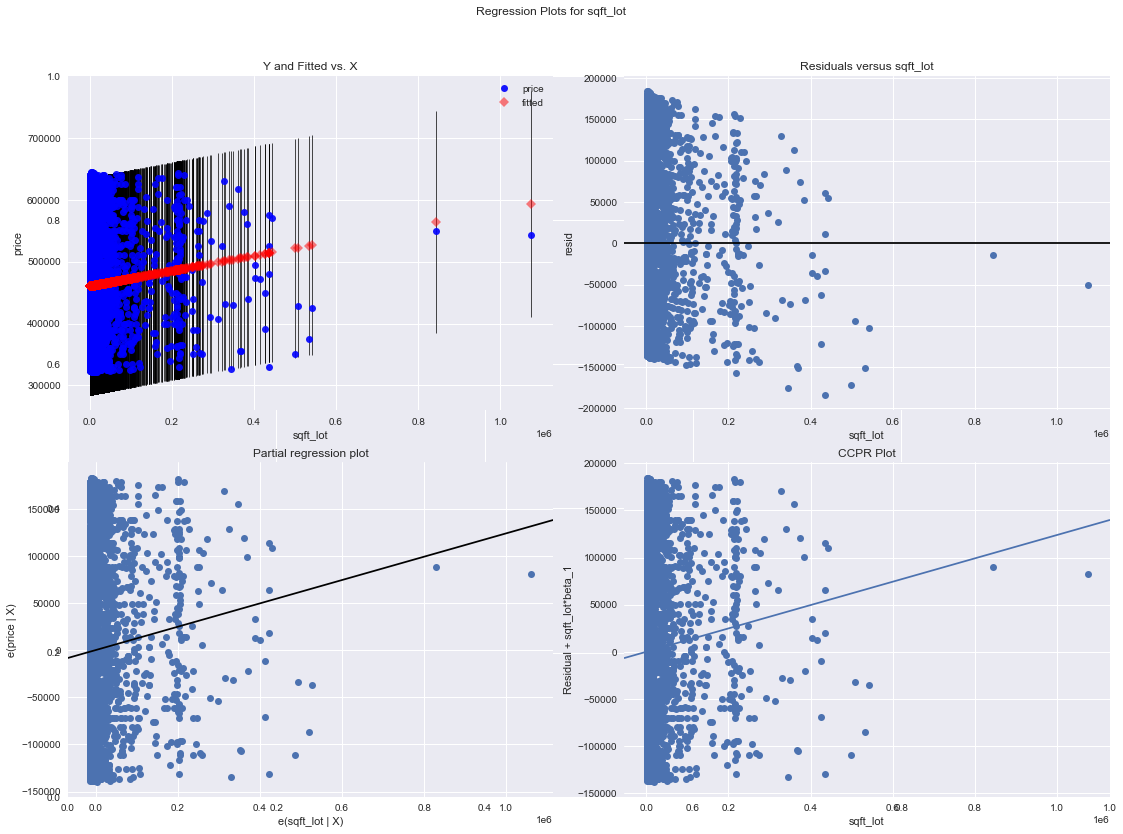

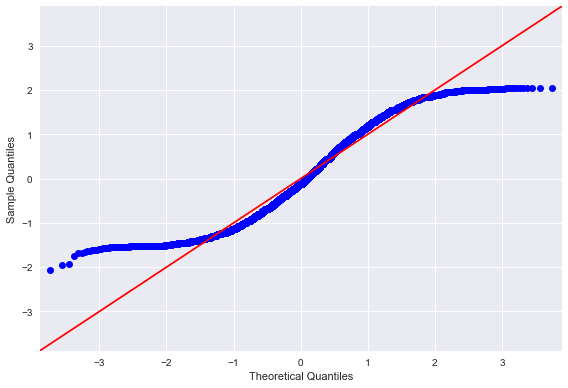

Regression Diagnostics for Price~floors


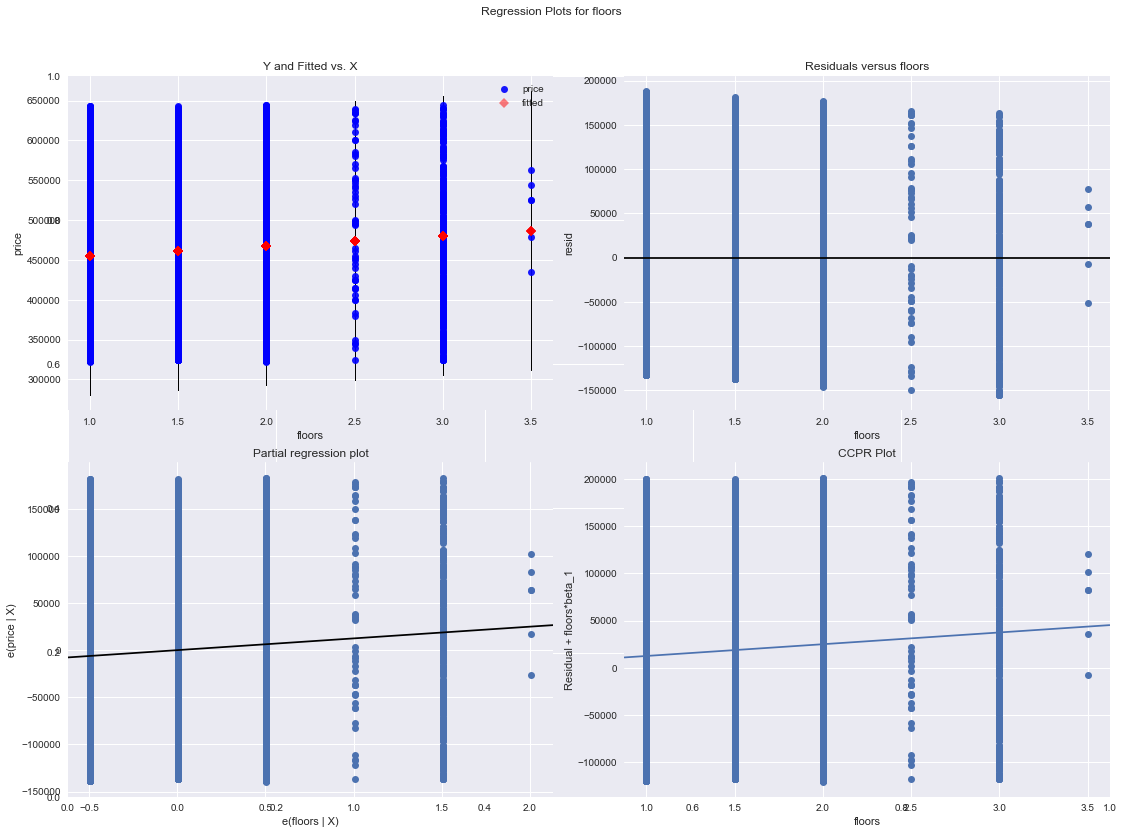

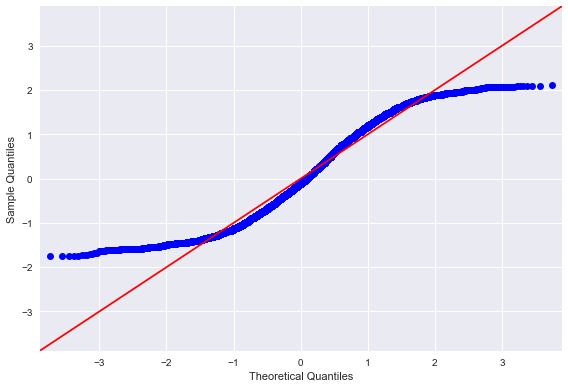

Regression Diagnostics for Price~waterfront


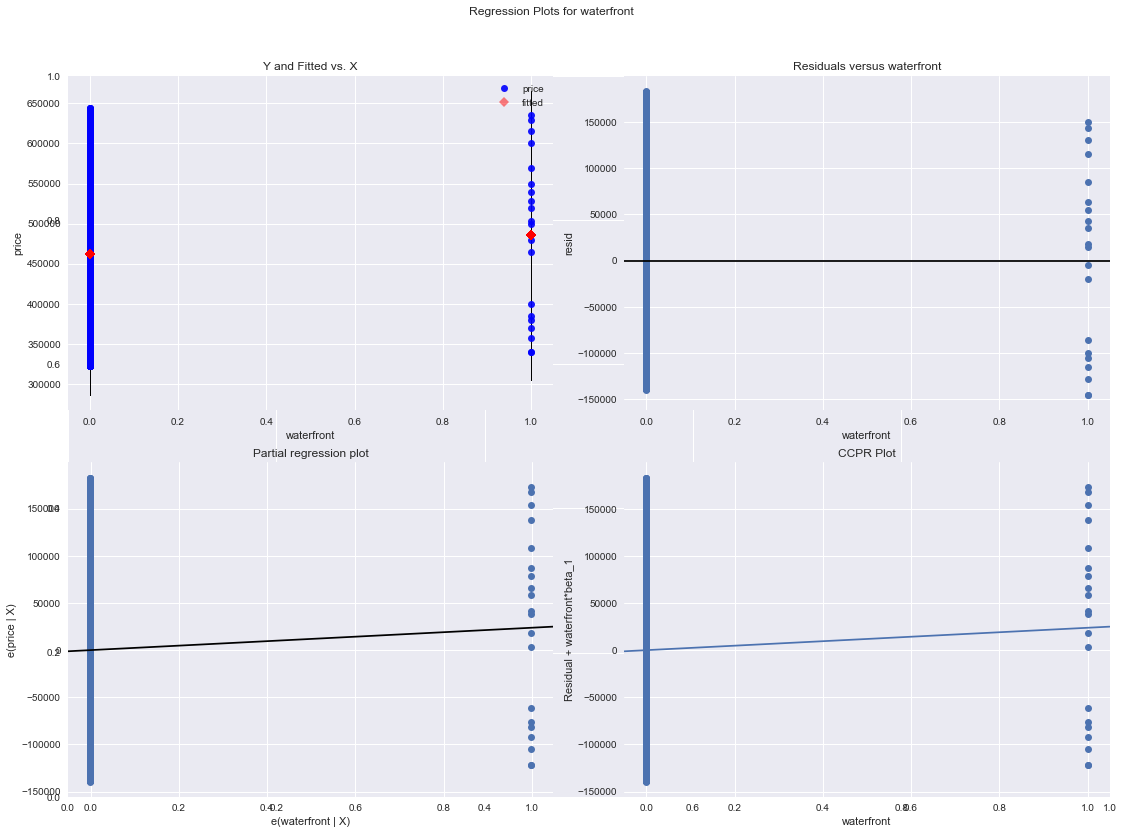

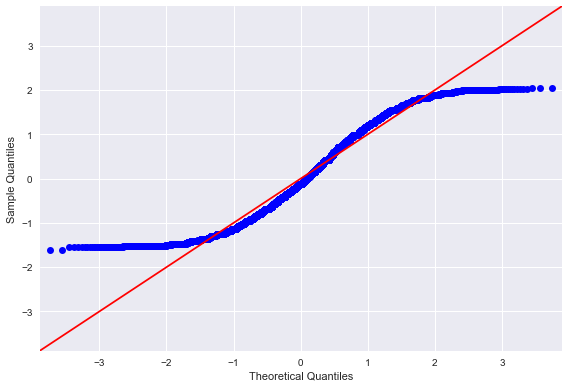

Regression Diagnostics for Price~view


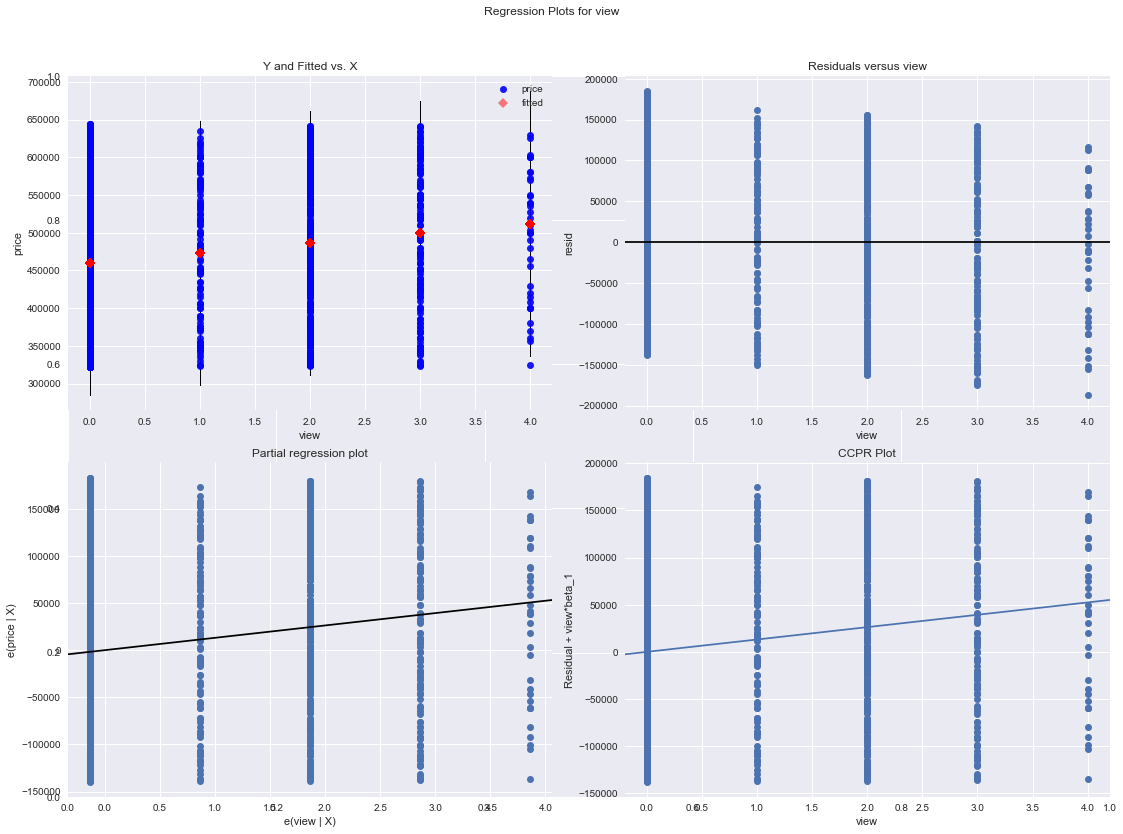

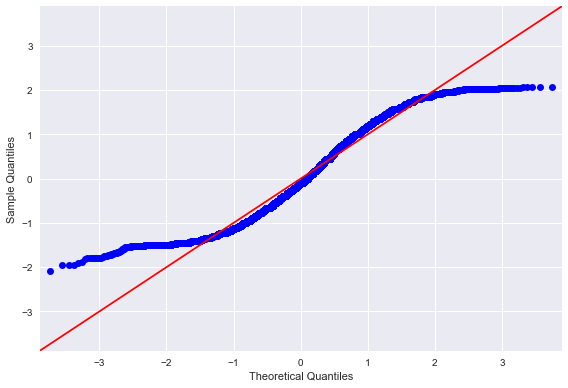

Regression Diagnostics for Price~condition


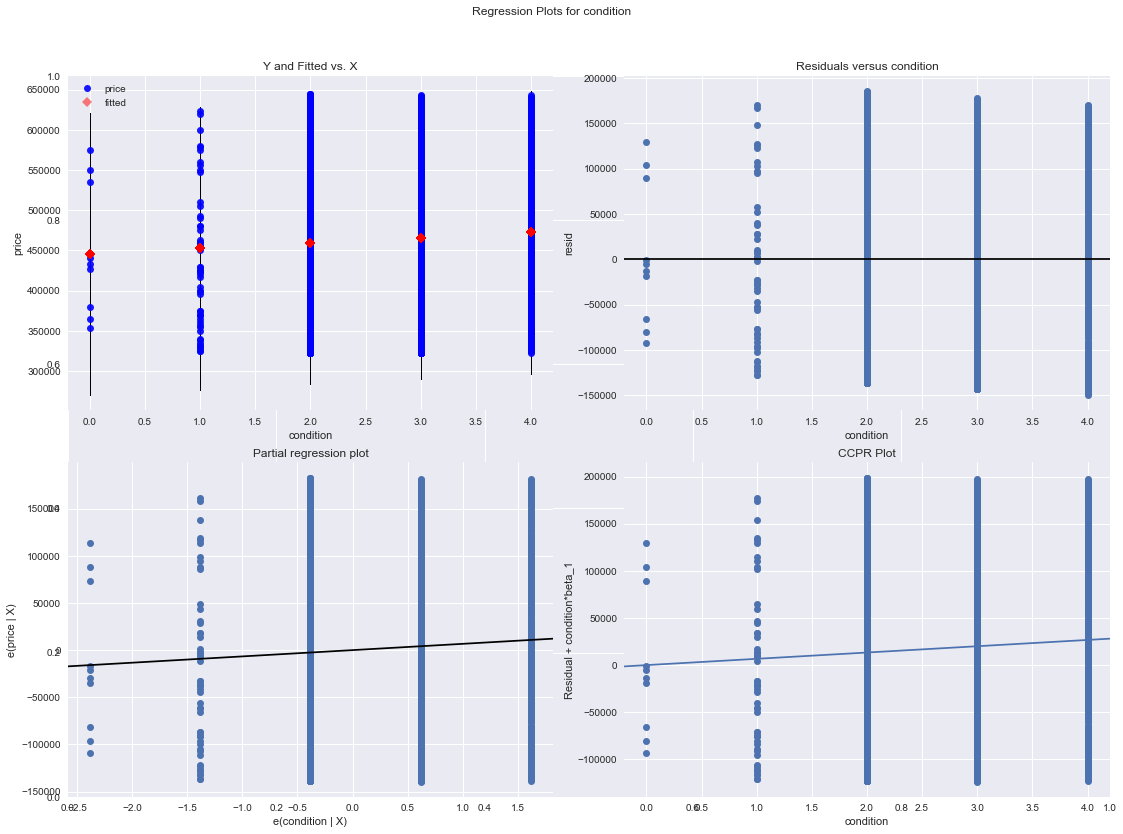

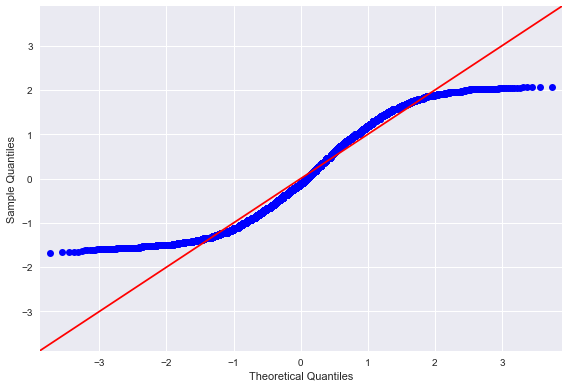

Regression Diagnostics for Price~grade


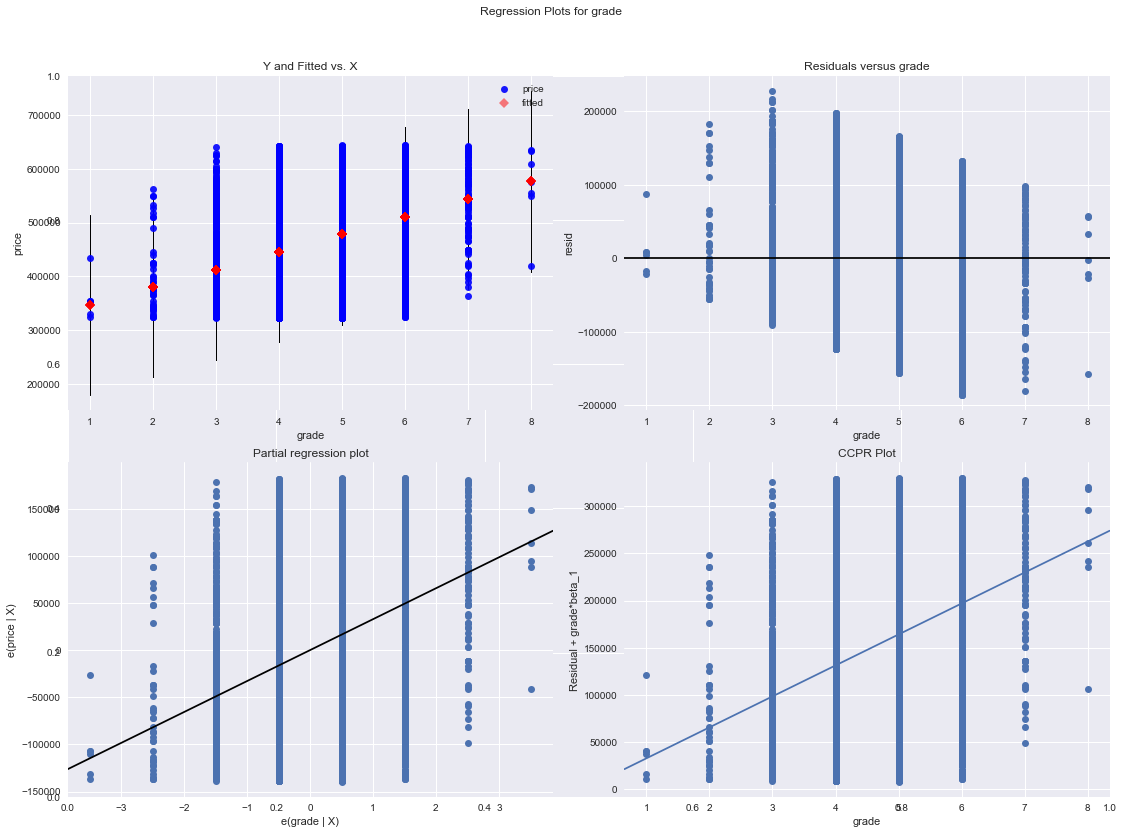

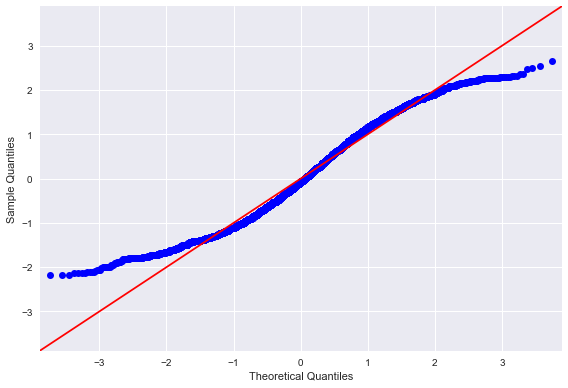

Regression Diagnostics for Price~sqft_above


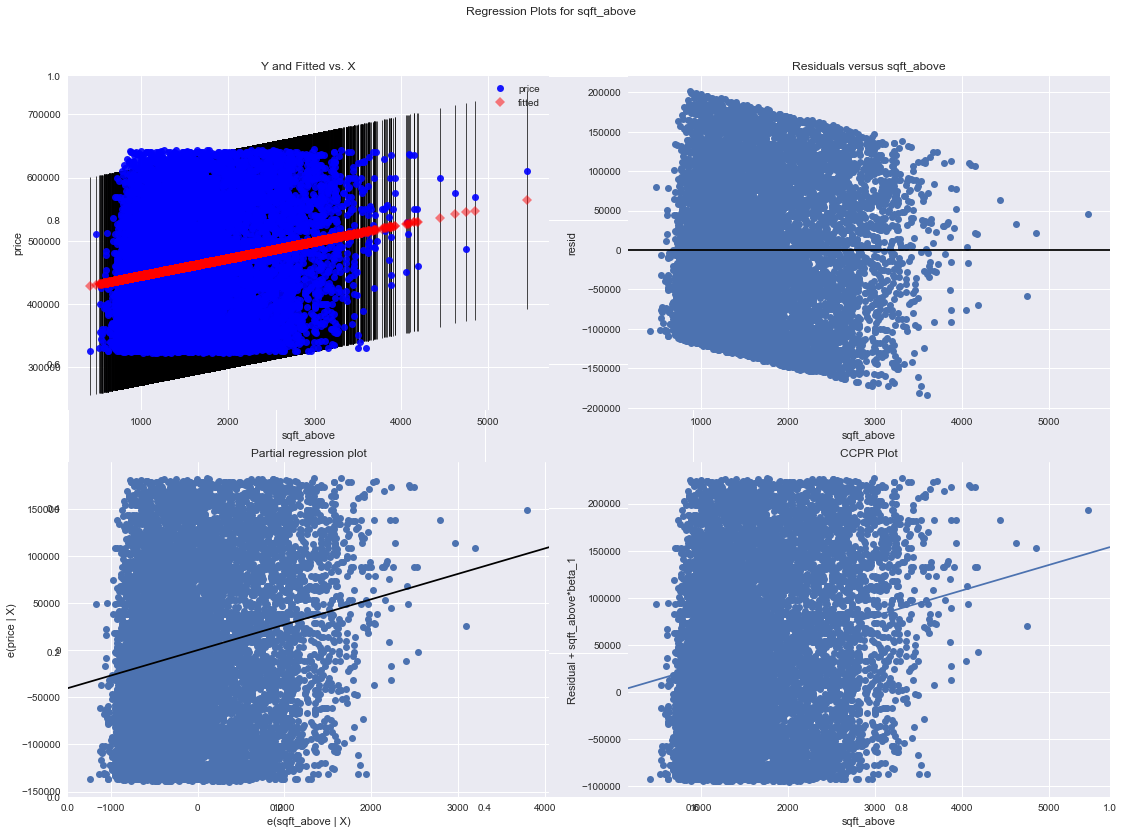

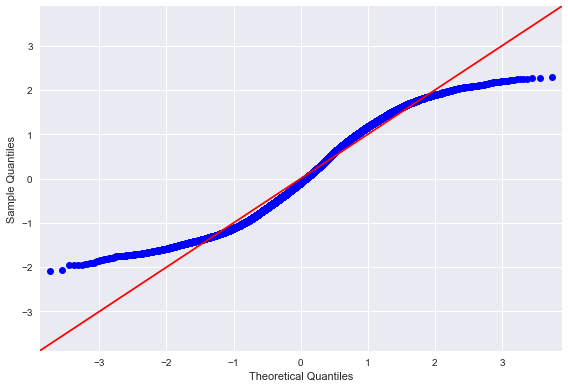

Regression Diagnostics for Price~sqft_basement


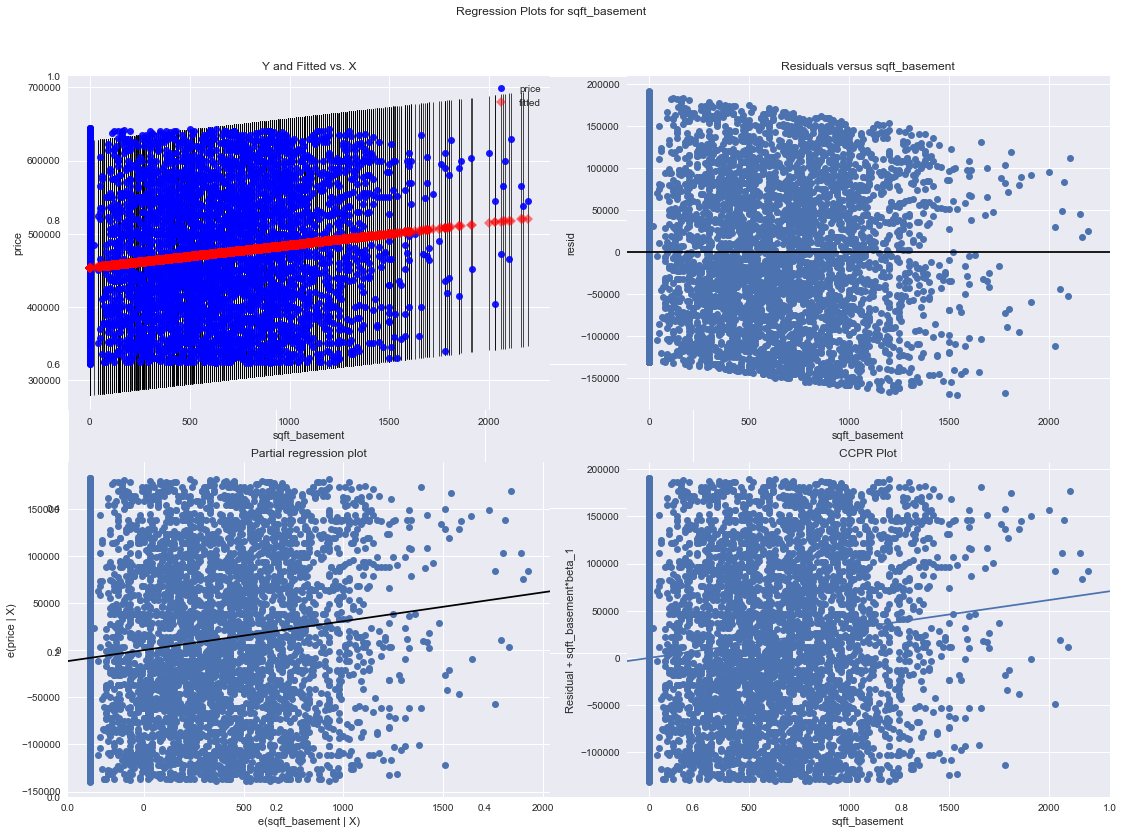

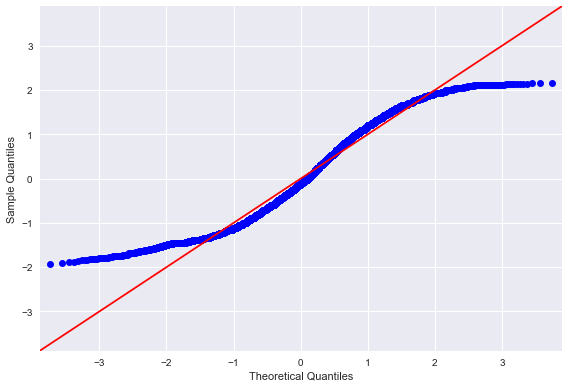

Regression Diagnostics for Price~yr_built


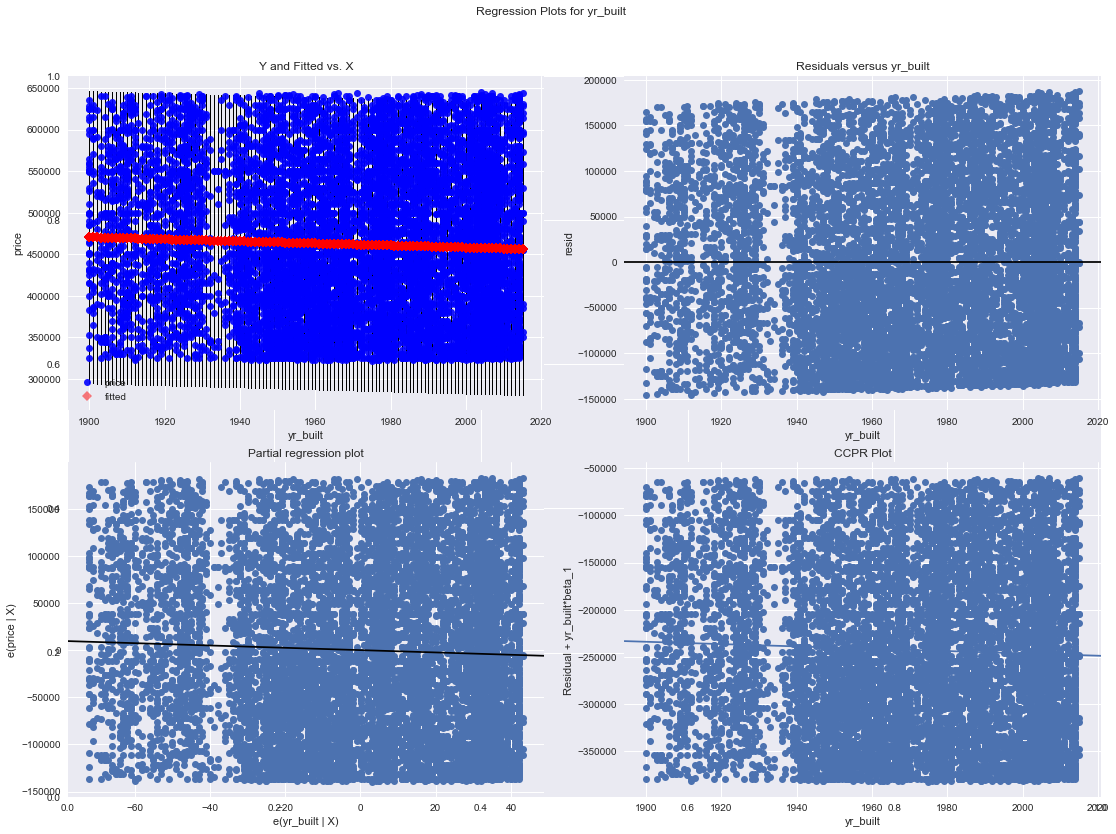

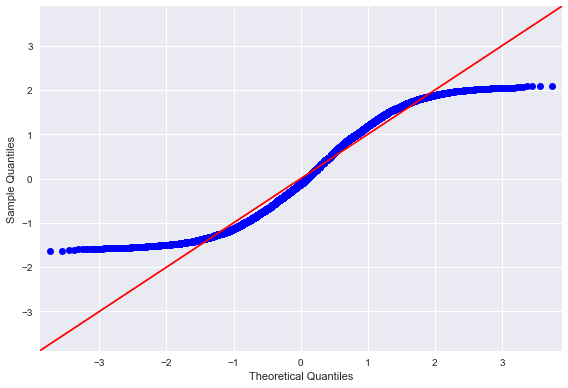

Regression Diagnostics for Price~yr_renovated


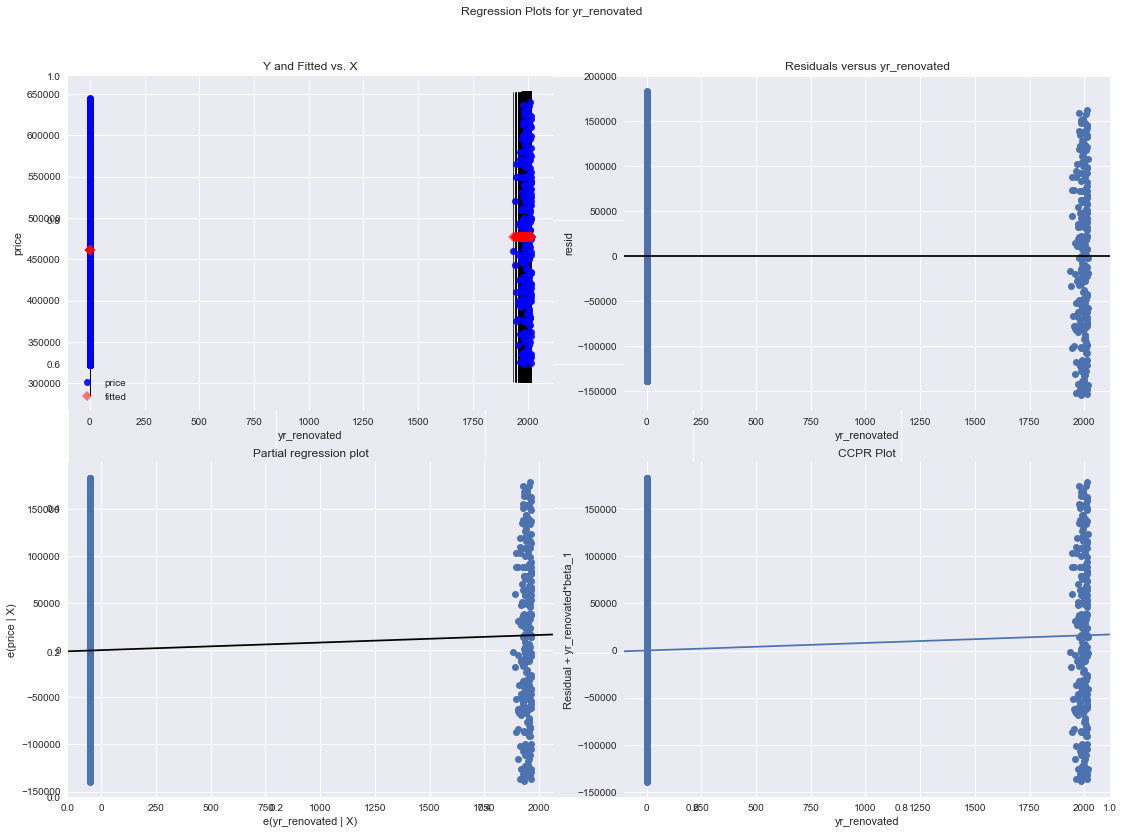

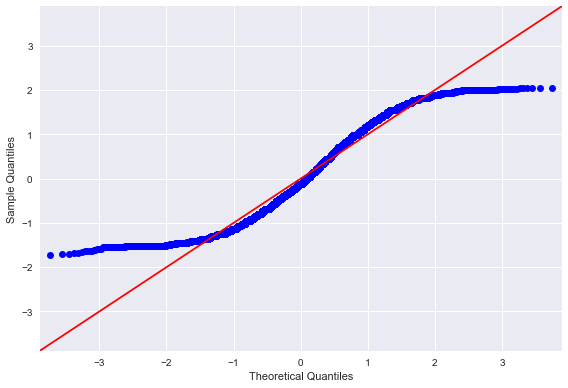

Regression Diagnostics for Price~zipcode


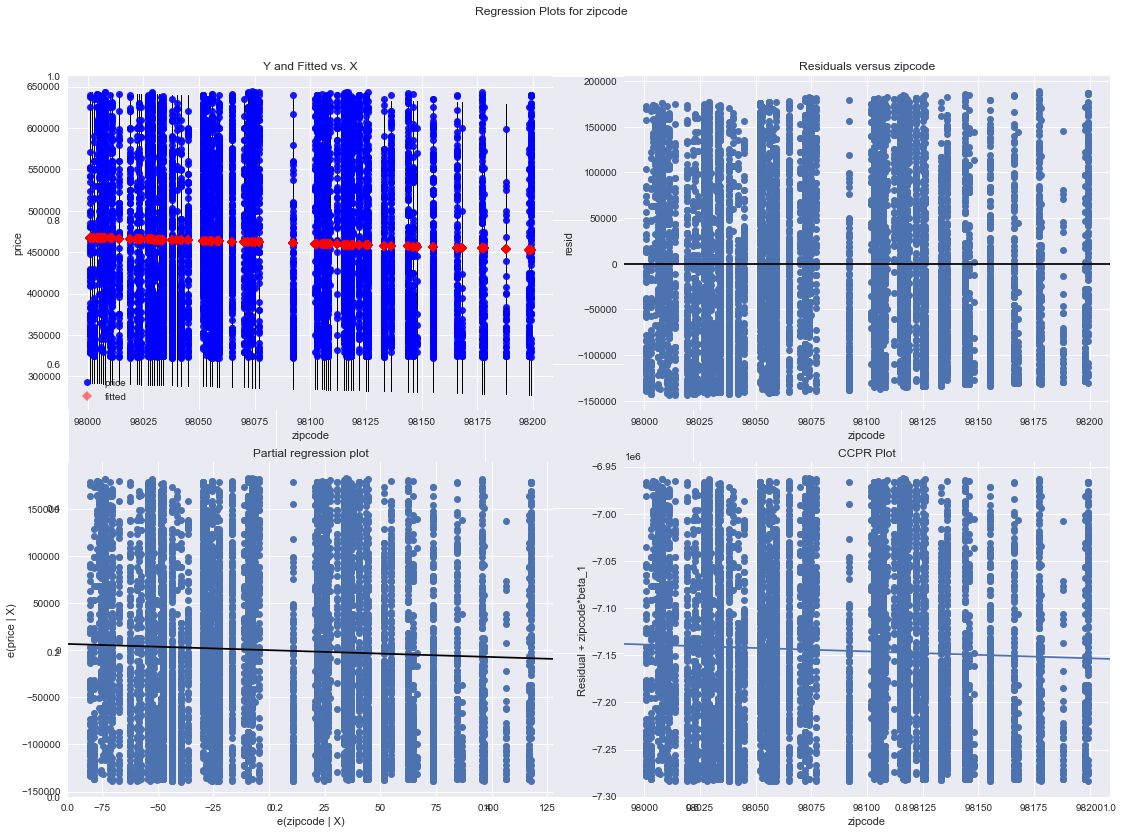

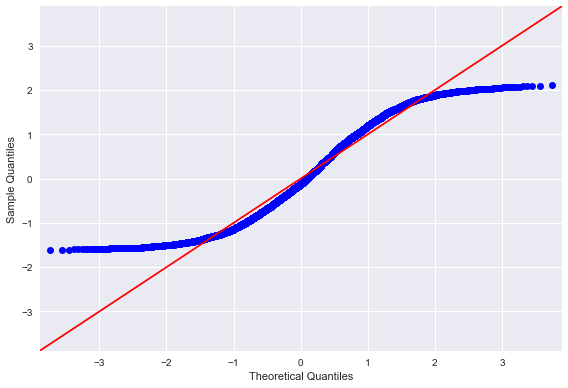

Regression Diagnostics for Price~lat


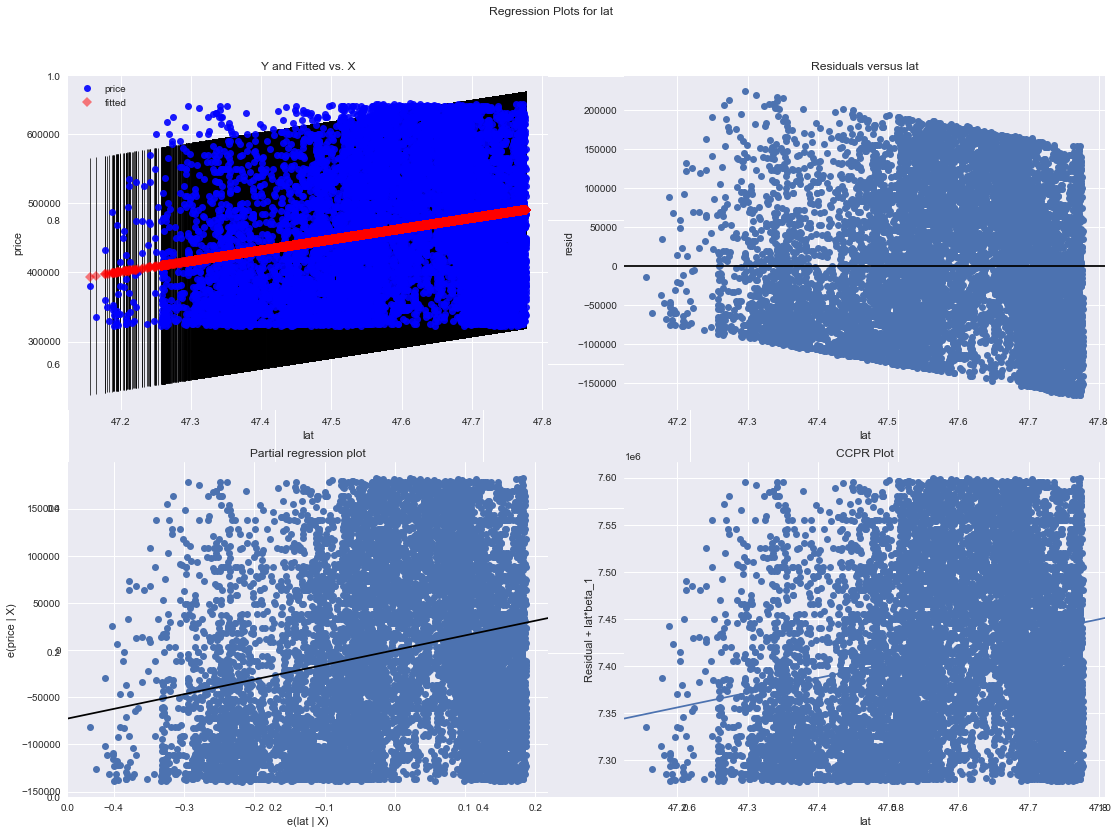

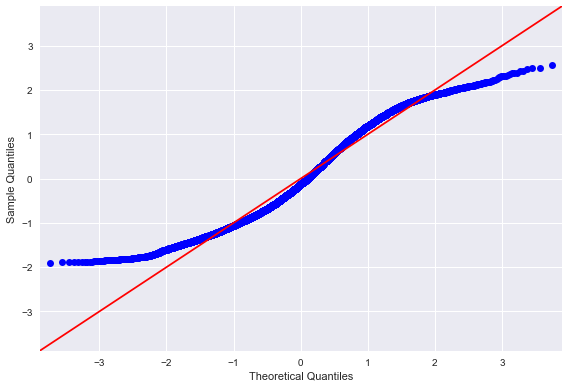

Regression Diagnostics for Price~long


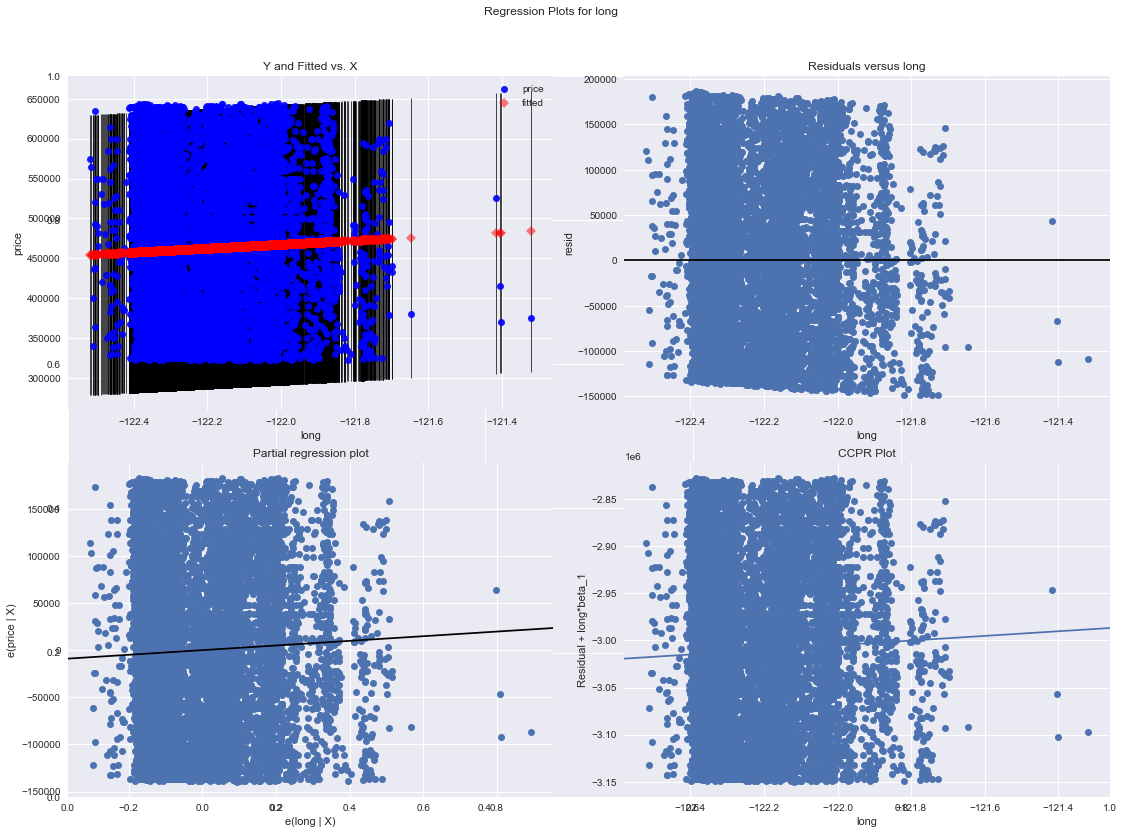

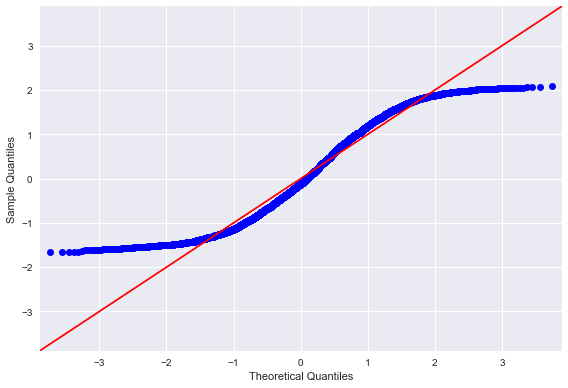

Regression Diagnostics for Price~sqft_living15


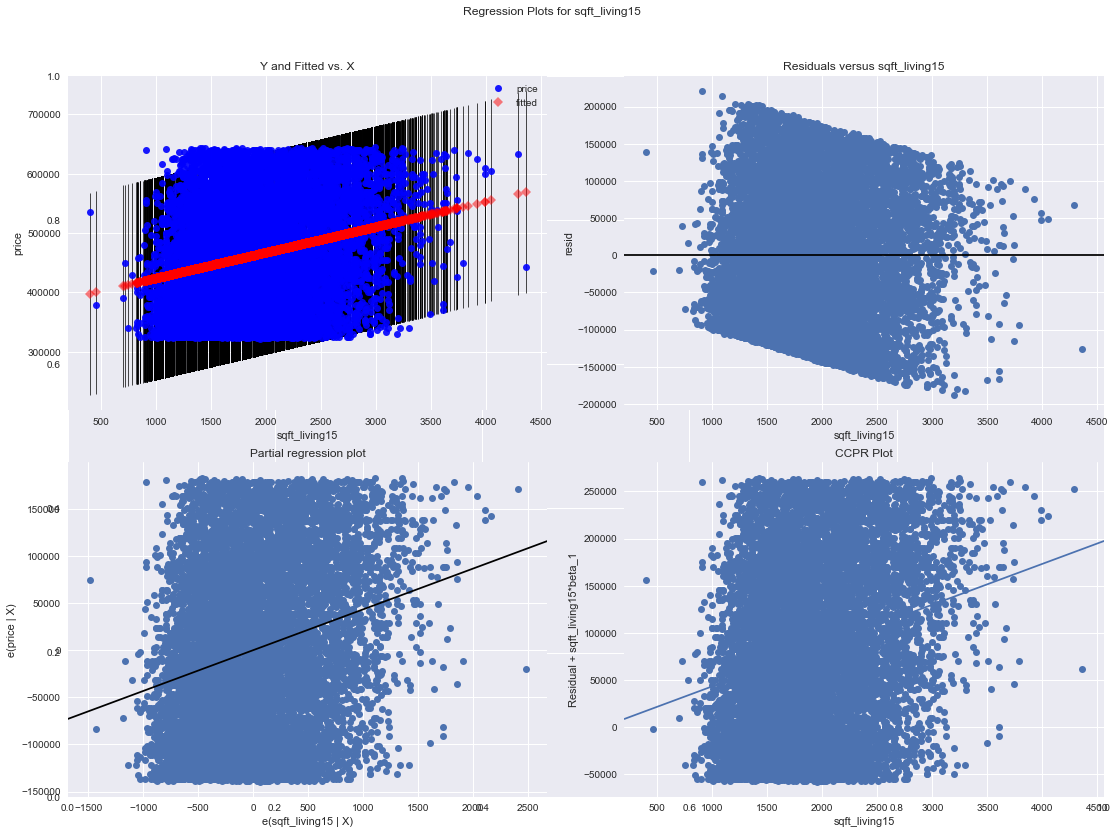

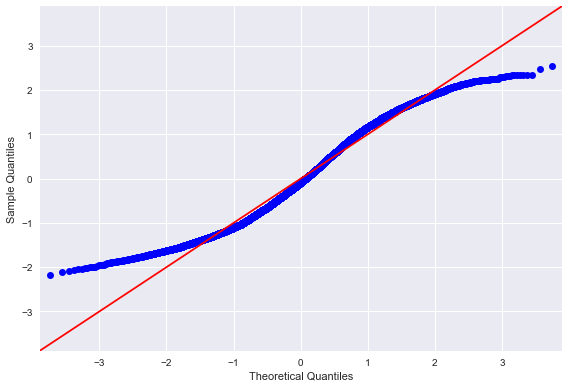

Regression Diagnostics for Price~sqft_lot15


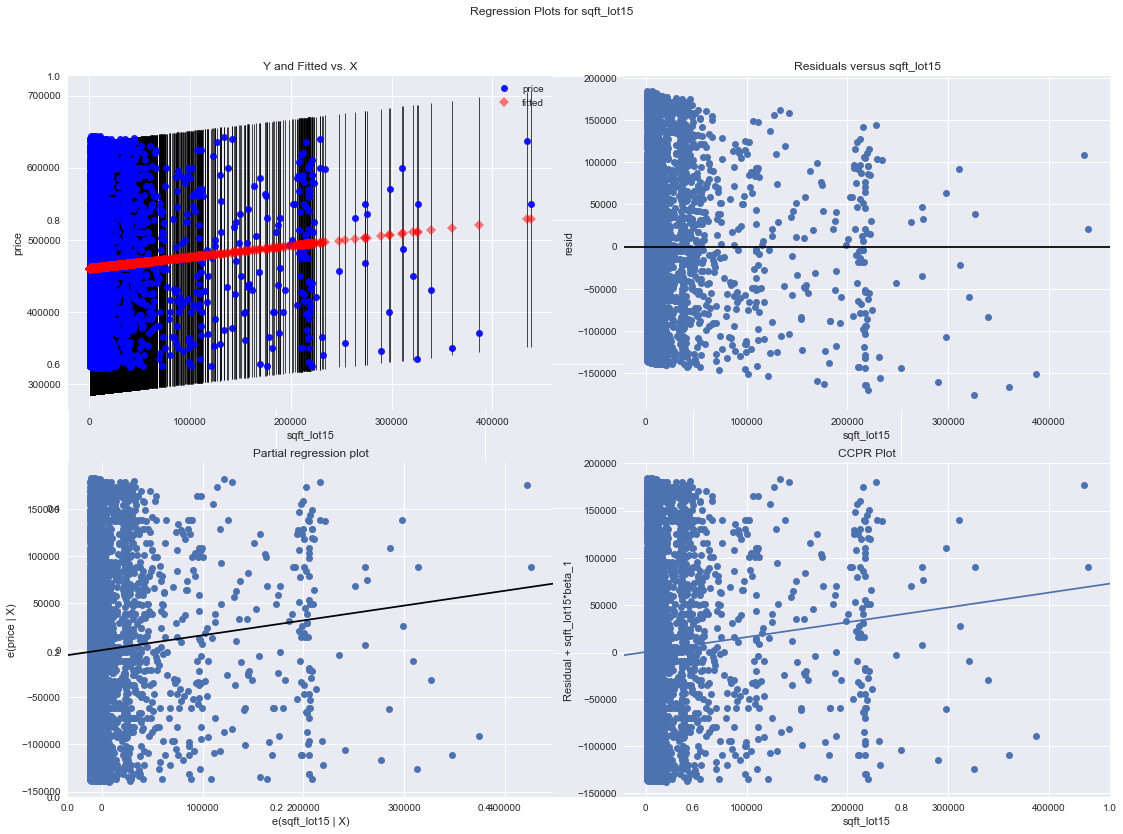

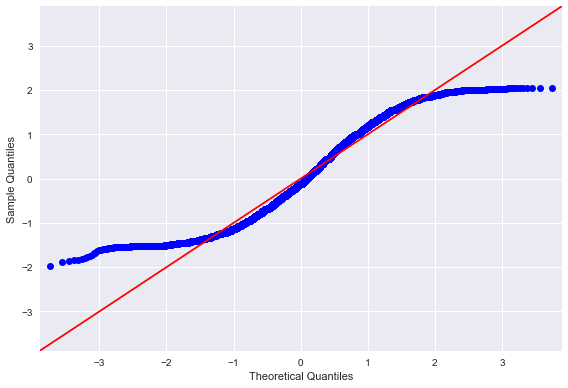

In [83]:
# check assumptions
for idx, column in enumerate(df_7_IQR.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_7_IQR).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 78%, which means that is able to explain about 78% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values. Keep in mind that the actual values were log-normalized, so the error represented by the difference between actual vs. predicted values is extrapolated to a much larger degree than, say, the first model's visual representation of error.

C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


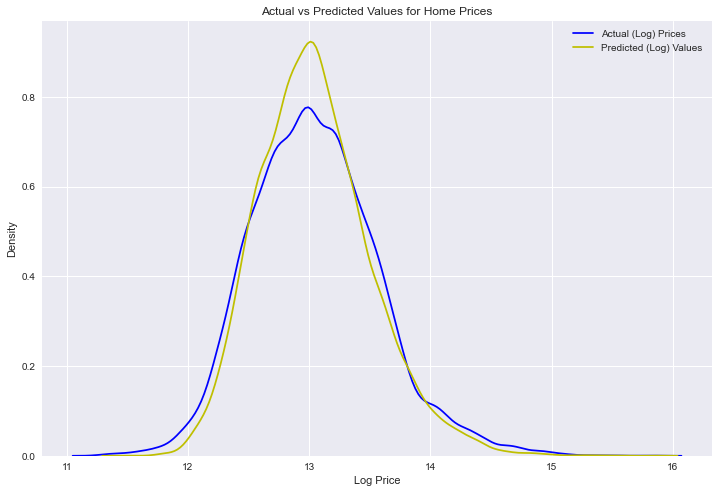

In [54]:
# visualize the error in model 3
X = df2.drop(['price'], axis=1)
y = df2['price']
lin_model(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df2['price'], hist=False, color="b", 
                  label="Actual (Log) Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted (Log) Values" ,
             ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

### Finding 2: Most significant model coefficients

In [55]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = X_train.columns   # X_train columns - labels with log-transform
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# change values in 'Values' to absolute - we care about the magnitude
df_coefs['Values'] = df_coefs['Values'].abs() 

df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

Coefficients    Values
12            lat 1.4004608
4      waterfront 0.3835403
15    sqft_living 0.2075805
17  sqft_living15 0.1998535
7           grade 0.1649526
13           long 0.1636478
16     sqft_above 0.0992737
1       bathrooms 0.0683746
3          floors 0.0674003
5            view 0.0666581
6       condition 0.0590836
0        bedrooms 0.0211527
9        yr_built 0.0035755
11        zipcode 0.0005711
8   sqft_basement 0.0000564
10   yr_renovated 0.0000389
2        sqft_lot 0.0000006
14     sqft_lot15 0.0000003

The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

#####  Latitude

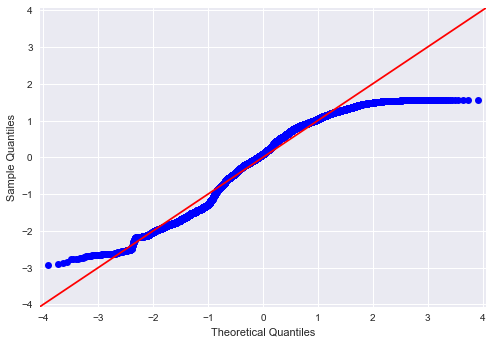

In [56]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

##### Waterfront

* Look at the values found in waterfront and their frequency.
* Look at scatterplot of waterfront vs. price.

In [57]:
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

Most properties are not waterfront properties or they did not have an entry included. Only 146 homes are waterfront properties.

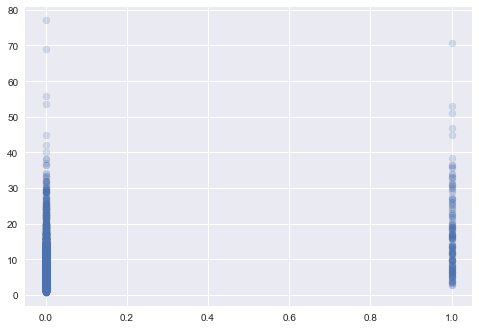

In [58]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.2)

Observations:
* Almost all homes are concentrated in lower value ranges and do not have waterfronts.
* It seems that the model is deriving weight from the waterfront variable by ascribing significance in the frequency of homes with a waterfront. For instance it is safe to say that homes without a waterfront will have a low price (in general), and homes with a waterfront will typically trend higher in price.

##### sqft_above

The third highest linear relationship among the coefficients with price is sqft_above. This relationship is intuitive because one would expect that as the square footage of a home increases, then the price would increase proportionally. Additionally, sqft_above is log-normal and has a fairly linear relationship with price. This relationship will be shown again below.

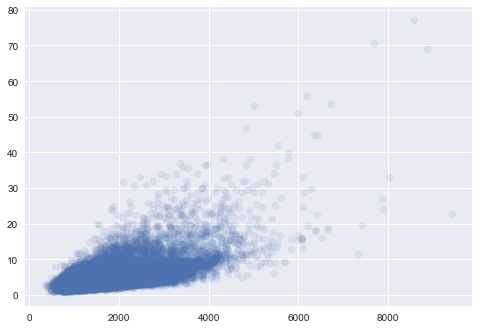

In [59]:
plt.scatter(df['sqft_above'], df['price'] / 100_000, alpha=0.1)